# Data Science Challenge - Housing market of Santiago de Chile 

By Andreas Kaae, s154395 & Rasmus Riber, s154060

<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

# Introduction
 <a id = "intro"><a>

Housing is central in the lives of almost everyone. For most people housing is responsible for a significant part of their personal economy. This notebook report focuses on the housing market in Santiago de Chile, the capitol of Chile. A dataset of housing transactions serves as the basis for the report. For each transaction, area charateristics, the type of the buying household and geographical data is avaiable.

The report consists of five main sections:

**IV) Data preperation**<br>
In this section the data is described and cleaned.

**V) Additional data**<br>
In this section additional data of crimes in Santiago de Chile is gathered and added to the original data. This addition is performed with the expectation of criminality having high relevance for the real estate market.

**VI) Initial data analysis** <br>
In this section statistics, correlations, outliers and distributions of features are analysed.

**VII) Exploratory analysis**<br>
In this section 5 research questions are analysed: <br>
a) How is wealth related to type of household. <br>
b) How is wealth related to other real estate features. <br>
c) How is crime related to household characteristics. <br>
d) Are there any geographical patterns for the real estate features? <br>
e) How well can the real estate market be segmented based on area characteristics? <br>

**VIII) Prediction challenge**<br>
This section will adress the research question of predicting the household type that most likely will buy a specific real estate, by appliying machine learning tools.

**IX) Conclusion**<br>
This section will conclude the report by stating the key findings.


# Data preparation <a id = "dataprep"><a>
In this section the data is described and relevant features are transformed. The data will further be cleaned by removing errors and any irrelevant data will be excluded.

The basic packages used through out the notebook is loaded as well as the data.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_excel('Households_Data.xlsx')
df_coords = df[['DirCoordX','DirCoordY']] #Saved for later use
df.head()

Hogar  EXCLUIR  paraValidacion  Sector    DirCoordX    DirCoordY  \
0  100010        0               0       7  335180.8019  6266420.975   
1  100020        0               0       7  338410.2114  6265607.141   
2  100030        0               0       7  327863.8248  6257800.086   
3  100041        0               0       7  327864.0000  6257800.000   
4  100052        0               0       7  338480.8152  6267296.941   

   MontoArr  IngresoHogar      Factor  AnosEstudio  ...  \
0    100000        450845  136.393738           11  ...   
1    120000       1019369   73.843597           11  ...   
2     70000         80000  180.722809           10  ...   
3     80000        559259  150.379059           14  ...   
4    117771        710309  122.001518           12  ...   

   Acc_Habitacion_tpte_pub  Acc_Industria_tpte_pub  Acc_Servicios_tpte_pub  \
0               6110.62492               671.08681               719.84272   
1               6110.62492               671.08681               719.84272   
2               6110.62492               671.08681               719.84272   
3               6110.62492               671.08681               719.84272   
4               6110.62492               671.08681               719.84272   

   Acc_Comercio_auto  Acc_Educacion_auto  Acc_Habitacion_auto  \
0            3036.41             1781.81             30505.65   
1            3036.41             1781.81             30505.65   
2            3036.41             1781.81             30505.65   
3            3036.41             1781.81             30505.65   
4            3036.41             1781.81             30505.65   

   Acc_Industria_auto  Acc_Servicios_auto  CLUSTER7  CLUSTER2  
0             2853.19             3058.03         3         1  
1             2853.19             3058.03         3         1  
2             2853.19             3058.03         3         1  
3             2853.19             3058.03         3         1  
4             2853.19             3058.03         3         1  

[5 rows x 30 columns]

In [5]:
df.shape

(18264, 30)

The data set describes details about households in Santiago de Chile with details about household transactions as well as the charactaristics about the household which bought the house. The main author of the data is Tomas Cox Oettinger, a PhD student from Chile. The dataset has 18264 observations and 30 features.

| Feature | Description | Type |
| :--- | :--- | :--- |
| Hogar | ID of the household who bought the real estate | Categorial |
| EXCLUIR | Whether or not the observation should be in the dataset | Binary |
| paraValidacion | Sample for validaiton | Binary |
| Sector| Exogenours sector | Categorical |
| DirCoordX | UTM coordinat X | Continuous |
| DirCoordY| UTM coordinat Y | Continuous |
| MontoArr | Monthly dwelling rent (Chilean Peso) | Continuous |
| IngresoHogar | Household income (Chilean Peso) | Continuous |
| Factor | Expansion factor of household survey | Continuous | 
| AnosEstudio | Years of formal education of head of household | Integer |
| CLASE | 1: less than 12 years, 2: between 12 and 15 yeard, 3: more than 15 years | Categorical |
| Sup_Prom_Constr_Hab_EOD | Average built surface of residential units in zone | Continuous |
| Calid_EOD_norm_inv | Average Construction Quality of residential units in zone | Continuous |
| DensConstr_EOD | Built density in zone (built suerface divided by zone surface) | Continuous |
| Dist_est_MEtro_MC_KM | Distance to nearest subway station (km) | Continuous |
| Dist_salida_Autop_MC_KM | Distance to nearest highway exit (km) | Continuous |
| Tiempo_Com_Stgo | Travel time to CBD (min) | Continuous |
| Ingreso_Promedio_Zone_MM | Average zonal income (Million Chilean Peso) | Continuous |
| Acc_Comercio_tpte_pub | Accesibility to Commerce in transit | Continuous |
| Acc_Educacion_tpte_pub | Accesibility to Educaition in transit | Continuous |
| Acc_Habitacion_tpte_pub | Accesibility to Habitational in transit | Continuous |
| Acc_Industria_tpte_pub | Accesibility to Industry in transit | Continuous |
| Acc_Servicios_tpte_pub | Accesibility to Services in transit | Continuous |
| Acc_Comercio_tpte_auto | Accesibility to Commerce in car | Continuous |
| Acc_Educacion_tpte_auto | Accesibility to Educaition in car | Continuous |
| Acc_Habitacion_tpte_auto | Accesibility to Habitational in car | Continuous |
| Acc_Industria_tpte_auto | Accesibility to Industry in car | Continuous |
| Acc_Servicios_tpte_auto | Accesibility to Services in car | Continuous |
| CLUSTER7 | Cluster clasification (7 clusters) | Continuous |
| CLUSTER2 | Cluster clasification (2 clusters) | Continuous |

## Coordinate transformation <a id = "coortrans"><a>

The features 'DirCoordX' and 'DirCoordY' are listed in UTM format. To locate the house holds in Santiago de Chile, the coordinates are converted to WGS84 format. WGS84 is the standard format applied for maps and is applied by google maps as well. The package `utm` is applied to convert UTM coordinates to the format of the standard coordinates. "19, E'" indicates the UTM area of Santiago de Chile. 

In [6]:
import utm
df['Latitude'], df['Longitude'] = utm.to_latlon(df['DirCoordX'].values, df['DirCoordY'].values, 19, 'E')

df.loc[:,['DirCoordX','Latitude','DirCoordY','Longitude']].head()

DirCoordX   Latitude    DirCoordY  Longitude
0  335180.8019 -33.729444 -3733579.025 -70.779035
1  338410.2114 -33.737278 -3734392.859 -70.744340
2  327863.8248 -33.805994 -3742199.914 -70.859656
3  327864.0000 -33.805995 -3742200.000 -70.859654
4  338480.8152 -33.722055 -3732703.059 -70.743270

During the conversion the orginial coordinate 'DirCoordY' is apparently changed, hence the orginial coordinate columns are reloaded.

In [7]:
df['DirCoordX'] = df_coords['DirCoordX']
df['DirCoordY'] = df_coords['DirCoordY']
df.loc[:,['DirCoordX','Latitude','DirCoordY','Longitude']].head()

DirCoordX   Latitude    DirCoordY  Longitude
0  335180.8019 -33.729444  6266420.975 -70.779035
1  338410.2114 -33.737278  6265607.141 -70.744340
2  327863.8248 -33.805994  6257800.086 -70.859656
3  327864.0000 -33.805995  6257800.000 -70.859654
4  338480.8152 -33.722055  6267296.941 -70.743270

The new columns 'Latitude' and 'Longitude' (in WGS84 coordinates) are now a part of the dataset  'DirCoordX' and 'DirCoordY'.

## Removal of features and missing values <a id = "colandnan"><a>

In this section redundant features and missing-values will be removed. Not all features are relevant for the challenge and are therefore removed for the sake of simplicity. Initially the following columns are excluded from the data set:
- **EXCLUIR** - is a column specified by the author stating whether he excluded the row or not. As no reason for the exclusions is providede the column is removed.
- **Hogar** - is the household ID and is therefore set as index.
- **paraValidaction** - is a column generated by the author of the data, hence it is removed.
- **Factor** - is the weight of the kind of familiy in the population and deemed irrelevant for the challenge.
- **CLUSTER7** and **CLUSTER2** - are cluster clasification columns which are made by the data author. The clusters are based on the other features and are therefore removed.
- **AnosEstudio** - This is the feature which *CLASE* is generated from and is therefore removed.

In [8]:
# Delete columns
exclude_columns = ['EXCLUIR','paraValidacion','Factor','CLUSTER7','CLUSTER2','AnosEstudio'] # Columns to be excluded
df = df.drop(exclude_columns,1) 

# Set index
df = df.set_index(['Hogar'])

In the feature *CLASE* there are 4 different categories: '-99', '1', '2' and '3'. The category '-99' means that the respondant of the survey did not answer the question and these observations are therefore excluded.

In [9]:
df = df[df['CLASE'] != -99]

The two categorical features *CLASE* and *Sector* are set as categorical variables.

In [10]:
df['CLASE'] = df['CLASE'].astype('category')
df['Sector'] = df['Sector'].astype('category')

Missing values in the dataset can cause problems, hence the data is checked for 'NaN' or similar entries. The `isnull()` does excatly this, if there is a 'NaN' it will return 'True'. Thus summing over the whole dataframe detects any missing values.

In [11]:
df.isnull().sum().sum()

0

As the result is 0, there are no NaN-values in the dataset. <br>
The dataset have now been described and irrelavant entries have been removed thus reducing the dataframe to 17876 observations and 25 features.

In [12]:
df.shape

(17876, 25)

# Additional data <a id = "adddata"><a>

In this section additional data of crimes in Santiago de Chile is gathered and added to the transaction data. This addition is performed with the expectation of criminality having high relevance for the real estate market.

Data source - https://en.datachile.io/about/data

## Crime data <a id = "coortrans"><a>

The data is avaiable in a package of three sets. Crime records (*felonies.csv*), geographic data (*comunas_id.csv*) and descriptions of crime types (*categories_id.csv*). In this section the three files are merged.

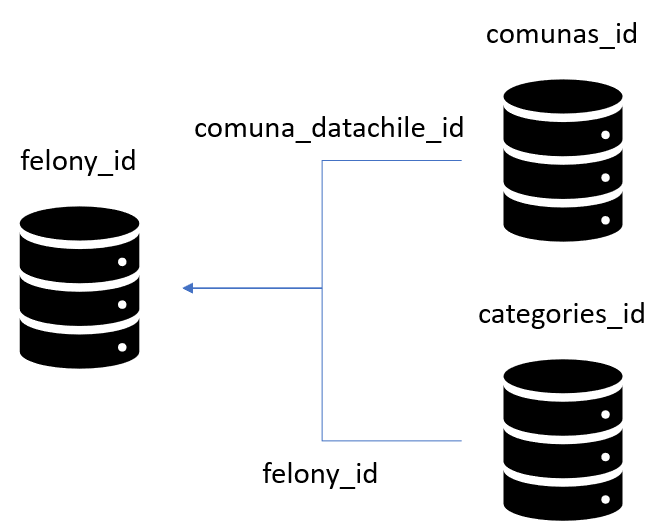

The crime data is loaded.

In [13]:
crimes = pd.read_csv('felonies.csv')
crimes.year = pd.to_datetime(crimes.year, format='%Y').dt.year
print('Start year:',min(crimes.year),' End year:',max(crimes.year))
print('Number of communes:',len(crimes.comuna_datachile_id.unique()))
crimes.head()

Start year: 2005  End year: 2016
Number of communes: 346


year  comuna_datachile_id  felony_id  cases
0  2005                    1          1   18.0
1  2005                    1          2    1.0
2  2005                    1          3  334.0
3  2005                    1          4    4.0
4  2005                    1          5   30.0

The *felony_id.csv* data consists of 4 features, and contains observations from 2005 to 2016. 

| Attribute | Description | Type |
| :--- | :--- | :--- |
| year | The year the crime was conducted | Date |
| comuna_datachile_id | The commune id (similar to a zip)  | Categorical |
| felony_id | Type of crime | Categorical |
| cases | The number of crimes | Integer |

The commune data is loaded.

In [14]:
communes = pd.read_csv('comunas_id.csv')
communes = communes.drop(['comuna_customs_id','comuna_tax_office_id'], axis = 1)
print(communes.shape)
communes.head()

(348, 4)


region_id region_name  comuna_datachile_id   comuna_name
0          1    Tarapacá                  226  Pozo Almonte
1          1    Tarapacá                  217          Pica
2          1    Tarapacá                  113       Iquique
3          1    Tarapacá                  108         Huara
4          1    Tarapacá                   58      Colchane

The *comunas_id.csv* data consists of 4 features for 348 communes. 

| Attribute | Description | Type |
| :--- | :--- | :--- |
| region_id | ID of the region | Categorical |
| region_name | Name of the region | Categorical |
| comuna_datachile_id | ID of the commune | Categorical |
| comuna_name | Name of the commune | Categorical |

Initially it was decided to look at the Santiago de Chile metropolitan region only by: <br>
<br>
<center> communes = communes[communes['region_name'] == 'Región Metropolitana Santiago'] <center> <br>

It reduced the amount of communes to 54. But it turned out that some real estate transactions were recorded outside this region. Hence the entire data is kept for now. 

The *communes* data is sorted by the *comuna_datachile_id* to do a quick inspection. Afterwards *communes* is merged withe the crime data.

In [15]:
#communes = communes[communes['region_name'] == 'Región Metropolitana Santiago']
print(communes.shape)
communes = communes.sort_values(by='comuna_datachile_id')
communes.head()

(348, 4)


region_id                    region_name  comuna_datachile_id  \
77           5                     Valparaíso                    1   
331         13  Región Metropolitana Santiago                    2   
194          8                        Bío Bío                    3   
24           3                        Atacama                    4   
6            1                       Tarapacá                    5   

         comuna_name  
77         Algarrobo  
331            Alhué  
194     Alto Bío Bío  
24   Alto del Carmen  
6      Alto Hospicio

In [16]:
crimes = crimes.merge(communes,how='right',on='comuna_datachile_id') 
print(crimes.shape)
crimes.head()

(58130, 7)


year  comuna_datachile_id  felony_id  cases  region_id region_name  \
0  2005.0                    1        1.0   18.0          5  Valparaíso   
1  2005.0                    1        2.0    1.0          5  Valparaíso   
2  2005.0                    1        3.0  334.0          5  Valparaíso   
3  2005.0                    1        4.0    4.0          5  Valparaíso   
4  2005.0                    1        5.0   30.0          5  Valparaíso   

  comuna_name  
0   Algarrobo  
1   Algarrobo  
2   Algarrobo  
3   Algarrobo  
4   Algarrobo

Merging the data results in the *crime* dataframe including region id and name as well as commune name. There is crime data for 346 out of 348 communes. <br>

The data is checked for missing values and erros.

In [17]:
crimes.isnull().sum()

year                   2
comuna_datachile_id    0
felony_id              2
cases                  2
region_id              0
region_name            0
comuna_name            0
dtype: int64

In [18]:
crimes[crimes.felony_id.isnull()]

year  comuna_datachile_id  felony_id  cases  region_id  \
58128   NaN                  347        NaN    NaN         13   
58129   NaN                  348        NaN    NaN         13   

                         region_name     comuna_name  
58128  Región Metropolitana Santiago  Santiago Oeste  
58129  Región Metropolitana Santiago    Santiago Sur

Since only 2 observation are lacking information, these are discarded.

In [19]:
crimes = crimes[np.isfinite(crimes.felony_id)]
crimes['felony_id'] = crimes['felony_id'].astype(int)
print(crimes.shape)
crimes.head()

(58128, 7)


year  comuna_datachile_id  felony_id  cases  region_id region_name  \
0  2005.0                    1          1   18.0          5  Valparaíso   
1  2005.0                    1          2    1.0          5  Valparaíso   
2  2005.0                    1          3  334.0          5  Valparaíso   
3  2005.0                    1          4    4.0          5  Valparaíso   
4  2005.0                    1          5   30.0          5  Valparaíso   

  comuna_name  
0   Algarrobo  
1   Algarrobo  
2   Algarrobo  
3   Algarrobo  
4   Algarrobo

The data set describing the crime types is loaded. It consists of the 14 felony ids and the felony desriptions in Spanish.

In [20]:
categories = pd.read_csv('categories_id.csv')
categories.head(14)

felony_id                          felony_es
0           1  robo con violencia o intimidación
1           2                  robo por sorpresa
2           3                    robo con fuerza
3           4                    robo de veículo
4           5        robo accesorios del veículo
5           6             robo en lugar habitado
6           7          robo en lugar no habitado
7           8             otros robos con fuerza
8           9                             hurtos
9          10                           lesiones
10         11                    lesiones graves
11         12                     lesiones leves
12         13                         homicidios
13         14                          violación

The dataframe is converted into a dictionary to easily insert the descriptions in the crimes dataset.

In [21]:
categories = categories.set_index('felony_id')
categories = categories.to_dict('dict')

In [22]:
crimes['felony_es'] = crimes['felony_id'].map(categories['felony_es'])
crimes.head()

year  comuna_datachile_id  felony_id  cases  region_id region_name  \
0  2005.0                    1          1   18.0          5  Valparaíso   
1  2005.0                    1          2    1.0          5  Valparaíso   
2  2005.0                    1          3  334.0          5  Valparaíso   
3  2005.0                    1          4    4.0          5  Valparaíso   
4  2005.0                    1          5   30.0          5  Valparaíso   

  comuna_name                          felony_es  
0   Algarrobo  robo con violencia o intimidación  
1   Algarrobo                  robo por sorpresa  
2   Algarrobo                    robo con fuerza  
3   Algarrobo                    robo de veículo  
4   Algarrobo        robo accesorios del veículo

In [23]:
crimes.isnull().sum()

year                   0
comuna_datachile_id    0
felony_id              0
cases                  0
region_id              0
region_name            0
comuna_name            0
felony_es              0
dtype: int64

The crime data sets are now combined. 

## Combining crimes and real estates by geography <a id = "coortrans"><a>

In this section the crime data is connected to the dataframe describing the households. This is done in three steps by using the commune id and the corresponding geographic location. <br>

1) The first step it to load the geographic data (*ZonasEOD2012.dbf*) for the communes in Chile. <br>
2) The second step identifies the commune id of the transaction real estates. <br>
3) The third step adds the criminality data to the transaction data via the commune id.

### 1) Load geographic data for the communes in Chile

Initially the geographic data is loaded. To work with geographic data the packages `geopandas` and `shapely.geometry` are used.

In [24]:
import geopandas as gdp
from shapely.geometry import Point, Polygon

#Load the data provided about the zones:
zones = gdp.read_file('Zones/ZonasEOD2012.dbf')
# Define crs zone
crs_zones = zones.crs

zones['comuna_datachile_id'] = zones['ID'].astype(int)
zones = zones[['comuna_datachile_id','geometry']]
zones.head()

comuna_datachile_id                                           geometry
0                  318  POLYGON ((360300.775370231 6301887.504967574, ...
1                  311  POLYGON ((362168.0934119964 6305423.532234341,...
2                  301  POLYGON ((359697.5534530627 6305330.493605562,...
3                  734  POLYGON ((341977.3788218462 6321115.505407927,...
4                  330  POLYGON ((359617.3226881883 6307438.528481727,...

In [25]:
print(type(zones))
print(crs_zones)

<class 'geopandas.geodataframe.GeoDataFrame'>
{'init': 'epsg:32719'}


The loaded dataframe is a geopandas dataframe and the code used for the coordinates is epsg:32719. This 'key' is used below to specify which coordinate type is used.

Secondly the commune data is added to the real estate transcation data via the coordinates. For each real estate coordinate, a geographic point is zipped together from its x (*DirCoordX*) and y (*DirCoordY*) coordinates.

In [26]:
df = gdp.GeoDataFrame(df, crs = crs_zones, geometry = [Point(x, y) for x, y in zip(df.DirCoordX, df.DirCoordY)])
df.head()

Sector    DirCoordX    DirCoordY  MontoArr  IngresoHogar CLASE  \
Hogar                                                                   
100010      7  335180.8019  6266420.975    100000        450845     1   
100020      7  338410.2114  6265607.141    120000       1019369     1   
100030      7  327863.8248  6257800.086     70000         80000     1   
100041      7  327864.0000  6257800.000     80000        559259     2   
100052      7  338480.8152  6267296.941    117771        710309     2   

        Sup_Prom_Constr_Hab_EOD  Calid_EOD_norm_inv  DensConstr_EOD  \
Hogar                                                                 
100010                     53.8                0.98           0.059   
100020                     59.6                0.98           0.033   
100030                     59.5                0.98           0.004   
100041                     59.5                0.98           0.004   
100052                     43.6                0.98           0.086   

        Dist_est_Metro_MC_KM  ...  Acc_Industria_tpte_pub  \
Hogar                         ...                           
100010             23.051711  ...               671.08681   
100020             21.080177  ...               671.08681   
100030             34.147894  ...               671.08681   
100041             34.147817  ...               671.08681   
100052             19.908792  ...               671.08681   

        Acc_Servicios_tpte_pub  Acc_Comercio_auto  Acc_Educacion_auto  \
Hogar                                                                   
100010               719.84272            3036.41             1781.81   
100020               719.84272            3036.41             1781.81   
100030               719.84272            3036.41             1781.81   
100041               719.84272            3036.41             1781.81   
100052               719.84272            3036.41             1781.81   

        Acc_Habitacion_auto  Acc_Industria_auto  Acc_Servicios_auto  \
Hogar                                                                 
100010             30505.65             2853.19             3058.03   
100020             30505.65             2853.19             3058.03   
100030             30505.65             2853.19             3058.03   
100041             30505.65             2853.19             3058.03   
100052             30505.65             2853.19             3058.03   

         Latitude  Longitude                         geometry  
Hogar                                                          
100010 -33.729444 -70.779035  POINT (335180.8019 6266420.975)  
100020 -33.737278 -70.744340  POINT (338410.2114 6265607.141)  
100030 -33.805994 -70.859656  POINT (327863.8248 6257800.086)  
100041 -33.805995 -70.859654           POINT (327864 6257800)  
100052 -33.722055 -70.743270  POINT (338480.8152 6267296.941)  

[5 rows x 26 columns]

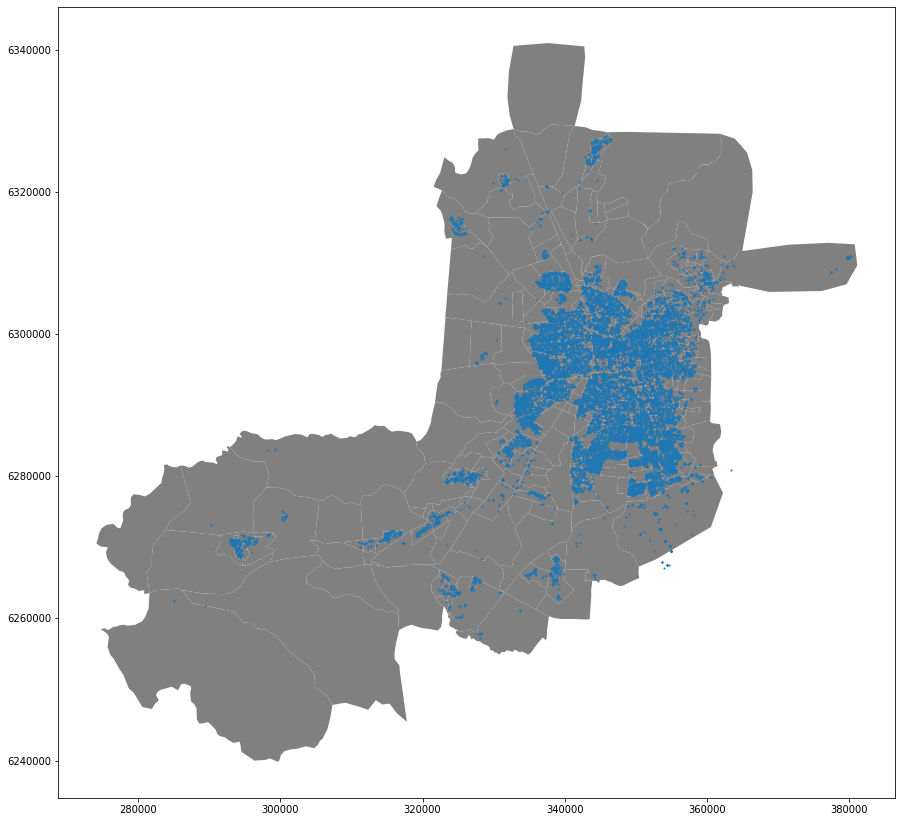

In [27]:
fig,ax = plt.subplots(figsize=(15,15))
# Plot the communas
zones.geometry.plot(ax=ax, alpha = 1, color = 'grey')
# Plot the household observations
df.geometry.plot(ax = ax, markersize = 1, color = 'tab:blue')
plt.show()

The map illustrates the communes (grey areas) and the househould observations (blue dots). Finally, the comunes in the transaction data and the crime data is compared to check how well they match.

In [28]:
print('Communes in crime data:',len(crimes.comuna_datachile_id.unique()))
print('Communes in zone data:',len(zones.comuna_datachile_id.unique()))
print('Comumunes in both crime and zone data:',len( set(crimes.comuna_datachile_id.unique()) & set(zones.comuna_datachile_id.unique()) ))

Communes in crime data: 346
Communes in zone data: 866
Comumunes in both crime and zone data: 346


### 2) Identifyng commune id of the transaction real estates
In this section the commmune is added to the transaction data. The code is outcommented due to long run time. The code is kept to show how the data was prepared and saved as a csv. Eventualy the csv is loaded to save run time. <br>

The section is inspired by this page https://stackoverflow.com/questions/48097742/geopandas-point-in-polygon  

Each hogar is assigned to a commune by matching its coordinates to the zones data as illustrated below:

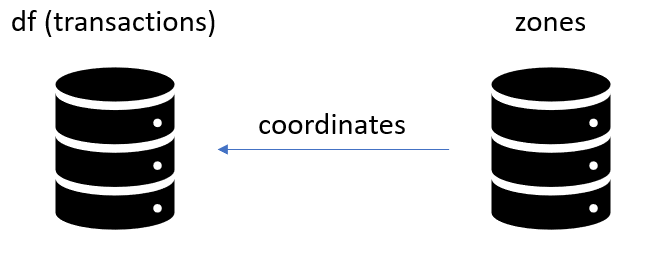

In [29]:
#Lists for polys
#c_ids = zones.comuna_datachile_id.tolist()
#geos = zones.geometry.tolist()

#Polys
#polys = gdp.GeoSeries({})
#for row in range(len(c_ids)):
#    polys[str(c_ids[row])] = geos[row]

#points
#_pnts = df.geometry.tolist()
#pnts = gdp.GeoDataFrame(geometry=_pnts, index=df.index)

In [30]:
#pnts.head()

In [31]:
#Assign points to comuna - OBS OBS OBS takes 1-2 minutes
#pnts = pnts.assign(**{key: pnts.within(geom) for key, geom in polys.items()})
#pnts.head()

In [32]:
#print('Total transactions:',len(df))
#print('Transactions assigned to 0 communes:',len(pnts[pnts.select_dtypes(include=['bool']).sum(axis=1)==0]))
#print('Transactions assigned to 1 commune',len(pnts[pnts.select_dtypes(include=['bool']).sum(axis=1)==1]))
#print('Transactions assigned to 2 communes',len(pnts[pnts.select_dtypes(include=['bool']).sum(axis=1)==2]))
#print('Transactions assigned to 3+ communes',len(pnts[pnts.select_dtypes(include=['bool']).sum(axis=1)>2]))

The 43 transactions that aren't assigned to a commune is left out. The 20 transaction assigned to 2 communes are assigned to the last. A new column indicationg the comunas_id is addded.

In [33]:
#pnts['comunas_id'] = np.nan
#pnts.head()

The column is filled as per below.

In [34]:
#row_failures = 0
#for row in range(len(pnts.index)):
#    try:
#        pnts.comunas_id.iloc[row] = pnts.columns[(pnts == True).iloc[row]][0]
#    except:
#        row_failures += 1
#        print('Row',row,' has no Trues.')

In [35]:
#row_failures # =43

In [36]:
#export_csv = pnts.to_csv('pnts.csv', index = True, header=True)

Here the table was saved. Going ahead the table is loaded as per below:

In [37]:
pnts = pd.read_csv('pnts.csv', usecols=['Hogar','comunas_id'])
pnts['comunas_id'] = pnts['comunas_id'].apply(lambda x: int(x) if x == x else "") #deals with float to int and deal with NaN
pnts.head()

Hogar comunas_id
0  100010        786
1  100020        785
2  100030        791
3  100041        791
4  100052        783

### 3) Merging criminality and transaction data by commune id

Finally the *comunas_id* are merged to the transaction data set applying *Hogar* as the key. The index is reset and will later be set to *Hogar* again.


In [38]:
# Reset the index
df=df.reset_index()
df.head()

Hogar Sector    DirCoordX    DirCoordY  MontoArr  IngresoHogar CLASE  \
0  100010      7  335180.8019  6266420.975    100000        450845     1   
1  100020      7  338410.2114  6265607.141    120000       1019369     1   
2  100030      7  327863.8248  6257800.086     70000         80000     1   
3  100041      7  327864.0000  6257800.000     80000        559259     2   
4  100052      7  338480.8152  6267296.941    117771        710309     2   

   Sup_Prom_Constr_Hab_EOD  Calid_EOD_norm_inv  DensConstr_EOD  ...  \
0                     53.8                0.98           0.059  ...   
1                     59.6                0.98           0.033  ...   
2                     59.5                0.98           0.004  ...   
3                     59.5                0.98           0.004  ...   
4                     43.6                0.98           0.086  ...   

   Acc_Industria_tpte_pub  Acc_Servicios_tpte_pub  Acc_Comercio_auto  \
0               671.08681               719.84272            3036.41   
1               671.08681               719.84272            3036.41   
2               671.08681               719.84272            3036.41   
3               671.08681               719.84272            3036.41   
4               671.08681               719.84272            3036.41   

   Acc_Educacion_auto  Acc_Habitacion_auto  Acc_Industria_auto  \
0             1781.81             30505.65             2853.19   
1             1781.81             30505.65             2853.19   
2             1781.81             30505.65             2853.19   
3             1781.81             30505.65             2853.19   
4             1781.81             30505.65             2853.19   

   Acc_Servicios_auto   Latitude  Longitude                         geometry  
0             3058.03 -33.729444 -70.779035  POINT (335180.8019 6266420.975)  
1             3058.03 -33.737278 -70.744340  POINT (338410.2114 6265607.141)  
2             3058.03 -33.805994 -70.859656  POINT (327863.8248 6257800.086)  
3             3058.03 -33.805995 -70.859654           POINT (327864 6257800)  
4             3058.03 -33.722055 -70.743270  POINT (338480.8152 6267296.941)  

[5 rows x 27 columns]

In [39]:
#Merge on Hogar to get the comunas_id column.
df = df.merge(pnts,how='left',on='Hogar')
df.head()

Hogar Sector    DirCoordX    DirCoordY  MontoArr  IngresoHogar CLASE  \
0  100010      7  335180.8019  6266420.975    100000        450845     1   
1  100020      7  338410.2114  6265607.141    120000       1019369     1   
2  100030      7  327863.8248  6257800.086     70000         80000     1   
3  100041      7  327864.0000  6257800.000     80000        559259     2   
4  100052      7  338480.8152  6267296.941    117771        710309     2   

   Sup_Prom_Constr_Hab_EOD  Calid_EOD_norm_inv  DensConstr_EOD  ...  \
0                     53.8                0.98           0.059  ...   
1                     59.6                0.98           0.033  ...   
2                     59.5                0.98           0.004  ...   
3                     59.5                0.98           0.004  ...   
4                     43.6                0.98           0.086  ...   

   Acc_Servicios_tpte_pub  Acc_Comercio_auto  Acc_Educacion_auto  \
0               719.84272            3036.41             1781.81   
1               719.84272            3036.41             1781.81   
2               719.84272            3036.41             1781.81   
3               719.84272            3036.41             1781.81   
4               719.84272            3036.41             1781.81   

   Acc_Habitacion_auto  Acc_Industria_auto  Acc_Servicios_auto   Latitude  \
0             30505.65             2853.19             3058.03 -33.729444   
1             30505.65             2853.19             3058.03 -33.737278   
2             30505.65             2853.19             3058.03 -33.805994   
3             30505.65             2853.19             3058.03 -33.805995   
4             30505.65             2853.19             3058.03 -33.722055   

   Longitude                         geometry  comunas_id  
0 -70.779035  POINT (335180.8019 6266420.975)         786  
1 -70.744340  POINT (338410.2114 6265607.141)         785  
2 -70.859656  POINT (327863.8248 6257800.086)         791  
3 -70.859654           POINT (327864 6257800)         791  
4 -70.743270  POINT (338480.8152 6267296.941)         783  

[5 rows x 28 columns]

Finally the amount of crime (sum of all cases) in the commune is merged to the real estate transaction date. The initial intend was to categorise crime by severity but since the data turned out to be missing for the city center, hence this level of detail has been left out. <br>

The crime data is grouped by commune and merged on commune ID to the transaction data, as illustrated below:

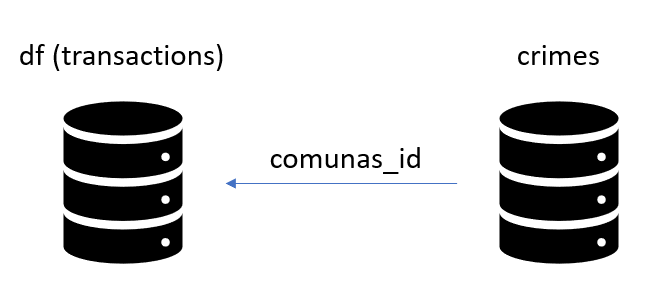

In [40]:
# Change heading of column
crimes = crimes.rename(columns={"comuna_datachile_id": "comunas_id"})
crimes.head()

year  comunas_id  felony_id  cases  region_id region_name comuna_name  \
0  2005.0           1          1   18.0          5  Valparaíso   Algarrobo   
1  2005.0           1          2    1.0          5  Valparaíso   Algarrobo   
2  2005.0           1          3  334.0          5  Valparaíso   Algarrobo   
3  2005.0           1          4    4.0          5  Valparaíso   Algarrobo   
4  2005.0           1          5   30.0          5  Valparaíso   Algarrobo   

                           felony_es  
0  robo con violencia o intimidación  
1                  robo por sorpresa  
2                    robo con fuerza  
3                    robo de veículo  
4        robo accesorios del veículo

In [41]:
# Group by communa ID
crimes_df = pd.DataFrame(crimes.groupby('comunas_id').cases.sum())
crimes_df = crimes_df.reset_index()
crimes_df.head()

comunas_id    cases
0           1  16305.0
1           2   1785.0
2           3   1359.0
3           4    983.0
4           5  61891.0

The two dataframes are now meged so the household transactions dataframe gets the amount of cases within the *communas_id*.

In [42]:
df = df.merge(crimes_df,how='left',on='comunas_id') #Merge on Hogar to get the comunas_id column.
df.head()

Hogar Sector    DirCoordX    DirCoordY  MontoArr  IngresoHogar CLASE  \
0  100010      7  335180.8019  6266420.975    100000        450845     1   
1  100020      7  338410.2114  6265607.141    120000       1019369     1   
2  100030      7  327863.8248  6257800.086     70000         80000     1   
3  100041      7  327864.0000  6257800.000     80000        559259     2   
4  100052      7  338480.8152  6267296.941    117771        710309     2   

   Sup_Prom_Constr_Hab_EOD  Calid_EOD_norm_inv  DensConstr_EOD  ...  \
0                     53.8                0.98           0.059  ...   
1                     59.6                0.98           0.033  ...   
2                     59.5                0.98           0.004  ...   
3                     59.5                0.98           0.004  ...   
4                     43.6                0.98           0.086  ...   

   Acc_Comercio_auto  Acc_Educacion_auto  Acc_Habitacion_auto  \
0            3036.41             1781.81             30505.65   
1            3036.41             1781.81             30505.65   
2            3036.41             1781.81             30505.65   
3            3036.41             1781.81             30505.65   
4            3036.41             1781.81             30505.65   

   Acc_Industria_auto  Acc_Servicios_auto   Latitude  Longitude  \
0             2853.19             3058.03 -33.729444 -70.779035   
1             2853.19             3058.03 -33.737278 -70.744340   
2             2853.19             3058.03 -33.805994 -70.859656   
3             2853.19             3058.03 -33.805995 -70.859654   
4             2853.19             3058.03 -33.722055 -70.743270   

                          geometry  comunas_id  cases  
0  POINT (335180.8019 6266420.975)         786    NaN  
1  POINT (338410.2114 6265607.141)         785    NaN  
2  POINT (327863.8248 6257800.086)         791    NaN  
3           POINT (327864 6257800)         791    NaN  
4  POINT (338480.8152 6267296.941)         783    NaN  

[5 rows x 29 columns]

In [43]:
print('Total communes:',len(df.comunas_id.unique()))
print('Communes with crime records:',len(df[df.cases > 0].comunas_id.unique()))
print('Total transactions:',len(df))
print('Real estates with crime records:',len(df[df.cases > 0]))

Total communes: 791
Communes with crime records: 326
Total transactions: 17876
Real estates with crime records: 6464


One third of the transactions are in communes where crime data is avaiable. For the communes without crime date, the mean amount of crime in all communes is applied. This will allow modelling and give a neutral effect in models. <br>

At the same time *DirCoordX*, *DirCoordY* and *geometry* are removed as they are explaiend by *Longitude*, *Latitude* and *communas_ID* and are no longer needed. 

In [44]:
df['cases'] = df['cases'].fillna(df['cases'].mean())
coords_and_geom = df[['Hogar','DirCoordX', 'DirCoordY','geometry']] #Save for potential use later on.
df = df.set_index('Hogar')
df = df.drop(['DirCoordX', 'DirCoordY','geometry'], axis=1)
df.head()

Sector  MontoArr  IngresoHogar CLASE  Sup_Prom_Constr_Hab_EOD  \
Hogar                                                                  
100010      7    100000        450845     1                     53.8   
100020      7    120000       1019369     1                     59.6   
100030      7     70000         80000     1                     59.5   
100041      7     80000        559259     2                     59.5   
100052      7    117771        710309     2                     43.6   

        Calid_EOD_norm_inv  DensConstr_EOD  Dist_est_Metro_MC_KM  \
Hogar                                                              
100010                0.98           0.059             23.051711   
100020                0.98           0.033             21.080177   
100030                0.98           0.004             34.147894   
100041                0.98           0.004             34.147817   
100052                0.98           0.086             19.908792   

        Dist_salida_Autop_MC_KM  Tiempo_Com_Stgo  ...  Acc_Servicios_tpte_pub  \
Hogar                                             ...                           
100010                 4.345179               69  ...               719.84272   
100020                 1.381521               84  ...               719.84272   
100030                11.993389               83  ...               719.84272   
100041                11.993268               83  ...               719.84272   
100052                 1.363177               94  ...               719.84272   

        Acc_Comercio_auto  Acc_Educacion_auto  Acc_Habitacion_auto  \
Hogar                                                                
100010            3036.41             1781.81             30505.65   
100020            3036.41             1781.81             30505.65   
100030            3036.41             1781.81             30505.65   
100041            3036.41             1781.81             30505.65   
100052            3036.41             1781.81             30505.65   

        Acc_Industria_auto  Acc_Servicios_auto   Latitude  Longitude  \
Hogar                                                                  
100010             2853.19             3058.03 -33.729444 -70.779035   
100020             2853.19             3058.03 -33.737278 -70.744340   
100030             2853.19             3058.03 -33.805994 -70.859656   
100041             2853.19             3058.03 -33.805995 -70.859654   
100052             2853.19             3058.03 -33.722055 -70.743270   

        comunas_id         cases  
Hogar                             
100010         786  30562.039642  
100020         785  30562.039642  
100030         791  30562.039642  
100041         791  30562.039642  
100052         783  30562.039642  

[5 rows x 25 columns]

A more throughout approach of filling out the missing data, could be to take a mean of the neighbouring communes only. However, this level of detail is not deemed to be key for this project.

Another approach to processing the crime data could be to keep the crimes seperated by type or group them by severity. Again this level of detail is not key for this project. The intend of adding the crime data is purely to get insight into any patterns between the level of crime and the type of households in an area.

Finally the features *cases* is renamed to *crimes*

In [45]:
df = df.rename(columns={"cases": "crimes"})

# Initial data analysis
In this section statistics, correlations, outliers and distributions of features are analysed.

## Statistical overview

A quick statistical overview of the features is listed below.

In [46]:
df.describe()

MontoArr  IngresoHogar  Sup_Prom_Constr_Hab_EOD  \
count  1.787600e+04  1.787600e+04             17876.000000   
mean   1.864080e+05  6.818226e+05                49.653250   
std    1.581698e+05  7.088558e+05                22.289748   
min    1.000000e+04  0.000000e+00                 0.000000   
25%    1.104528e+05  2.994332e+05                39.000000   
50%    1.500000e+05  5.035770e+05                45.500000   
75%    2.000000e+05  8.358430e+05                56.500000   
max    5.000000e+06  1.480000e+07               207.300000   

       Calid_EOD_norm_inv  DensConstr_EOD  Dist_est_Metro_MC_KM  \
count        17876.000000    17876.000000          17876.000000   
mean             0.650756        0.375066              4.643855   
std              0.347441        0.455717              7.652800   
min              0.000000        0.000000              0.014242   
25%              0.360000        0.177000              0.860732   
50%              0.780000        0.253000              1.966282   
75%              0.980000        0.353000              4.302510   
max              1.000000        4.599000             59.055760   

       Dist_salida_Autop_MC_KM  Tiempo_Com_Stgo  Ingreso_Promedio_Zona_MM  \
count             17876.000000     17876.000000              17876.000000   
mean                  2.030908        59.278642                  0.679409   
std                   1.848556        21.995396                  0.374589   
min                   0.012117       -99.000000                  0.147514   
25%                   0.888609        45.000000                  0.475524   
50%                   1.544534        59.000000                  0.581267   
75%                   2.602728        71.000000                  0.725444   
max                  21.284732       202.000000                  4.957229   

       Acc_Comercio_tpte_pub  ...  Acc_Industria_tpte_pub  \
count           17876.000000  ...            17876.000000   
mean             2321.774226  ...             1805.475526   
std              1415.015227  ...             1032.529893   
min               -99.000000  ...              -99.000000   
25%              1257.907110  ...             1035.503200   
50%              2066.994890  ...             1636.806360   
75%              3268.364730  ...             2546.775593   
max              6096.118100  ...             4536.557030   

       Acc_Servicios_tpte_pub  Acc_Comercio_auto  Acc_Educacion_auto  \
count            17876.000000       17876.000000        17876.000000   
mean              2537.346699        5865.568045         3382.027705   
std               1774.232145        1596.535891          862.061796   
min                -99.000000         -99.000000          -99.000000   
25%               1102.425140        5081.660000         3053.750000   
50%               2048.700030        6055.310000         3522.550000   
75%               3551.267210        6961.840000         3989.490000   
max               7713.396150        8583.060000         4681.260000   

       Acc_Habitacion_auto  Acc_Industria_auto  Acc_Servicios_auto  \
count         17876.000000        17876.000000        17876.000000   
mean          58008.318474         5073.515840         6277.100754   
std           14132.351300         1306.792209         1930.352011   
min             -99.000000          -99.000000          -99.000000   
25%           52924.280000         4497.530000         5054.110000   
50%           61213.100000         5277.110000         6415.370000   
75%           68349.480000         6006.600000         7683.200000   
max           75774.780000         7260.030000        10000.680000   

           Latitude     Longitude         crimes  
count  17876.000000  17876.000000   17876.000000  
mean     -33.496695    -70.674639   30562.039642  
std        0.096748      0.110173   36653.580984  
min      -33.810955    -71.321708       0.000000  
25%      -33.564861    -70.730485   16017.000000  
50%      -33.49062

As most attributes will be investigated further, only statistics for a single attribute is explained here to illustrate the understanding.

The mean monthly rent 'MontoArr' is 186k Chilean Pesos and the IQR is [110k, 200k] Chilean Pesos. The minium and maximum monthly rents are 10k and 500k Chilean Pesos respectively. Below a boxplot and the distribution for 'MontoArr' is shown.

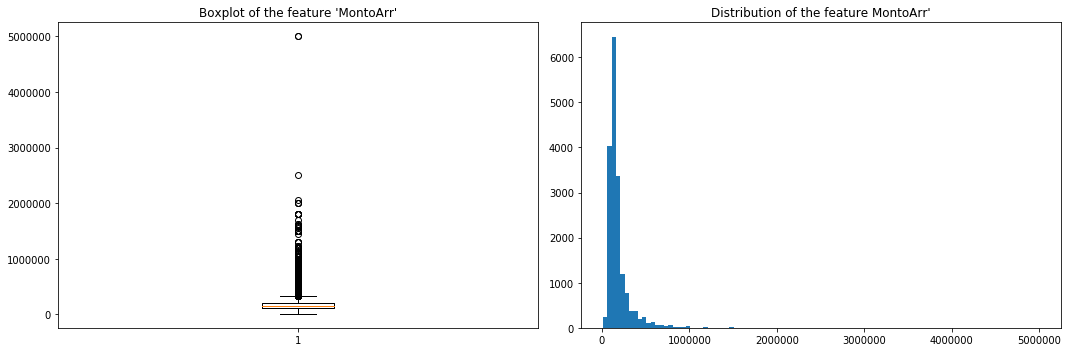

In [47]:
## Set subplot
fig, axs = plt.subplots(1, 2, figsize=(15,5))
## Plots
axs[0].boxplot(df.MontoArr);
axs[1].hist(df.MontoArr,bins=100);
axs[0].set_title("Boxplot of the feature 'MontoArr'")
axs[1].set_title("Distribution of the feature MontoArr'")
fig.tight_layout()
plt.show()

In [48]:
print('Households with MontoArr above 1.5M:',len(df.MontoArr[df.MontoArr>1500000]))

Households with MontoArr above 1.5M: 21


The median monthly dwelling is 150k Chilean Pesos. The median is lower than the mean indicating that a minority of the households pays a much higher rent than the majority. This is also illustrated by the many outliers in the boxplot and by the historgram having a positive skew.

21 households have significantly high monthly rents (1.5M). To get a better overview the MontoArr data is illustrated again without these.

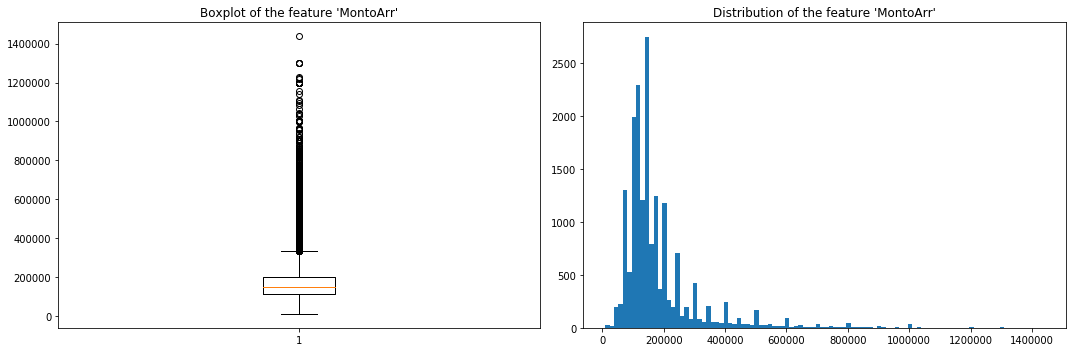

In [49]:
## Set subplot
fig, axs = plt.subplots(1, 2, figsize=(15,5))
## Plots
axs[0].boxplot(df.MontoArr[df.MontoArr < 1500000]);
axs[1].hist(df.MontoArr[df.MontoArr < 1500000],bins=100);
axs[0].set_title("Boxplot of the feature 'MontoArr'")
axs[1].set_title("Distribution of the feature 'MontoArr'")
fig.tight_layout()
plt.show()

The majoroty of the households, the ones in the IQR, all pay a very similar rent. A significant part of the households pays a much higher rent. 

## Correlation check <a id = "coor"><a>

In this section the correlations between features are looked into to determine if any should be removed. Since Clase is a categorical feature it is not considered in this correlation check. Instead correlation between the continous features are investigated.

It is desirable that explanatory features are uncorrelated, since highly correlated features will not add any relevant information to exaplin the target, but instead increase the dimensionality of the dataset and the computational time when analysing. It is however desirable that the explanatory features are correlated with the target feature. Since the target is categorical it does mathematical not make sense to look at the correlation between it and features, however this is something practiced when doing data analysis, the same is therefor done here. *CLASE* is therefor set back to being integer of type.

To get a better understanding of the correlations, a Person correlation matrix is plotted which shows the correlation between the continous features.
- A value close to 0 means there is little correlation (0 meaning excatly no correlation)
- Values close to 1 menas there is a strong positiv correlation
- Values close to -1 means there is a strong negative correlation

In [50]:
# Reset CLASE as continous
df['CLASE'] = df['CLASE'].astype('int64')

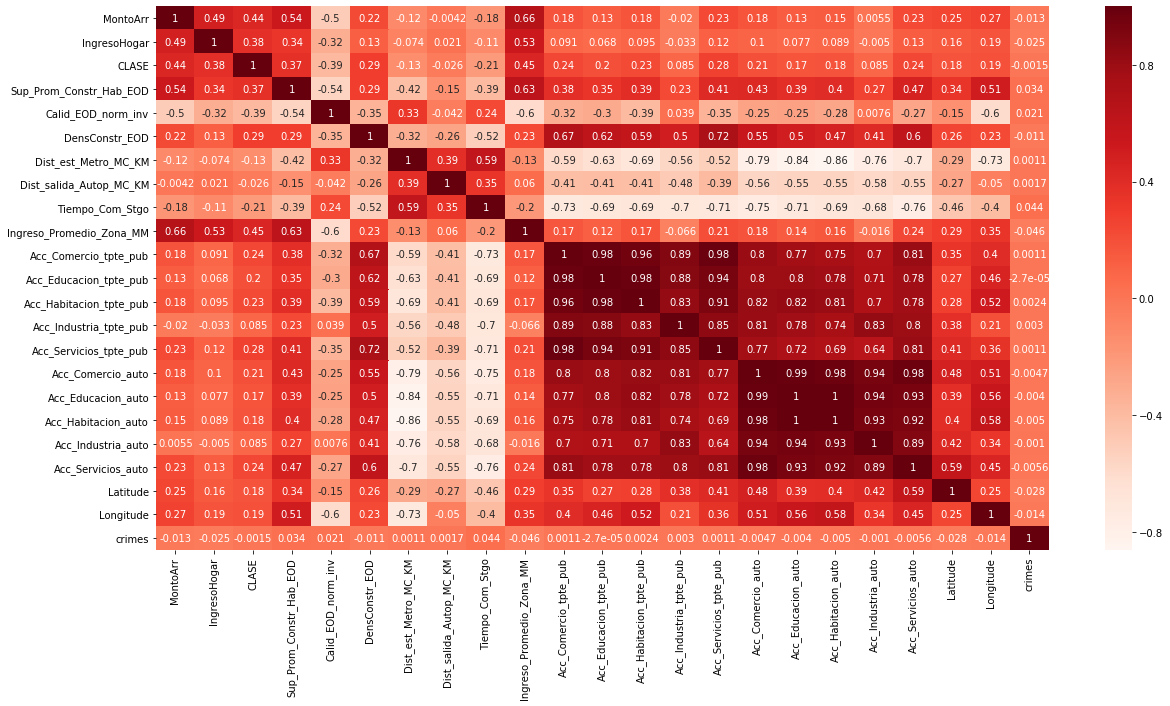

In [51]:
#Using Pearson Correlation
plt.figure(figsize=(20,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

A key observation from the correlation matrix is that there is a large area with dark red colours from the feature 'Acc_Comercio_tpte_pub' to the feature 'Acc_Servicios_auto'. These features are highly positive correlated and will be evaluated further. Furthermore 'Dist_est_Metro_MC_KM' is highly negativ correlated with 'Acc_Educacion_auto' and 'Acc_Habitacion_auto' and should also be investigated. 

All the features starting with 'Acc' and all the ones which ends with 'pub' has a correlation higher than 0.8 and most have higher than 0.95 with each other. The same is true for the features which starts with 'Acc' and ends on 'auto'. Therefor all but one feature can be removed within each of these two groups, without loosing significant explanatory power. As 'Acc_Servicios_tpte_pub' and 'Acc_Servicios_auto' are the two features which are highly correlated with the target variable these two features are selected to keep. By removing these the negativ correlations for 'Dist_est_Metro_MC_KM' are also dealt with.

The original dataframe is saved as it will be used later and the columns specified are removed.

In [52]:
# Set CLASE as categorical
df['CLASE'] = df['CLASE'].astype('category')

# Save the orginal cleaned data set
df_all = df

# Columns to exclude
exclude_columns = ['Acc_Comercio_tpte_pub','Acc_Educacion_tpte_pub', 'Acc_Habitacion_tpte_pub','Acc_Industria_tpte_pub',
                'Acc_Comercio_auto','Acc_Educacion_auto', 'Acc_Habitacion_auto', 'Acc_Industria_auto','Acc_Servicios_auto']
df = df.drop(exclude_columns,1) 

## Outlier detection <a id = "outlier"><a>

In this section the data is being investigated for outliers. Outliers with possible values will be kept in the data, but outliers with impossible data will be removed. Intially the distribution of each attribute in the data is displayed with a boxplot to identify outliers. Here the features *communas_id*, *Sector* and *CLASE* are left out as these are categorical featurs.

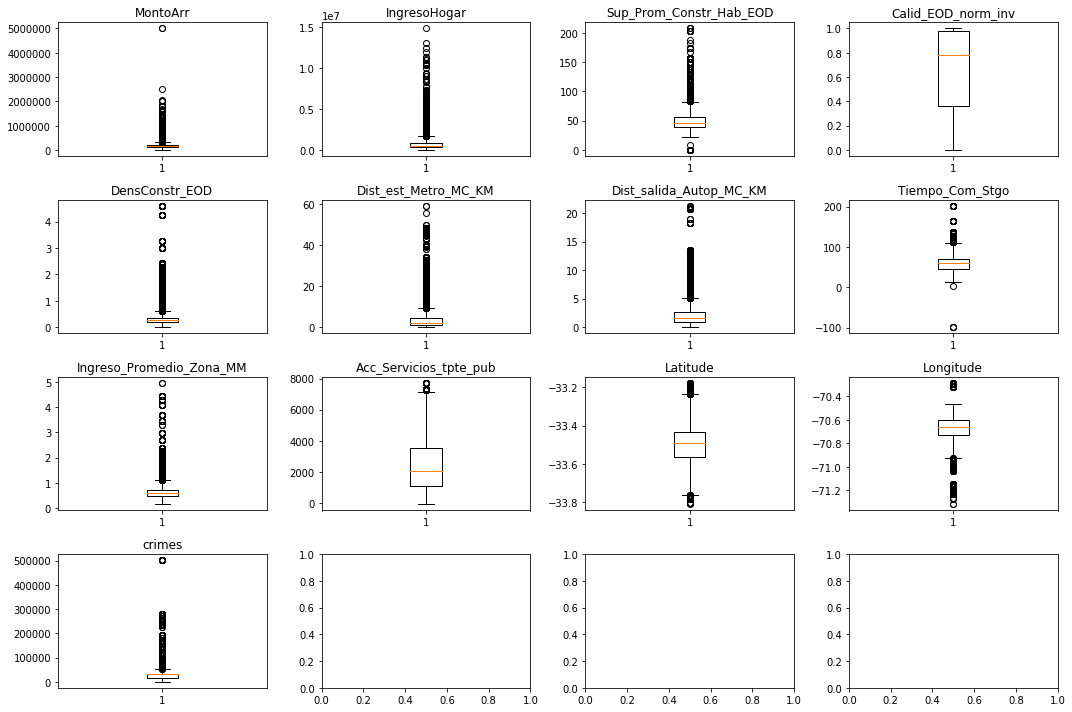

In [53]:
fig, axs = plt.subplots(4, 4,figsize=(15,10))
i = 0
j = 0

cont_feats = ['MontoArr', 'IngresoHogar', 'Sup_Prom_Constr_Hab_EOD', 'Calid_EOD_norm_inv',
              'DensConstr_EOD','Dist_est_Metro_MC_KM', 'Dist_salida_Autop_MC_KM', 
              'Tiempo_Com_Stgo','Ingreso_Promedio_Zona_MM', 'Acc_Servicios_tpte_pub',
              'Latitude','Longitude', 'crimes']

for att in range(len(df[cont_feats].columns)):
    axs[i, j].boxplot(df[cont_feats][df[cont_feats].columns[att]])
    axs[i, j].set_title('%s' %df[cont_feats].columns[att])
    if j == 3:
        i+=1
        j=0
    else:
        j+=1
plt.tight_layout()

In the boxplot the upper and lower whiskers are defined as (q75+1.5IQR) and (q25-1.5IQR) respectively. Per definition, an observation outside the whisker range is considered an outlier.  

Several features in the dataset have outliers. The outlier statistics for each feature is calculated below.

In [54]:
for att in df[cont_feats].columns:
    Q1 = df[att].quantile(0.25)
    Q3 = df[att].quantile(0.75)
    IQR = Q3 - Q1
    diff = df.shape[0] - df[(Q1-1.5*IQR <= df[att]) & (df[att] <= Q3+1.5*IQR)].shape[0]
    under = len(df[Q1-1.5*IQR >= df[att]])
    over = len(df[Q3+1.5*IQR <= df[att]])
    if diff != 0:
        print('-------',att,'-------')
        print('Total outliers:',diff)
        print('Total outliers %:', round(diff/df.shape[0]*100,1) ) 
        print('Outliers above:',over)
        print('Outliers below:',under)
    else:
        print('-------',att,'-------')
        print('No outliers')

------- MontoArr -------
Total outliers: 1682
Total outliers %: 9.4
Outliers above: 1682
Outliers below: 0
------- IngresoHogar -------
Total outliers: 1047
Total outliers %: 5.9
Outliers above: 1047
Outliers below: 0
------- Sup_Prom_Constr_Hab_EOD -------
Total outliers: 2513
Total outliers %: 14.1
Outliers above: 1538
Outliers below: 975
------- Calid_EOD_norm_inv -------
No outliers
------- DensConstr_EOD -------
Total outliers: 2434
Total outliers %: 13.6
Outliers above: 2434
Outliers below: 0
------- Dist_est_Metro_MC_KM -------
Total outliers: 1996
Total outliers %: 11.2
Outliers above: 1996
Outliers below: 0
------- Dist_salida_Autop_MC_KM -------
Total outliers: 653
Total outliers %: 3.7
Outliers above: 653
Outliers below: 0
------- Tiempo_Com_Stgo -------
Total outliers: 340
Total outliers %: 1.9
Outliers above: 348
Outliers below: 5
------- Ingreso_Promedio_Zona_MM -------
Total outliers: 1900
Total outliers %: 10.6
Outliers above: 1900
Outliers below: 0
------- Acc_Servicio

Selected attributes with a potential outlier issue are discussed here.  

**Wealth**<br>
The 'MontoArr' distribution clearly indicates that the upperclass is a minoirty since 9.4% of households have monthly dwellings as high outliers. Particularly two monthly dwelling are way beyond the rest. It is decided to remove these observations as they are twice as high as the second highest and do not describe the housing market very well, since few real estates will have a rent of this magnitude.

The 'IngresoHogar' distribution clearly indicates that the upperclass is a minoirty since 5.9% of households have income as high outliers. No incomes are far beyond or below all others.

The 'Ingreso_Promedio_Zona_MM' distribution is similar to that of 'MontoArr' and 'IngressoHogar' with 10.6% high outliers indicating that 10.6% of the zones in the city has a average income as high outlier.

**Construction Density**<br>
The 'Sup_Prom_Constr_Hab_EOD' dsitribution has a compact IQR around 50 and 14.1% outliers with 3/5 being high outliers. This indicates that the average built surface by residential units is quit stable in 85.9% of the city. None of the outliers are far beyond or below all others. 

The 'DensConstr_EOD' distribution has a comapct IQR around 0.5 and 13.6% high outliers. The attribute indicates built density in zone (built surface divided by zone surface), hence values above 1 indicates buildings with multiple floors.

**Transport**<br>
Both 'Dist_est_Metro_MC_KM' and 'Dist_salida_Autop_MC_KM' have compact IQRs and no outliers far beyond the rest.

The 'Tiempo_Com_Stgo' attribute indicates the travel in minutes to CBD. Four observations have negative travel times which are impossible values. These observations are excluded from the data.

**Criminality**<br>
A single commune had 500k crime cases from 2005 to 2016. This observation is far beyond the second highest and translates into a daily average of 125 crimes. The commune with the second highest level had 300k crimes from 2005 to 2016 translating into a daily average of 75 crimes. A similar approach as used for removing outliers in 'MontoArr' could have been used, but in this case the amount of crimes are for a whole area and do not differ for each observation. No observations are therefor removed because of the amount of crimes. The high level of crime is doubtful, however this can be possible with 5.6 million in habitants, and the source is deemed valid, hence this is not excluded.

In [55]:
#Exclude the highest 'MontoArt'
print(df.shape[0])
df = df[df['MontoArr']<4000000]
print(df.shape[0])

#Exclude Tiempo_Com_Stgo < 0
df = df[df.Tiempo_Com_Stgo > 0]
df.shape[0]

17876
17874


17870

In total 6 observations are removed thus reducing the number of observations to 17870.

## Distribution of target feature <a id = "explo"><a>

In this section the distribution of the target feature is checked.

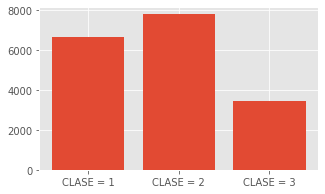

In [56]:
## Define plot size and style
plt.rcParams['figure.figsize'] = (5, 3)
plt.style.use('ggplot')

## Bar plot
plt.bar(['CLASE = 1','CLASE = 2','CLASE = 3'], df.groupby(['CLASE']).count()['MontoArr'].values)
plt.show()

There are fewer observation of CLASE = 3 than the rest. This is something that has to be considered when training and testing a model to do prediction. It will however also depend on how the observations are distributed in the test and training sets. But as the test/train split is decided in the assignment to be tested on the city center and trained on the surrounding observations it is simply something to be aware of.

# Exploratory analysis

This section will explore the data, to reveal valuable insights for real estate companies in Santiago de Chile.

## a) Wealth and household type

This section explores how wealth is related to the type of household. Below the *IngresoHogar* (Household income) and *MontoArr* (monthely rent) are plotted against the 'CLASE'.

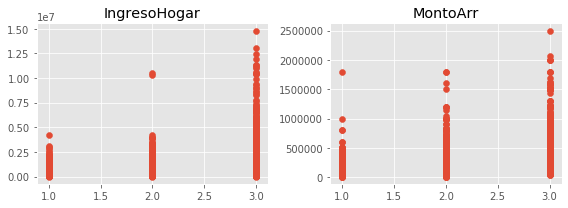

In [57]:
## Set subplot
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(8,3))

## Scatterplots
ax1.scatter(df.CLASE,df.IngresoHogar)
ax1.set_title("IngresoHogar")
ax2.scatter(df.CLASE,df.MontoArr)
ax2.set_title("MontoArr")
fig.tight_layout()
plt.show()

It can be seen that the observations with highest income are the observations which are in the CLASE = 3, and thereby also the ones with the longest educations. It can further be seen that there are more observations with high rents in CLASE = 3. To see more clearly how this is distributed between the different CLASE's histograms are plotted. To better visualize the distributions the x-axis is limited, so some of the observations are not within the plot.

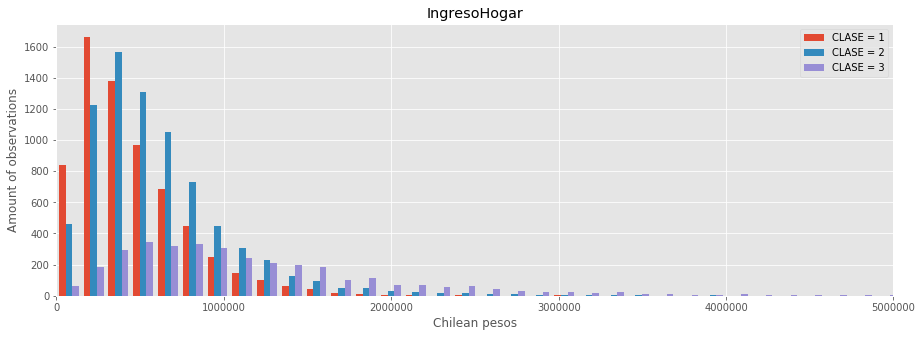

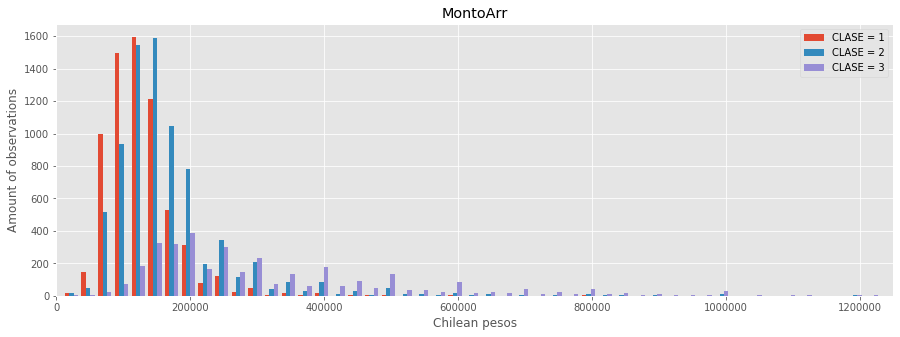

In [58]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('ggplot')

fea = ['IngresoHogar','MontoArr']
limit = [5*10**6, 1250000] # limits for x-axis

for i in range(0,len(fea)):
    x = df[df['CLASE'] ==1][fea[i]]
    y = df[df['CLASE'] ==2][fea[i]]
    z = df[df['CLASE'] ==3][fea[i]]
    plt.hist([x, y, z], bins=100, label=['CLASE = 1', 'CLASE = 2','CLASE = 3'])
    plt.legend(loc='upper right')
    plt.title(fea[i])
    plt.xlabel("Chilean pesos")
    plt.ylabel("Amount of observations")
    plt.xlim(0,limit[i])
    plt.show()
plt.show()

The two bar plots back up the patterns showed in the scatter plots. The CLASE = 1 has most observations when the household income and monthly rent are lowest. As the income and rent gets bigger (moves towards the right in the plots) it becomes the CLASE = 2 which has most observations and for the highest incomes and rents CLASE = 3 has the most observations. It thus seems that the longer an education, the higher the income and the more expensive the rent will be. 

## b) Wealth and area characteristics
This section looks into how the wealth is related to area characteristics to see how wealth determines what kind of real estate one buys. Below scatter plot for selected features are plotted.

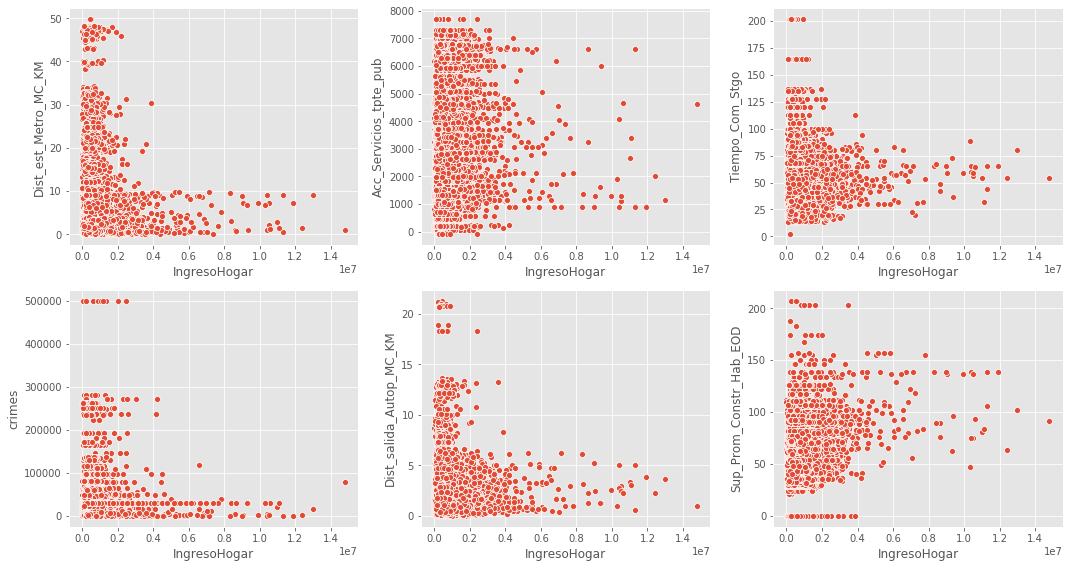

In [59]:
fig, axes = plt.subplots(2, 3, figsize=(15,8))
sns.scatterplot(df['IngresoHogar'], df['Dist_est_Metro_MC_KM'], data=df, ax = axes[0,0])
sns.scatterplot(df['IngresoHogar'], df['Acc_Servicios_tpte_pub'], data=df, ax = axes[0,1])
sns.scatterplot(df['IngresoHogar'], df['Tiempo_Com_Stgo'], data=df, ax = axes[0,2])
sns.scatterplot(df['IngresoHogar'], df['crimes'], data=df, ax = axes[1,0])
sns.scatterplot(df['IngresoHogar'], df['Dist_salida_Autop_MC_KM'], data=df, ax = axes[1,1])
sns.scatterplot(df['IngresoHogar'], df['Sup_Prom_Constr_Hab_EOD'], data=df, ax = axes[1,2])
fig.tight_layout()
plt.show()

The plots show the following tendencies:
- *Dist_est_Metro_MC_KM*: Many people with low income have long distances to the nearest metro station. No high income people live more than 10 km away from a metro station.
- *Acc_Servicios_tpte_pub*: There is no clear patterns for income and access to services with public transport.
- *Tiempo_Com_Stgo*: Similar to the insights from the metro stations, more people with low income have longer travel time to the city center. No high income people have long travel time to city center.
- *crimes*: The crime levels are low for the high income citizen, for some low income households the crime rate is high.
- *Dist_salide_Autop_MC_KM*: Many low income households have longer distances to the highway, and no high income households have long distances to the highway.
- *Sup_Prom_Constr_Hab_EOD*: There is no clear relationship between the average built surface of residential units in the zone and the wealth.

From this analysis it is concluded that wealth has a role in determining the characteristics of what kind of real estate a household will buy.

## c) Crime
This section explores whether the level of crime in a commune has an impact on the type of households in the commune.

First step is to investigate whether the level of crime is different accros coomunes. The first hypothesis is that there is significant difference between the level of criminality between communes.

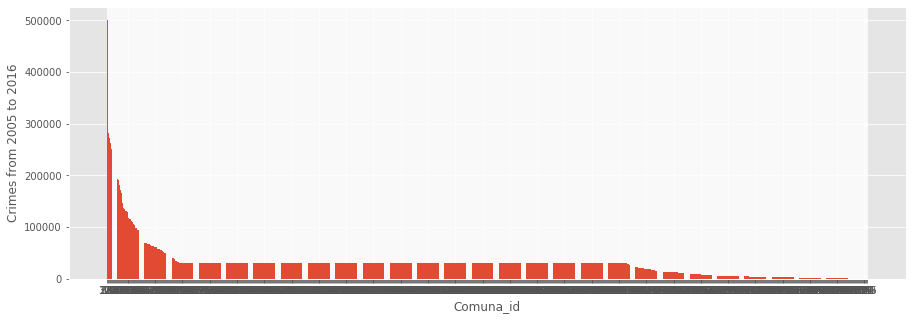

In [60]:
c_id = [str(i) for i in df.groupby('comunas_id').mean().sort_values(['crimes'],ascending=False).index]
crim = df.groupby('comunas_id').mean().sort_values(['crimes'],ascending=False).crimes

plt.bar(c_id,crim)
plt.xlabel('Comuna_id')
#plt.xticks(np.arange(len(c_id)), c_id, rotation='vertical')
plt.ylabel('Crimes from 2005 to 2016')
plt.show()

There is clearly some coomunes with much higher levels of crimininality than others. The main plateu indicates the communes reciving the mean value in the data preperation. The communes with the highest level of criminiality have much higher levels than the mean and the least criminal communes.

For the rest of this section, communes where missing values for crime have been replaced by the mean amount of crime, are excluded, to get the true insight for the real estate agents. 

Checking the distribution without the mean replacemented communes, the bar chart below, indicates a steep decline in crimes from the most criminal communes to the least criminal communes. Since, the observations with NaN's for crimes were replaced by the mean, a few more observations has been removed, hence the mean +-1 is catching this skew.

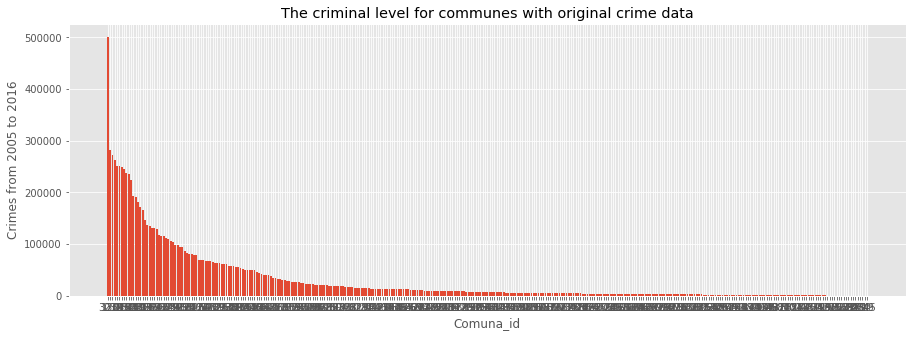

In [61]:
crim_mean = df.crimes.mean()
df_c = df[(df.crimes < crim_mean-2) | (df.crimes > crim_mean+2)] 
#Since the Nans were replaced by the mean a few more observations has been removed, hence the mean +-1 is cathing this skew.

c_id = [str(i) for i in df_c.groupby('comunas_id').mean().sort_values(['crimes'],ascending=False).index]
crim = df_c.groupby('comunas_id').mean().sort_values(['crimes'],ascending=False).crimes

plt.bar(c_id,crim)
plt.xlabel('Comuna_id')
#plt.xticks(np.arange(len(c_id)), c_id, rotation='vertical')
plt.ylabel('Crimes from 2005 to 2016')
plt.title('The criminal level for communes with original crime data')
plt.show()

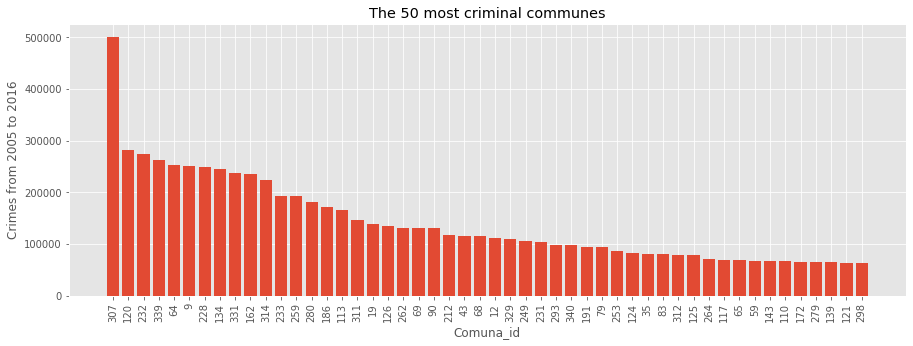

In [62]:
k = 50
plt.rcParams['figure.figsize'] = (15,5)
plt.style.use('ggplot') #or 'default'

plt.bar(c_id[:k],crim[:k])
plt.xlabel('Comuna_id')
plt.xticks(np.arange(len(c_id[:k])), c_id[:k], rotation='vertical')
plt.ylabel('Crimes from 2005 to 2016')
plt.title('The %i most criminal communes' %k)
plt.show()

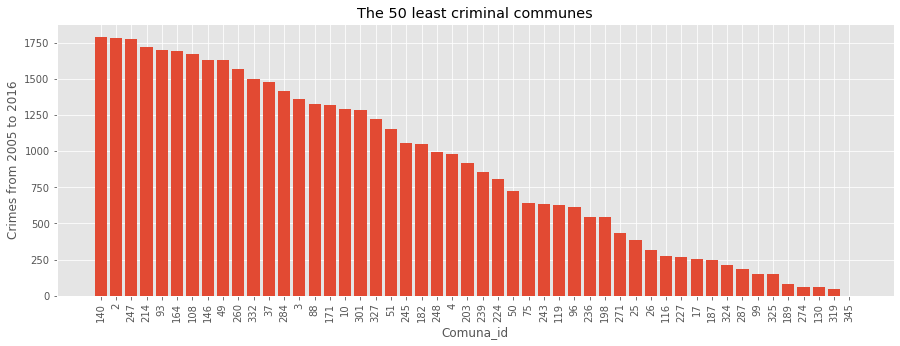

In [63]:
plt.bar(c_id[-k:],crim[-k:])
plt.xlabel('Comuna_id')
plt.xticks(np.arange(len(c_id[-k:])), c_id[-k:], rotation='vertical')
plt.ylabel('Crimes from 2005 to 2016')
plt.title('The %i least criminal communes' %k)
plt.show()

The 50 most criminal communes experience far more crime than the 50 least criminal communes. The hypthesis is confirmed, theres is significant difference between the level of criminality between communes. With such a significant difference in crime between communes it might impact the types of households living there, hence the exploration continues.

Second step is to search for patterns between the ratio of household types and the level of criminality in the communes. Intially the hypthesis is:<br>
In the top 50 most criminal communes, the ratio of 'low' and 'medium' househould types (CLASE - 1,2) is higher, and the ratio of 'top' household type (CLASE - 3) is lower, than on the 50 least criminal communes.

In [64]:
df_topk= df_c[df_c.comunas_id.isin(list(map(int, c_id[:k])))]
df_topk= df_topk[['CLASE','comunas_id']]
g1 = df_topk.groupby(['CLASE']).count()

df_botk = df[df.comunas_id.isin(list(map(int, c_id[-k:])))]
df_botk = df_botk[['CLASE','comunas_id']]
g2 = df_botk.groupby(['CLASE']).count()

print('Amount of house holds in top 50 criminal communes:',len(df_topk))
print('Amount of house holds in the 50 least criminal communes:',len(df_botk))

Amount of house holds in top 50 criminal communes: 1041
Amount of house holds in the 50 least criminal communes: 1010


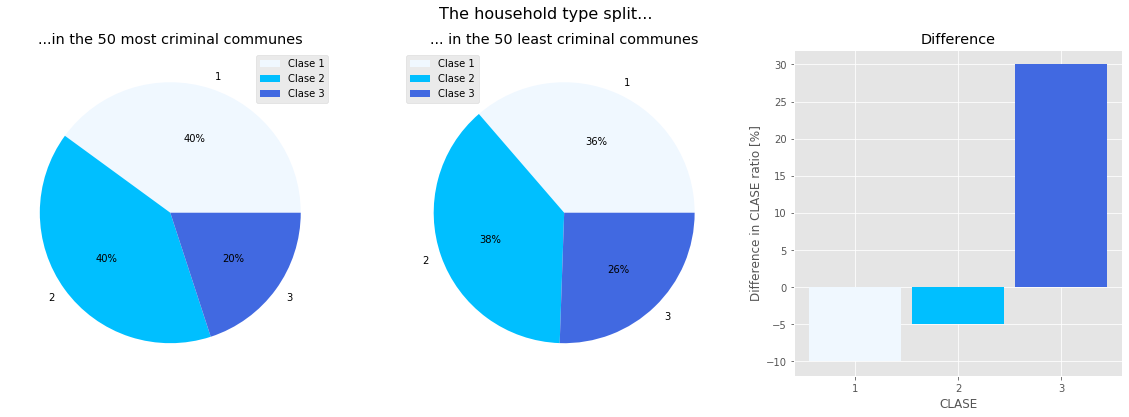

In [65]:
# Link to color names - https://matplotlib.org/examples/color/named_colors.html
fig, axes = plt.subplots(1, 3, figsize=(20,6))
fig.suptitle('The household type split...', fontsize=16)
axes[0].set_title('...in the 50 most criminal communes')
g1.plot.pie(y='comunas_id',ax=axes[0],autopct='%1.0f%%',colors = ['aliceblue', 'deepskyblue','royalblue'])
axes[0].set_ylabel('')
axes[0].legend(['Clase 1','Clase 2','Clase 3'])
axes[1].set_title('... in the 50 least criminal communes')
g2.plot.pie(y='comunas_id',ax=axes[1],autopct='%1.0f%%',colors = ['aliceblue', 'deepskyblue','royalblue'])
axes[1].set_ylabel('')
axes[1].legend(['Clase 1','Clase 2','Clase 3'])

axes[2].bar(np.arange(len(['1','2','3'])), [-10,-5,30], width=0.9, color=('aliceblue', 'deepskyblue','royalblue'))
plt.sca(axes[2])
plt.xticks(np.arange(len(['1','2','3'])), ['1', '2', '3'])
plt.ylabel('Difference in CLASE ratio [%]')
plt.xlabel('CLASE')
plt.title('Difference')
plt.show()

Theres is approximatly 1000 observations in top 50 and bottom 50, hence the sample size is deemed valid for the this test.

The ratio of 'lowest' and 'medium' household types are 10% and 5% less in the least criminal communes compared to the most criminal, respectively. The ratio of the 'top' househould type is 30% higher in the in the least criminal communes compared to the most criminal. The hypthesis in hereby confirmed. With the confirmation of the hypothesis, an even more throughout analysis is worth conducting, hence the exploration continues.

The third step is to check whether the difference in type of household is valid throughout the communes. <br> 
The hypothesis is that there is a correlation between the average household level and the level of criminality in a commune.<br> 
The average househould type is here defined as the mean level e.g. two CLASE 1, one CLASE 2 and one CLASE 3 would yield (1+1+2+3)/4 = 1.75.

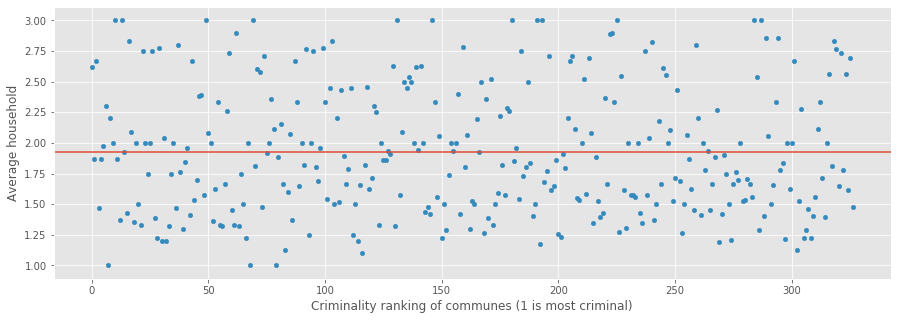

In [66]:
df_c = df_c.astype('int')
mean_type = df_c.groupby('comunas_id')['CLASE','crimes'].mean()
mean_type = mean_type.sort_values('crimes',ascending=False)
mean_type['x'] = np.arange(len(mean_type))
mean_type = mean_type.reset_index()
ax = mean_type.plot(x='x',y='CLASE', kind='scatter')
ax.set_xlabel("Criminality ranking of communes (1 is most criminal)")
ax.set_ylabel("Average household");
ax.axhline(y=mean_type.CLASE.mean());

The blue dots indicate the average household for each commune, ranking from the most criminal commune to the left and the least criminal to the right. The red line indicates the average household level across all commune averages. 

It is clearly evident that the type of household has no correlation with criminal ranking of the commune the household lives. The hypothesis is rejected.

The communes are investigated further to check the acutal relationship between average househould type and actual level of crime. The hypothsesis is that there is no linear relationship between the actual level of crime and the average household type in communes.

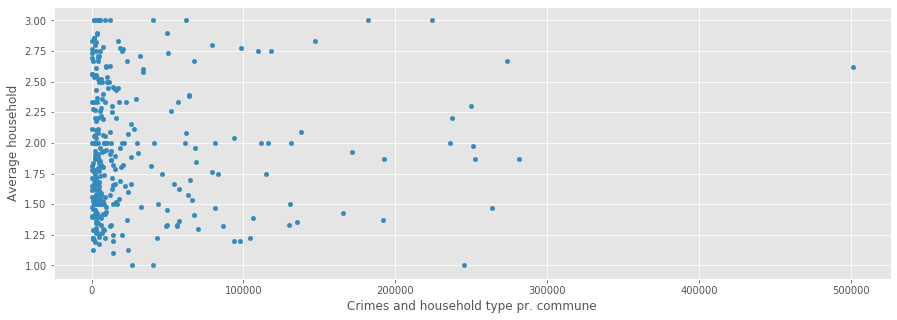

In [67]:
ax = mean_type.plot(x='crimes',y='CLASE', kind='scatter')
ax.set_xlabel("Crimes and household type pr. commune")
ax.set_ylabel("Average household");

There is no linear relationship between the actual level of crime and the average household type in a commune. Hence, the hypothesis is confirmed. Unfortunatly this implies that the crime data is of low value for the real estate agency.

This section has revealed some valuable insights for the real estate company. Apparently, criminal communes does not attract less household of high CLASE.

## d) Geography
This section explores geographical patterns for the real estate market. The main hypothesis is that the type of household is divided geographificaly. If this it the case the household features and area characteristics are explored as well.

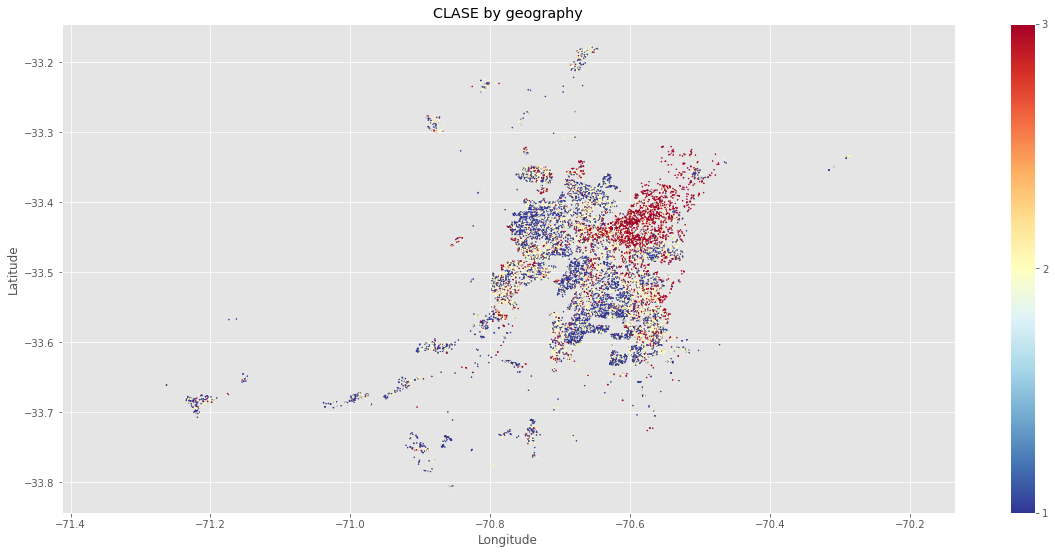

In [133]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, ax = plt.subplots(figsize=(20,9))
cm = plt.cm.get_cmap('RdYlBu_r')
sc = ax.scatter(df.Longitude,df.Latitude, s=1, c=df['CLASE'], cmap=cm)
ax.set_title('CLASE by geography')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('equal')
cbar = fig.colorbar(sc,ax=ax,ticks=[1, 2, 3])
cbar.ax.set_yticklabels([1, 2, 3]);

The map clearly illustrates a significant division of household type by geography, hence the hypothesis is confirmed. Northeast is completely dominated by household type 3. Mid-east is mixed. Southeast is dominated by type 2. Southwest is dominated by type 1. Mid-west far from center is dominated by type 2 whereas Mid-west closer to center is dominated by type 1. Northwest is dominated by type 1 as well. The center is dominated by type 1 and 2. The Far-Southwest is dominated by type 1.

The next hypthesis is that the feature *Sector* matches these North-east-south-west areas.

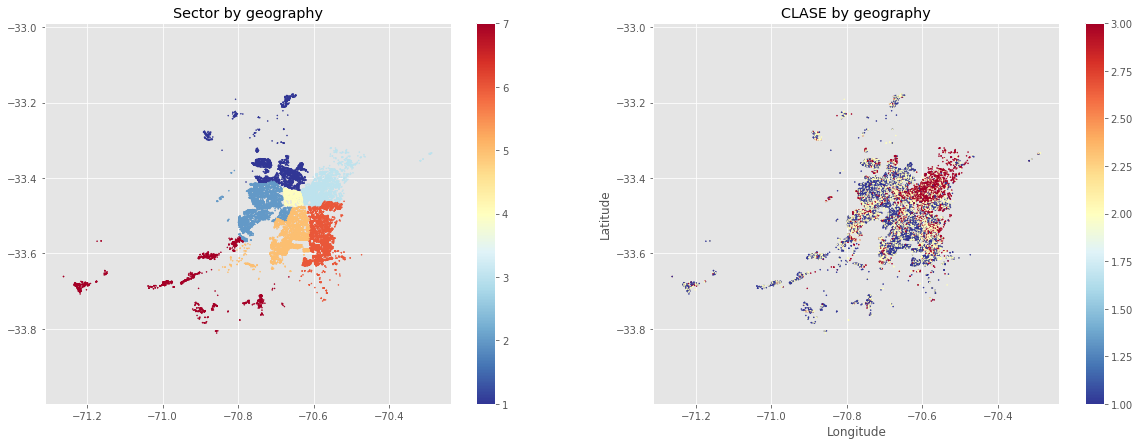

In [134]:
fig, axs = plt.subplots(1, 2,figsize=(20,7))
cm = plt.cm.get_cmap('RdYlBu_r')
i = 0
for att in ['Sector','CLASE']:
    ax = axs[i]
    sc = axs[i].scatter(df.Longitude,df.Latitude, s=1, c=df.loc[:,att], cmap=cm)
    axs[i].set_title('%s by geography' %att)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    axs[i].axis('equal')
    fig.colorbar(sc,ax=ax)
    i+=1

The sectors corresponds well to the description above, only a slight different division. Sector 1 - Northwest, sector 2 - Mid-west, sector 3 - Northeast etc. The sector indexing matches the houshold grouping well, hence sector can be a good predictor.

The household characteristics of the areas dominated by a household type are now explored. The hypothesis is that high income and high rent areas are related to houshold types in the area. 

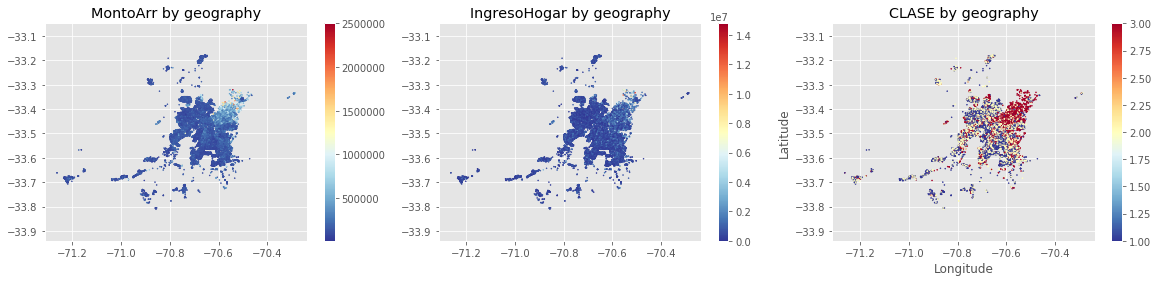

In [135]:
df_temp=df
fig, axs = plt.subplots(1, 3,figsize=(20,4))
cm = plt.cm.get_cmap('RdYlBu_r')
i = 0
for att in ['MontoArr','IngresoHogar','CLASE']:
    ax = axs[i]
    sc = axs[i].scatter(df_temp.Longitude,df_temp.Latitude, s=1, c=df_temp.loc[:,att], cmap=cm)
    axs[i].set_title('%s by geography' %att)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    axs[i].axis('equal')
    fig.colorbar(sc,ax=ax)
    i+=1

There is a clear trend in higher rent (*MontoArr*) and higher income (*IngresoHogar*) in the Northeast (sector 3). Though, with the much higher values here, than rest of the map it is hard to differentiate. To account for this the lowest rents and incomes are temporarily removed.

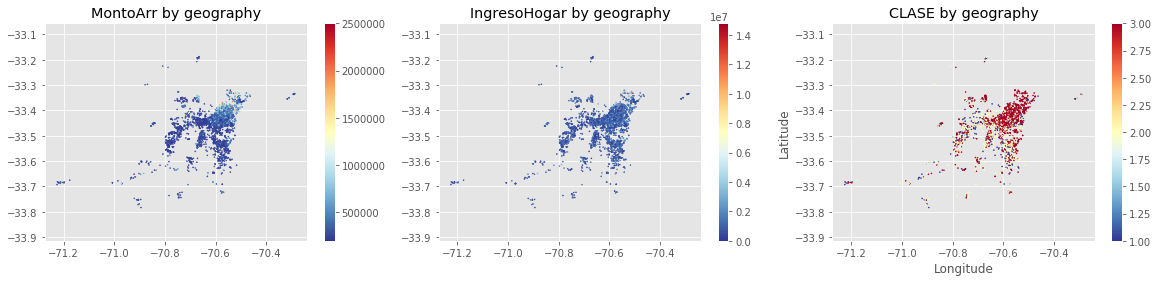

In [136]:
#Lowest values are temporarily removed for better coloring
MontoArr_l = df.MontoArr.quantile(0.75)
Ingresso_l = df.IngresoHogar.quantile(0.75)
df_temp = df[(df.MontoArr > MontoArr_l) & (df.MontoArr > MontoArr_l)]


fig, axs = plt.subplots(1, 3,figsize=(20,4))
cm = plt.cm.get_cmap('RdYlBu_r')
i = 0
for att in ['MontoArr','IngresoHogar','CLASE']:
    ax = axs[i]
    sc = axs[i].scatter(df_temp.Longitude,df_temp.Latitude, s=1, c=df_temp.loc[:,att], cmap=cm)
    axs[i].set_title('%s by geography' %att)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    axs[i].axis('equal')
    fig.colorbar(sc,ax=ax)
    i+=1

When removing the lowest rents and incomes the vast majority of househods are type 3. Hence, it is confirmed that high income and high rent areas are related to houshold types in the area. 

The opposite is tested as well.

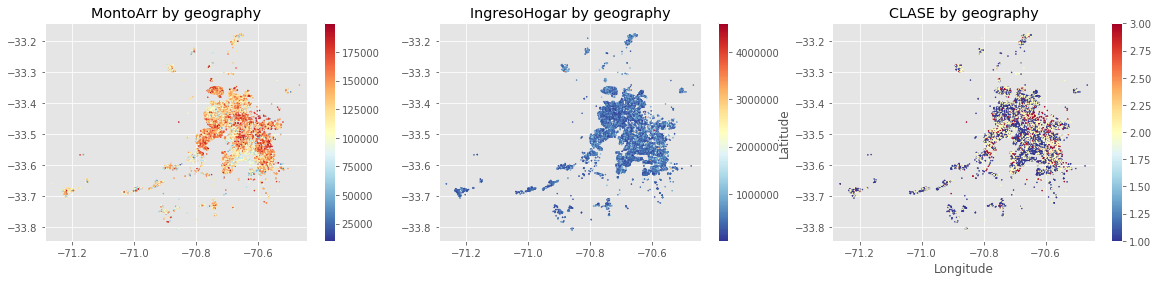

In [137]:
#Highest values are temporarily removed for better coloring
MontoArr_h = df.MontoArr.median()
Ingresso_h = df.IngresoHogar.median()
df_temp = df[(df.MontoArr < MontoArr_l) & (df.MontoArr < MontoArr_l)]


fig, axs = plt.subplots(1, 3,figsize=(20,4))
cm = plt.cm.get_cmap('RdYlBu_r')
i = 0
for att in ['MontoArr','IngresoHogar','CLASE']:
    ax = axs[i]
    sc = axs[i].scatter(df_temp.Longitude,df_temp.Latitude, s=1, c=df_temp.loc[:,att], cmap=cm)
    axs[i].set_title('%s by geography' %att)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    axs[i].axis('equal')
    fig.colorbar(sc,ax=ax)
    i+=1

When removing the highest rents and incomes the vast majority of househods are type 1. Hence, it is confirmed that low income and low rent areas are related to houshold types in the area. 

*IngresoHogar* is a household characteristic and therefor not suited for the prediction. Instead *Ingreso_Promedio_Zona_MM* (Average zonal income (Million Chilean Peso)), can be explaining the income factor as it is clearly correlated with the household type as indicated in the maps below.

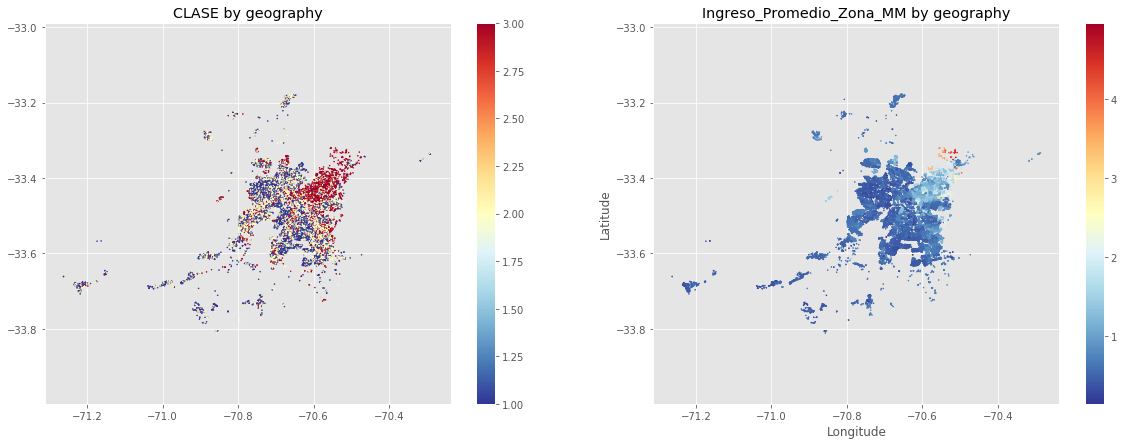

In [138]:
fig, axs = plt.subplots(1, 2,figsize=(20,7))
cm = plt.cm.get_cmap('RdYlBu_r')
i = 0
for att in ['CLASE','Ingreso_Promedio_Zona_MM']:
    ax = axs[i]
    sc = axs[i].scatter(df.Longitude,df.Latitude, s=1, c=df.loc[:,att], cmap=cm)
    axs[i].set_title('%s by geography' %att)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    axs[i].axis('equal')
    fig.colorbar(sc,ax=ax)
    i+=1

The next part of the geographic exploration is to investigate pattern in area charateristics.
The first hypothesis is that areas with high levels of crime are central areas.

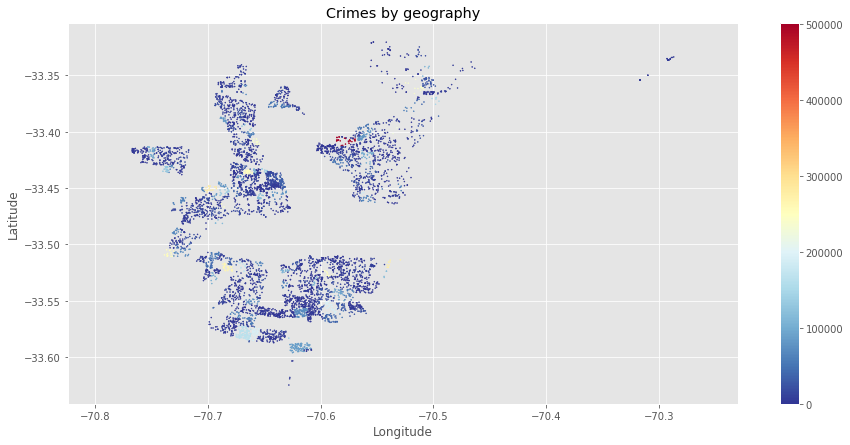

In [139]:
#Removing NaN replaced coomunes:
crim_mean = df.crimes.mean()
df_c = df[(df.crimes < crim_mean-2) | (df.crimes > crim_mean+2)] 

fig, ax = plt.subplots(figsize=(15,7))
cm = plt.cm.get_cmap('RdYlBu_r')
sc = ax.scatter(df_c.Longitude,df_c.Latitude, s=1, c=df_c['crimes'], cmap=cm)
ax.set_title('Crimes by geography')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('equal')
fig.colorbar(sc,ax=ax);

Unfortunaly, there is no crime records for the central communes, hence the hypothesis cannot be confirmed nor rejected. An interesting observation is that some outer communens have much higher level of crime than their neighbouring communes. This could e.g. indicate violence in ghettoes or burglary and car thefts in the wealthy neighbourhoods. As this data is not extensive for a throughout geographical investigation, it is conluded here.

Next step is to explore the geographic relationships of the remaining area characteristics. 

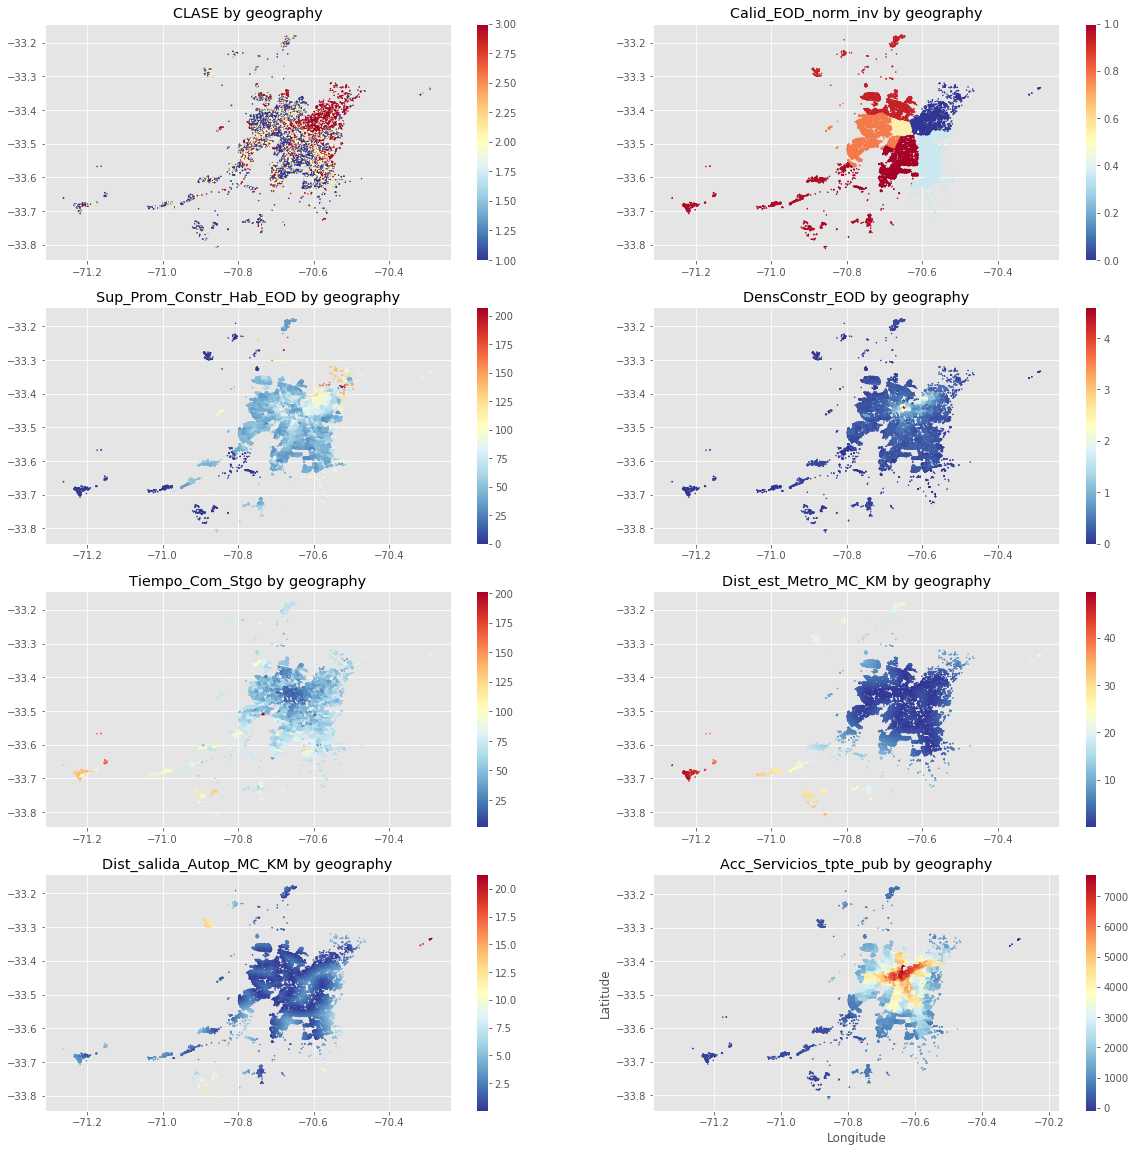

In [140]:
fig, axs = plt.subplots(4, 2,figsize=(20,20))
cm = plt.cm.get_cmap('RdYlBu_r')
i = 0
j = 0

for att in ['CLASE','Calid_EOD_norm_inv', 'Sup_Prom_Constr_Hab_EOD','DensConstr_EOD','Tiempo_Com_Stgo',
       'Dist_est_Metro_MC_KM', 'Dist_salida_Autop_MC_KM', 'Acc_Servicios_tpte_pub']:
    ax = axs[i, j]
    sc = axs[i, j].scatter(df.Longitude,df.Latitude, s=1, c=df.loc[:,att], cmap=cm)
    axs[i, j].set_title('%s by geography' %att)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.axis('equal')
    fig.colorbar(sc,ax=ax)
    if j == 1:
        i+=1
        j=0
    else:
        j+=1

*Calid_EOD_norm_inv* indicates the average construction quality of residential units in the sector, where 0 is highest quality. Areas dominated by household type 3 have highest construction quality. Areas dominated by household type 1 have lowest construction quality.


*Sup_Prom_Constr_Hab_EOD* inidactes average built surface of residential units in zone. And *DensConstr_EOD* indicates building density. The wealthy Northeast area is the area with highest density of residential units, but not the most dense area. This indicates that this area is moslty residential, not commercial or industrial. However, the Northeast part closest to the center has a density above 1 indicating towers and several level buildings. The *DensConstr_EOD* clearly illustrates the center of the city.

*Tiempo_Com_Stgo* illustrates the time to center. Apart from a few areas (e.g. north of center) the time to the center is dependent on the distance. This is well explained by the distance to the metro stations, *Dist_est_Metro_MC_KM*, which is evenly distributed accros most of the city. For the area north of the center the connectivity is signifant faster yielding a short time to center even though it is realtive far away. This is an interesting insight for the real estates agency.

*Dist_salida_Autop_MC_KM*, distance to the highway exit and *Acc_Servicios_tpte_pub*, accesibility to public transport illustrates a star-like pattern with 5 main routes from the center. This can be compared to the 'the finger-plan' of Copenhagen, see picture, which was presented in 1947 to manage accesibility in a growing city. Areas along the 5 'fingers' have high accesibility to public transports, similar to the plot of accesibility to public transport in Chile. The wealthy area in the Northeast have high accesibility to public transport.

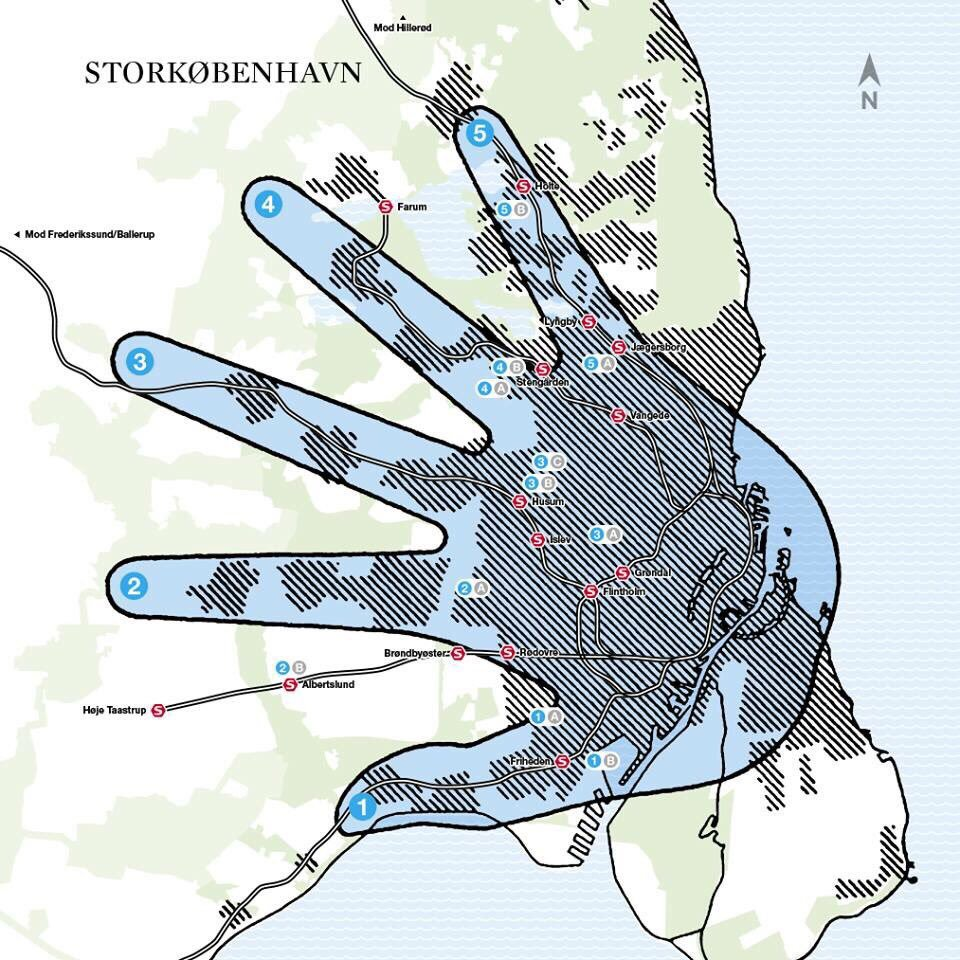

The geographic exploration yields valuable insights for the real estate companies. The wealth charateristics clearly correlates with household types. Hence, *Ingreso_Promedio_Zona_MM* and *MontoArr* are promising area characteristic for the prediction.

*Calid_EOD_norm_inv*, *Sup_Prom_Constr_Hab_EOD*, *DensConstr_EOD* are highly promising area characteristics for the prediction as well.<br>
*Dist_salida_Autop_MC_KM* and *Acc_Servicios_tpte_pub* might be useful as predictors for the city center, but they are not highly correlated with the type of household according to the geographic exploration.<br>
*Dist_est_Metro_MC_KM* and *Tiempo_Com_Stgo* does not seem promising for predictions in city center as these are equal distributed here.

## e) Segmentation

This section attempts to segment the real estate market based on area characterics. Segmenting the market can help the real estate agency to target specific groups.

The previous four sections have revealed several key insights for the real estate agency, based on data as-is. This section will apply clustering methods to detect data patterns based on multiple features at the same time.

The hypthesis is that the real estate market can be clearly divided into clusters based on area characteristics and that each segment will match some CLASEs more than others. Hence the clusters are created and matched with CLASE. 

### Segmenting real estate market - standardised data

Initially the data is prepared for clustering by One-Hot encoding the Sector variables. 

In [141]:
df_e = df
df_e = pd.get_dummies(df, columns = ['Sector'])
print(df_e.shape)
df_e.head(2)

(17870, 22)


MontoArr  IngresoHogar CLASE  Sup_Prom_Constr_Hab_EOD  \
Hogar                                                           
100010    100000        450845     1                     53.8   
100020    120000       1019369     1                     59.6   

        Calid_EOD_norm_inv  DensConstr_EOD  Dist_est_Metro_MC_KM  \
Hogar                                                              
100010                0.98           0.059             23.051711   
100020                0.98           0.033             21.080177   

        Dist_salida_Autop_MC_KM  Tiempo_Com_Stgo  Ingreso_Promedio_Zona_MM  \
Hogar                                                                        
100010                 4.345179               69                  0.519765   
100020                 1.381521               84                  0.678317   

        ...  Longitude  comunas_id        crimes Sector_1  Sector_2  Sector_3  \
Hogar   ...                                                                     
100010  ... -70.779035         786  30562.039642        0         0         0   
100020  ... -70.744340         785  30562.039642        0         0         0   

        Sector_4  Sector_5  Sector_6  Sector_7  
Hogar                                           
100010         0         0         0         1  
100020         0         0         0         1  

[2 rows x 22 columns]

*CLASE*, *Ingresohogar* and geographic features are removed and the data is standardised. 
Initially *comunas_id* was One-hot encode like the *comunas_id*, but led to, very long computational time due to a large number of categories. Hence it is removed here too. 

In [142]:
from sklearn.preprocessing import StandardScaler
X_e = df_e.drop(['CLASE','IngresoHogar','comunas_id','Longitude','Latitude'],1)
X_e_std = StandardScaler().fit_transform(X_e)

The data is clustered using K-means from sklearn, which clusters data by minimizing the sum of squared distances of observations to K cluster centers.

The approach is inspired by - https://blog.cambridgespark.com/how-to-determine-the-optimal-number-of-clusters-for-k-means-clustering-14f27070048f

In [143]:
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km_std = KMeans(n_clusters=k,random_state=42)
    km_std = km_std.fit(X_e_std)
    Sum_of_squared_distances.append(km_std.inertia_)

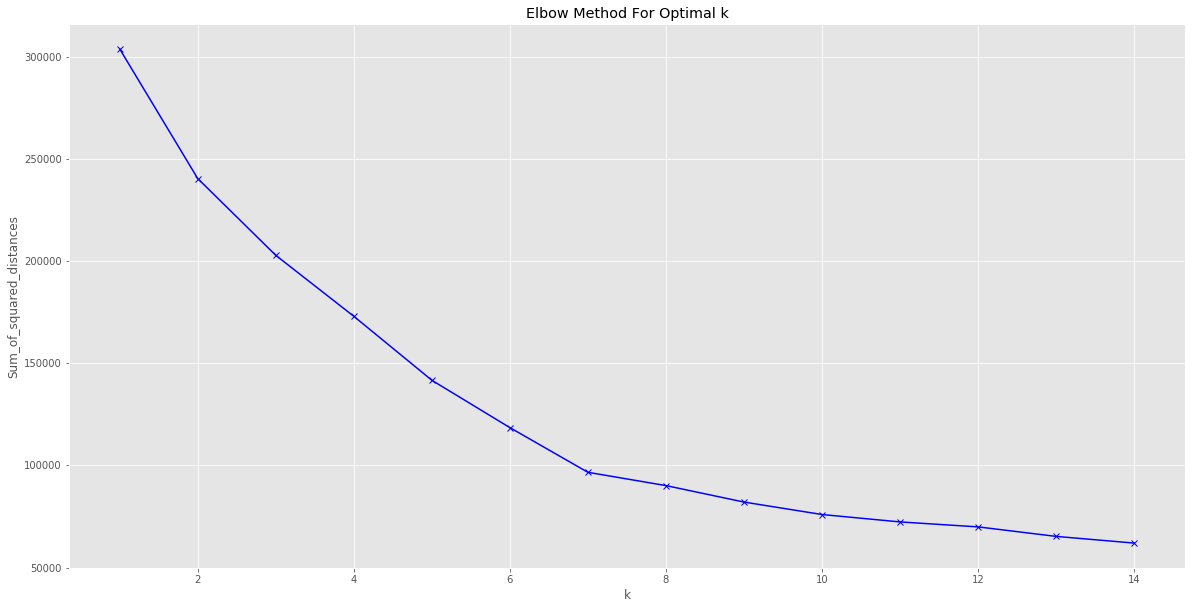

In [144]:
plt.figure(figsize=(20,10))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

By applying the elbow method to select the number of clusters, k=7 clusters is selected, as each of the first 7 clusters reduces the sum of squared distances significantly compared to introducing more clusters.

k=3 clusters would be great for matching with the 3 CLASEs. However for now k=7 seems to be a better option. 

The model is fitted on the standardised data:

In [145]:
k=7
km_std=KMeans(k,random_state=42)
km_std.fit(X_e_std)
df['cluster_std']=km_std.fit_predict(X_e_std)

The cluster sizes are illustrated below.

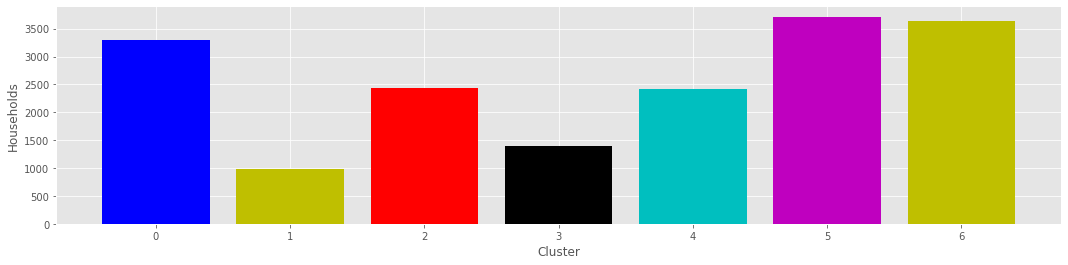

In [146]:
colors = ['b', 'y', 'r','k','c','m','y'] #, 'k', 'w'
plt.figure(figsize=(18,4))
plt.bar(np.arange(k), df.groupby(['cluster_std']).count()['CLASE'].values,color=colors)
plt.xlabel('Cluster')
plt.ylabel('Households')
plt.show()

Below the clusters are linked to their geography.

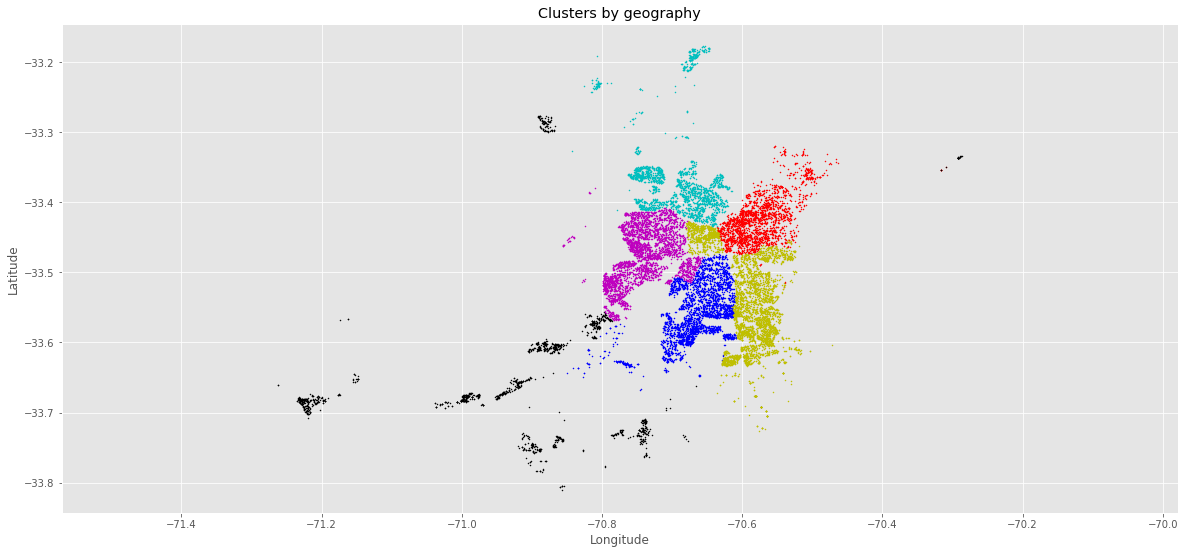

In [147]:
fig, ax = plt.subplots(figsize=(20,9))
for cluster in range(k):
    ax.scatter(df[df.cluster_std==cluster].Longitude,df[df.cluster_std==cluster].Latitude, s=1, c=colors[cluster]);
ax.set_title('Clusters by geography')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('equal');

The clusters are well divided geographically excatly equal to the sectors. The sectors are removed and the clustering is done all over.

In [148]:
df_e = df
X_e = df_e.drop(['CLASE','IngresoHogar','comunas_id','Longitude','Latitude','Sector'],1)
X_e_std = StandardScaler().fit_transform(X_e)

In [149]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km_std = KMeans(n_clusters=k,random_state=42)
    km_std = km_std.fit(X_e_std)
    Sum_of_squared_distances.append(km_std.inertia_)

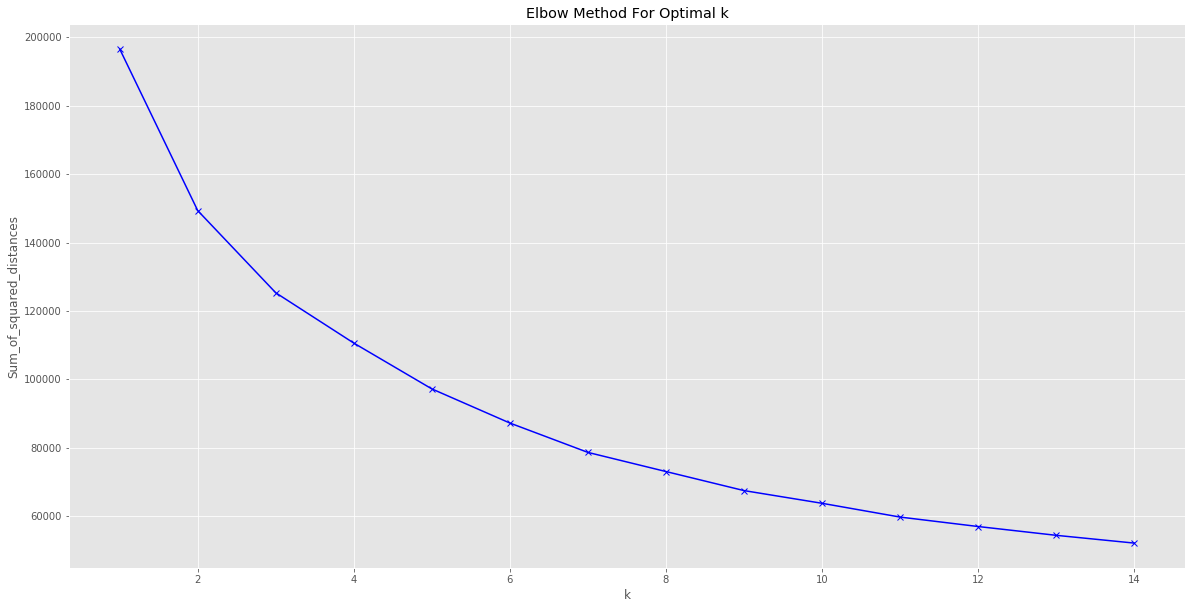

In [150]:
plt.figure(figsize=(20,10))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

This time there is no sharp angles, hence the elbow method is not obvious. Applying the elbow method again, k = 7 is selected. k = 2 or 3 would also make sense. After trying each, the k=7 is selected as it seems to have relevance for explaining real estate segmentation patterns.

In [151]:
k=7
km_std=KMeans(k,random_state=42)
km_std.fit(X_e_std)
df['cluster_std']=km_std.fit_predict(X_e_std)

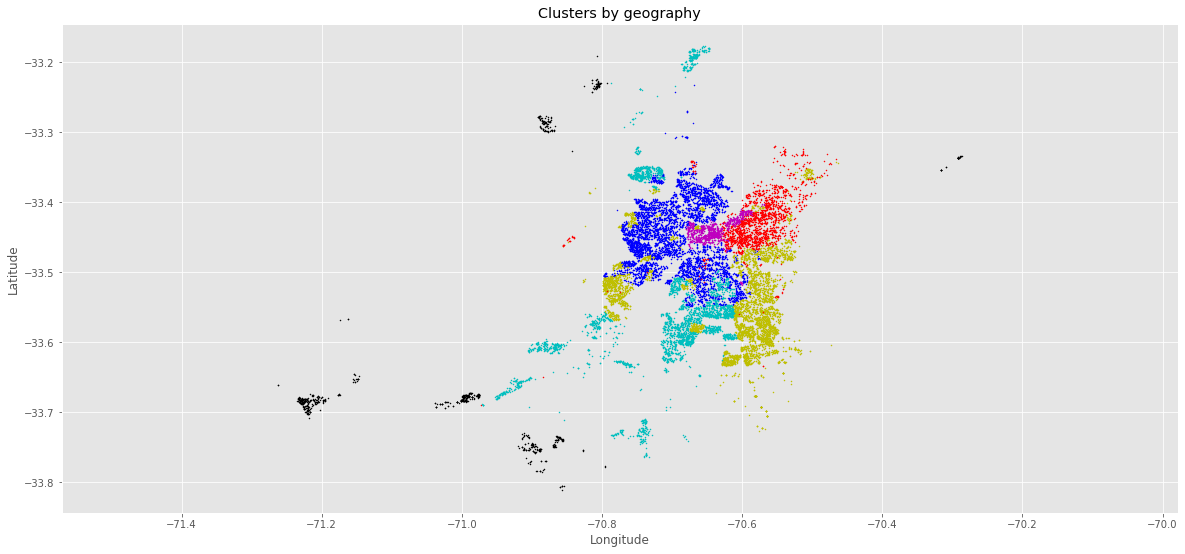

In [152]:
fig, ax = plt.subplots(figsize=(20,9))
for cluster in range(k):
    ax.scatter(df[df.cluster_std==cluster].Longitude,df[df.cluster_std==cluster].Latitude, s=1, c=colors[cluster]);
ax.set_title('Clusters by geography')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('equal');

The clusters are geographiccaly very well divided.

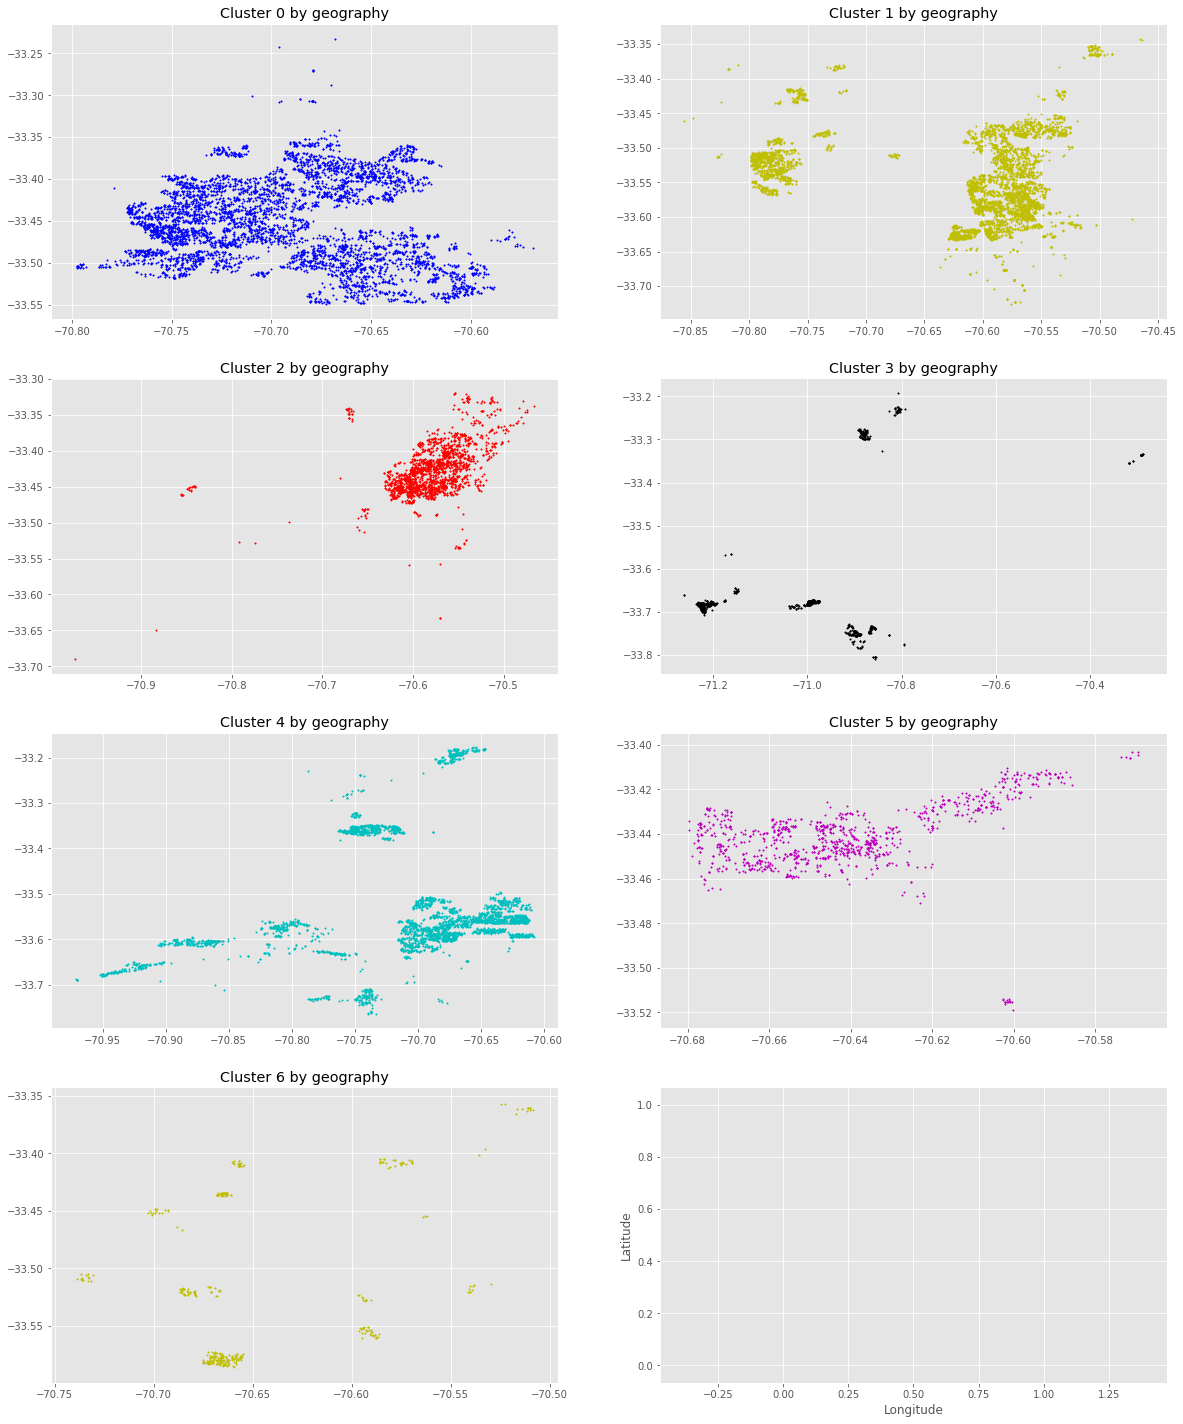

In [153]:
fig, axs = plt.subplots(4, 2,figsize=(20,25))

i = 0
j = 0

for cluster in range(k):
    axs[i, j].scatter(df[df.cluster_std==cluster].Longitude,df[df.cluster_std==cluster].Latitude, s=2, c=colors[cluster]);
    axs[i, j].set_title('Cluster %i by geography' %cluster)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.axis('equal')
    if j == 1:
        i+=1
        j=0
    else:
        j+=1

Geographiccaly the clusters are very well divided. E.g. one cluster is predominantly located in Northeast Santiago, another cluster is predominantly the Mid- and Northwest suburbs as well as Mid- and SouthEast suburbs. Some clusters are predominantly covering rural districts. Below it is investigated which other characteristics are describing the clusters.

In [154]:
clust_clase_std = np.zeros((3,k))
for i in range(3):
    for j in range(k):
        clust_clase_std[i,j] = len(df[(df.CLASE==i+1) & (df.cluster_std==j)])
clust_clase_std = clust_clase_std.T

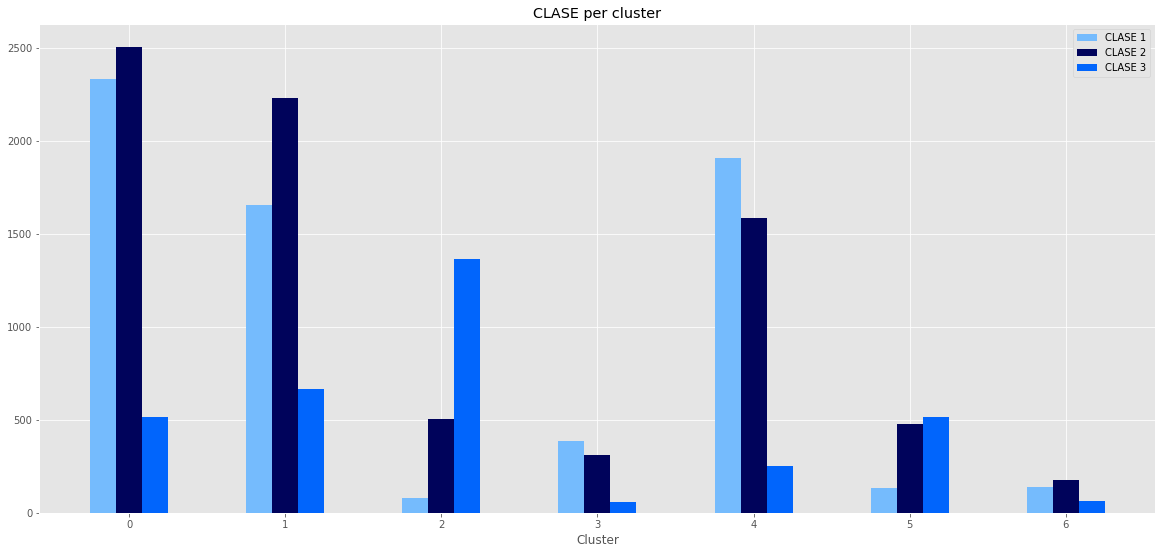

In [155]:
x_std = np.arange(clust_clase_std.shape[0])
dx_std = (np.arange(clust_clase_std.shape[1])-clust_clase_std.shape[1]/3.)/(clust_clase_std.shape[1]+3.)
d_std = 1./(clust_clase_std.shape[1]+3.)

fig, ax = plt.subplots(figsize=(20,9))
for i in range(clust_clase_std.shape[1]):
    ax.bar(x_std+dx_std[i],clust_clase_std[:,i], width=d_std, color= ['xkcd:sky blue','xkcd:dark blue','xkcd:bright blue'][i], label="{}".format(['CLASE 1','CLASE 2','CLASE 3'][i]))
plt.title('CLASE per cluster')
plt.xlabel('Cluster')
plt.legend(framealpha=1)
plt.show()

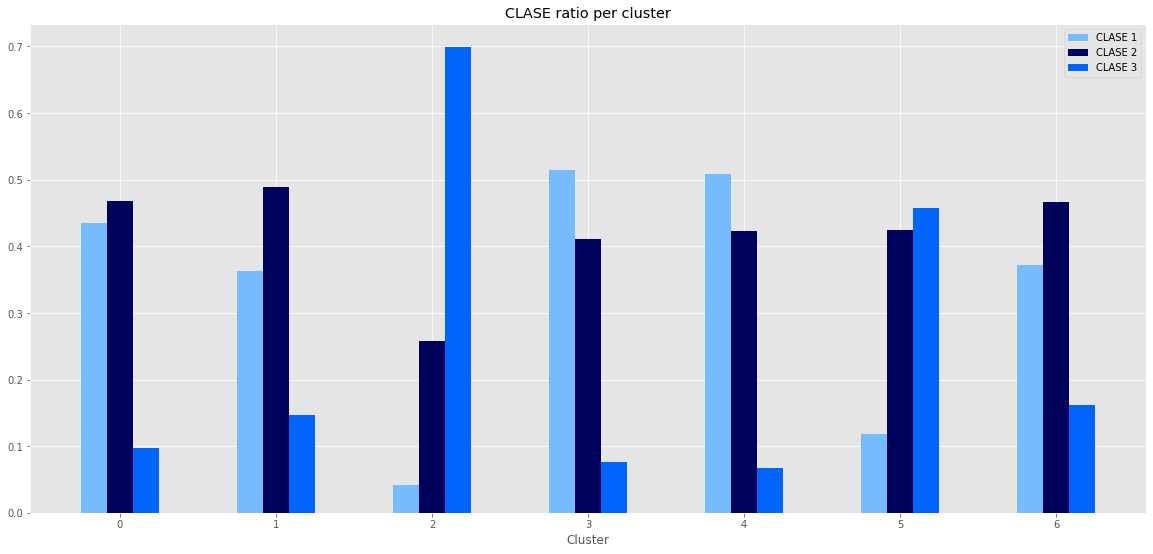

In [156]:
clust_clase_std_r = clust_clase_std/clust_clase_std.sum(axis=1)[:,None]
fig, ax = plt.subplots(figsize=(20,9))
for i in range(clust_clase_std.shape[1]):
    ax.bar(x_std+dx_std[i],clust_clase_std_r[:,i], width=d_std, color= ['xkcd:sky blue','xkcd:dark blue','xkcd:bright blue'][i], label="{}".format(['CLASE 1','CLASE 2','CLASE 3'][i]))
plt.title('CLASE ratio per cluster')
plt.xlabel('Cluster')
plt.legend(framealpha=1)
plt.show()

The two clusters dominated by CLASE 1 followed up by CLASE 2 are very similar in terms of household types. The three clusters dominated by CLASE 2 followed up by CLASE 1 are very similar in terms of household types too. One cluster is dominated bt CLASE 2 followed up by CLASE 1. Lastly a single clusters is dominated by CLASE 1.


The hypthesis was that the real estate market can be clearly divided into clusters based on area characteristics and that each segment will match one CLASE more than the others is partially confirmed. The clusters are not completely clean, but there are clearly higher ratios of some clases in some clusters than others.

The clusters are now checked for other features to reveal some of these insights. The hypothesis is that each cluster can be described by features of wealth and area characteristics.

Initially wealth features:

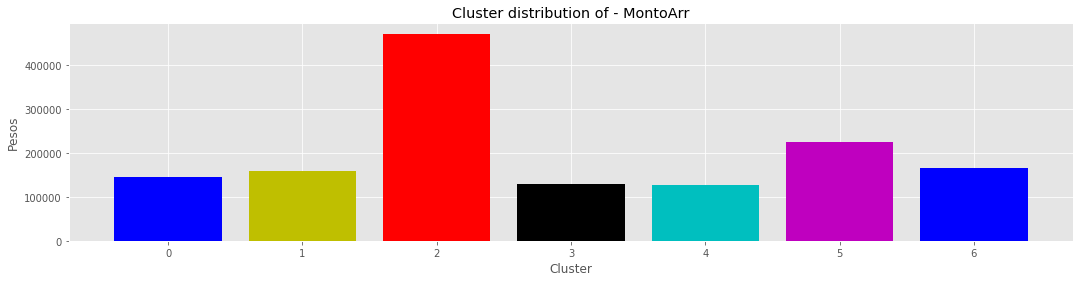

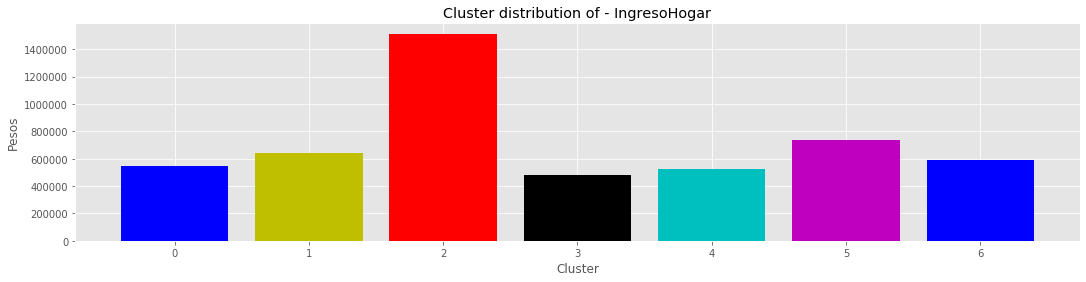

In [157]:
colors = ['b', 'y', 'r','k','c','m'] #, 'k', 'w'

for att in ['MontoArr', 'IngresoHogar']:
    plt.figure(figsize=(18,4))
    plt.bar(np.arange(k), df.groupby(['cluster_std']).mean()[att].values,color=colors)
    plt.title('Cluster distribution of - %s' %att)
    plt.xlabel('Cluster')
    plt.ylabel('Pesos')
    plt.show()

The clusters divide income and rent well. E.g. one cluster represents high income and high rent. The relative income and rent is even for all clusters.

The area characterics are checked below.

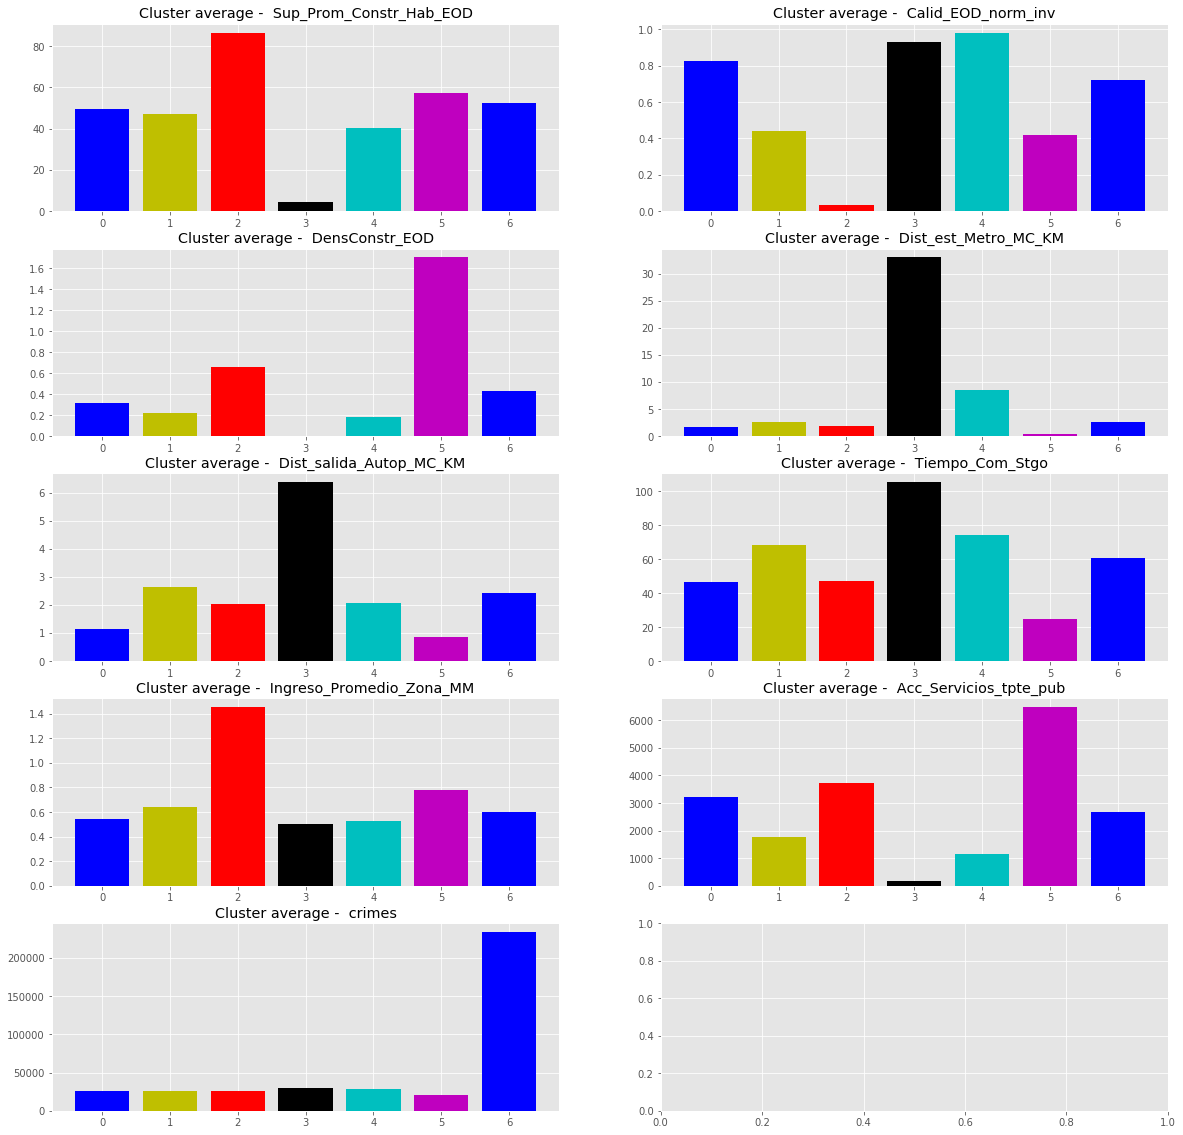

In [158]:
fig, axs = plt.subplots(5, 2,figsize=(20,20))
i = 0
j = 0
for att in ['Sup_Prom_Constr_Hab_EOD', 'Calid_EOD_norm_inv', 'DensConstr_EOD',
       'Dist_est_Metro_MC_KM', 'Dist_salida_Autop_MC_KM', 'Tiempo_Com_Stgo','Ingreso_Promedio_Zona_MM', 
            'Acc_Servicios_tpte_pub','crimes']:
    axs[i,j].bar(np.arange(k), df.groupby(['cluster_std']).mean()[att].values,color=colors)
    axs[i,j].set_title('Cluster average -  %s' %att)
    if j == 1:
        i+=1
        j=0
    else:
        j+=1

The clustering reveals patterns very similar to what the patterns for the majority CLASE. The clusters can be described according to their features values, and the real estate agency can use this to find real estate that matches a household knowing its income, rent, prefered distance to metro etc.

E.g. one cluster is mixed of all clases and has mid-low rent, mid-low income, half industrial/commercial area half resdiential area, low construction quality, high density, medium distance to metro, low distance to highway and low average income in the neighbourhood.

The hypothesis was that each cluster can be described by features of wealth and area characteristics and is confirmed. If a real estate agent gets a real estate with the area characteristics matching one of the clusters, he can send an advertisement to households matching this cluster. This way of targeting will improve the efforts of the real estate agents.

### Segmenting real estate market - PCA transformed data

Here it is checked whether using principal components for clustering will  yield a more clear distinction of househould type by clusters than the previous section. The data is initially PCA transformed.

PC-0 explains: 0.94337 of the variance
PC-1 explains: 0.99988 of the variance
PC-2 explains: 1.00000 of the variance
PC-3 explains: 1.00000 of the variance


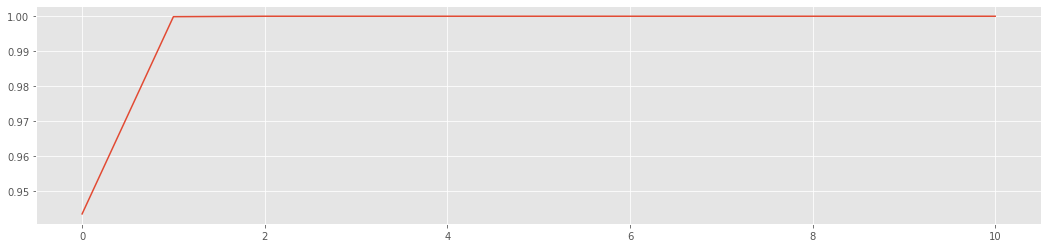

In [159]:
from sklearn import decomposition
pca=decomposition.PCA()
pca.fit(X_e)
expl=pca.explained_variance_ratio_
cdf=[sum(expl[:i+1]) for i in range(len(expl))]
plt.figure(figsize=(18,4))
plt.plot(range(len(expl)), cdf);
for i in range(4):
    print('PC-%i explains: %.5f of the variance' % (i, cdf[i]))

The first principal component explains 96.5% of the variance and together with the second PC they explain 99.7% of the variance. The PCs are used for clustering with only 2 dimensions, the clustering can now be illustated.

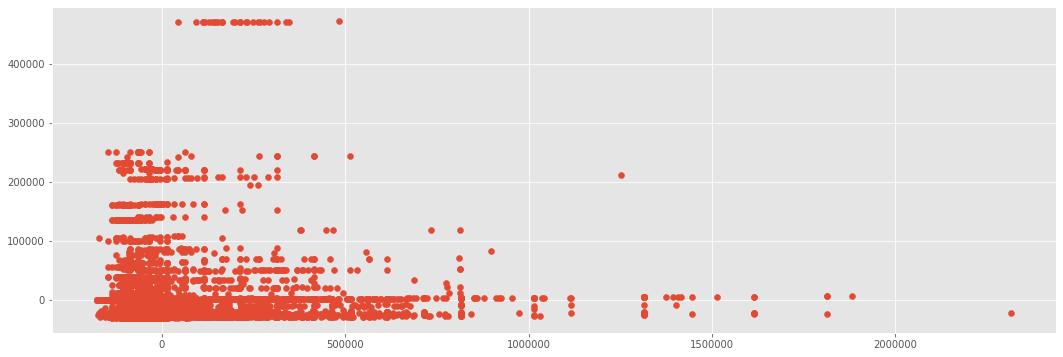

In [160]:
X_pca=pca.transform(X_e)
plt.figure(figsize=(18,6))
plt.scatter(X_pca[:, 0],X_pca[:,1]);

The scatter doesn't reveal any obvioues clusters apart from the far right low density area.
The transformed data is clustered using KMeans as before.

In [161]:
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km_pca = KMeans(n_clusters=k,random_state=42)
    km_pac = km_pca.fit(X_pca[:,0:2])
    Sum_of_squared_distances.append(km_pca.inertia_)

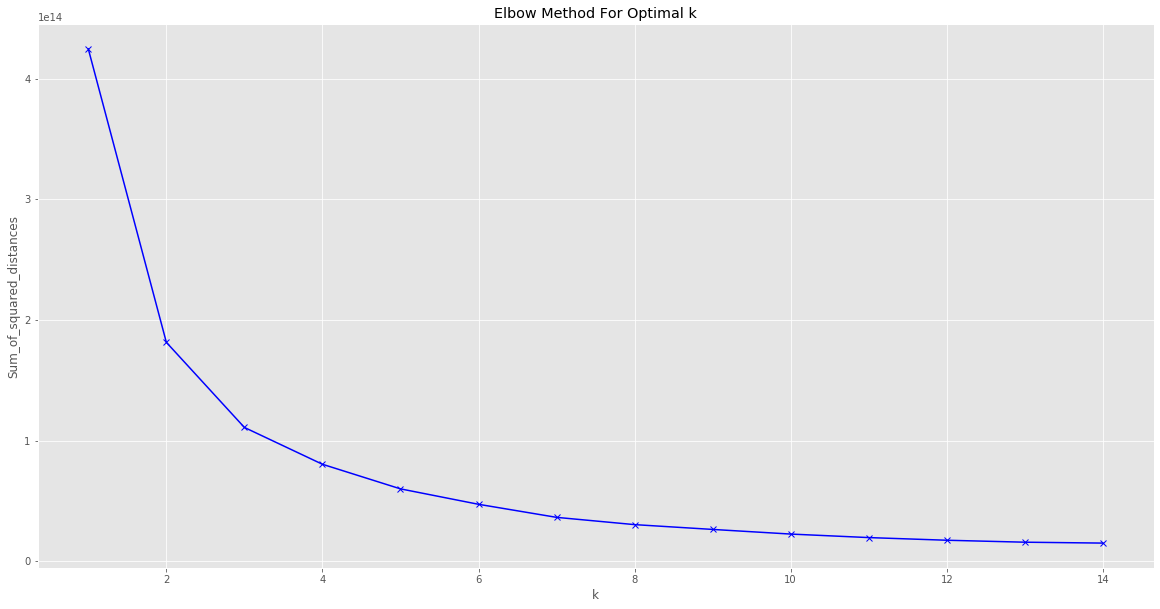

In [162]:
plt.figure(figsize=(20,10))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

By applying the elbow method to select the number of clusters, k=3 clusters is selected., though k=2 or 4 are also promising options.

In [163]:
k=3
km_pca=KMeans(k,random_state=42)
km_pca.fit(X_pca)
df['cluster_pca']=km_pca.fit_predict(X_pca)
df['X_PC1'] = X_pca[:,0]
df['X_PC2'] = X_pca[:,1]

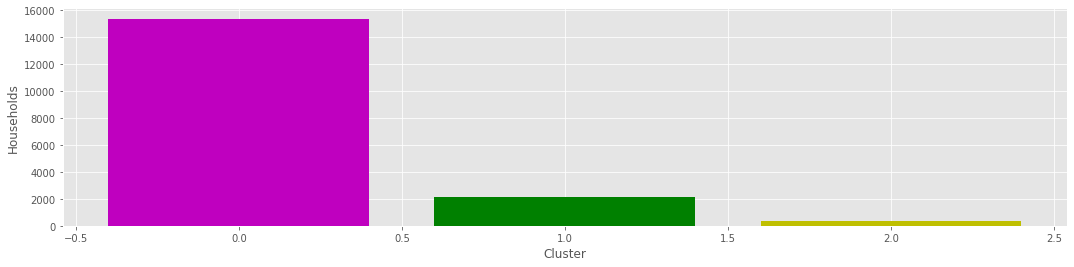

In [164]:
colors = ['m', 'g', 'y'] #,'k','c','m','y'] #, 'k', 'w'
plt.figure(figsize=(18,4))
plt.bar(np.arange(k), df.groupby(['cluster_pca']).count()['CLASE'].values,color=colors)
plt.xlabel('Cluster')
plt.ylabel('Households')
plt.show()

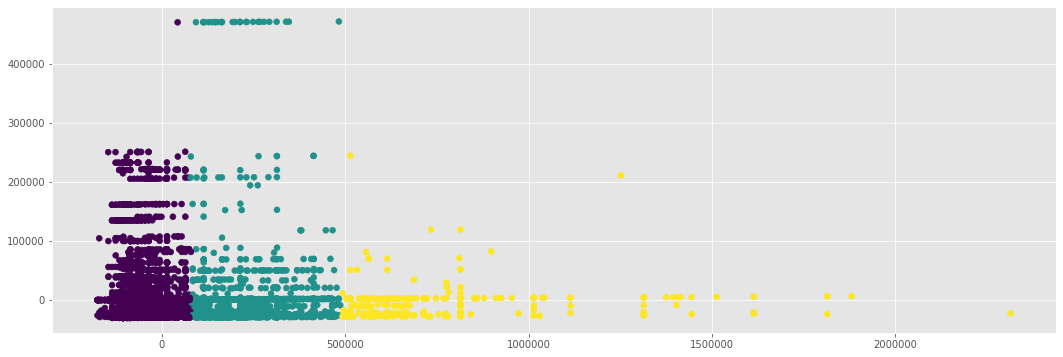

In [165]:
plt.figure(figsize=(18,6))
plt.scatter(df.X_PC1,df.X_PC2,c=df.cluster_pca);

The 3 clusters are highly imbalanced. The scatter indicates some fair patterns to differentitate.

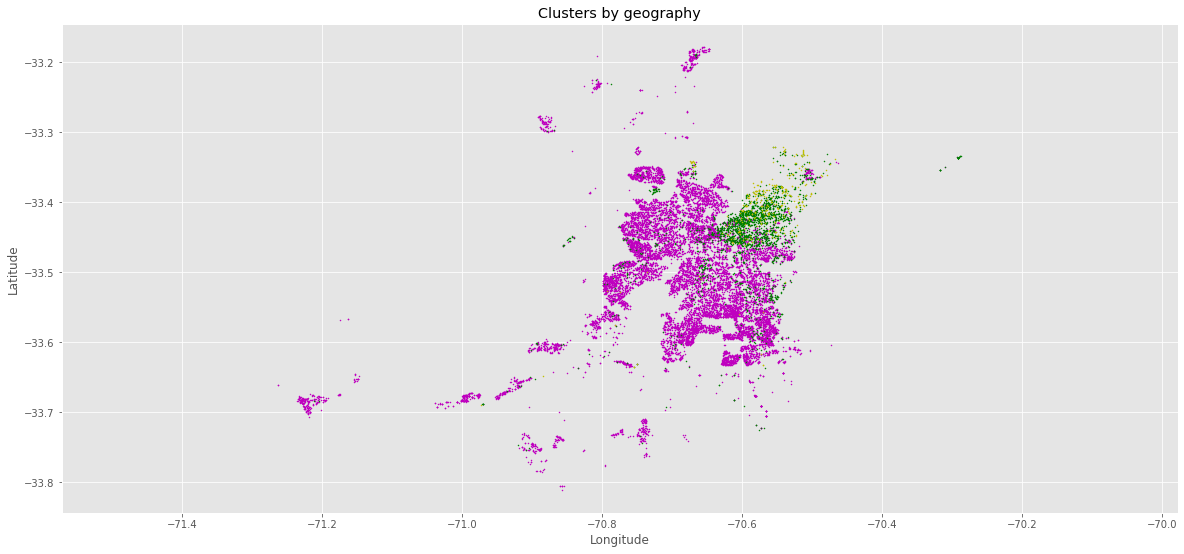

In [166]:
fig, ax = plt.subplots(figsize=(20,9))
for cluster in range(k):
    ax.scatter(df[df.cluster_pca==cluster].Longitude,df[df.cluster_pca==cluster].Latitude, s=1, c=colors[cluster]);
ax.set_title('Clusters by geography')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('equal');

The geogography is again clearly divided by the clusters.

In [167]:
clust_clase_pca = np.zeros((3,k))
for i in range(3):
    for j in range(k):
        clust_clase_pca[i,j] = len(df[(df.CLASE==i+1) & (df.cluster_pca==j)])
clust_clase_pca = clust_clase_pca.T
clust_clase_pca_r = clust_clase_pca/clust_clase_pca.sum(axis=1)[:,None]

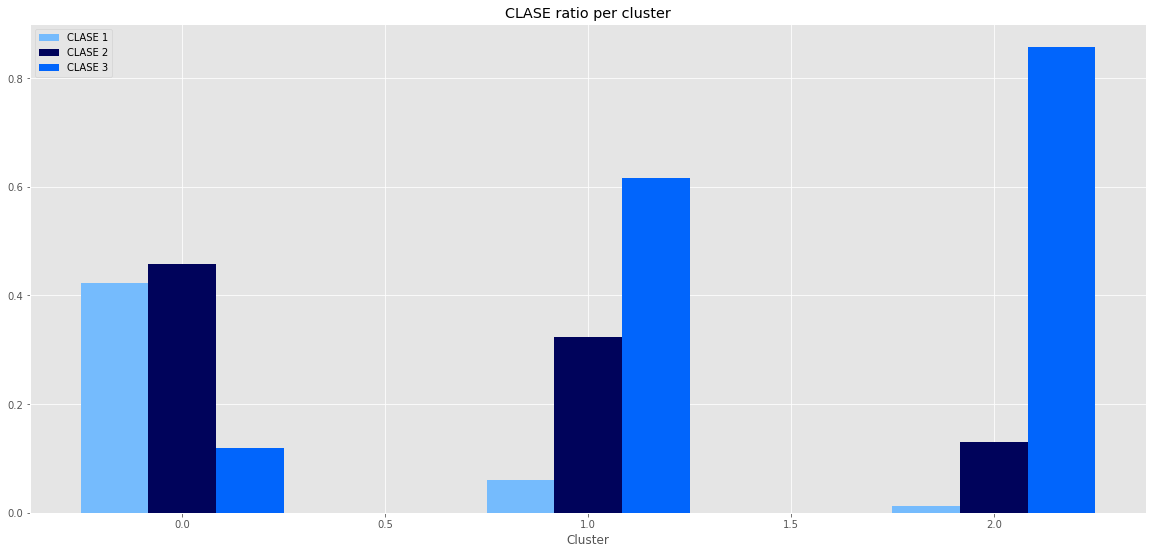

In [168]:
x_pca = np.arange(clust_clase_pca.shape[0])
dx_pca = (np.arange(clust_clase_pca.shape[1])-clust_clase_pca.shape[1]/3.)/(clust_clase_pca.shape[1]+3.)
d_pca = 1./(clust_clase_pca.shape[1]+3.)

fig, ax = plt.subplots(figsize=(20,9))
for i in range(clust_clase_pca.shape[1]):
    ax.bar(x_pca+dx_pca[i],clust_clase_pca_r[:,i], width=d_pca, color= ['xkcd:sky blue','xkcd:dark blue','xkcd:bright blue'][i], label="{}".format(['CLASE 1','CLASE 2','CLASE 3'][i]))
plt.title('CLASE ratio per cluster')
plt.xlabel('Cluster')
plt.legend(framealpha=1)
plt.show()

This clustering can been interpreted as one cluster being the upper class, one clsuter being the upper middle class and one cluster the lower middle class. 

The two clustering approaces reveal valuable insights for the real estate agency. Neither is perfectly dividing the CLASE categories, but each clustering appraoch segments the market in categories driven by different level of area characteristics and household charateristics. 

The hypothesis was that this PCA approach would yield better distinction in cluster with regards to CLASE, this is confirmed.

### Segmenting real estate market - standardised and PCA transformed data

Lastly the data is standardised and PCA transformed before clustering, to see what impact this will have on the business value for the real estate company. The hypothesis is that clustering on the standardised and PCA transformed data will lead to higher purity of clusters with regards to CLASE.

PC-0 explains: 0.35917 of the variance
PC-1 explains: 0.53608 of the variance
PC-2 explains: 0.64900 of the variance
PC-3 explains: 0.74031 of the variance
PC-4 explains: 0.81141 of the variance
PC-5 explains: 0.86808 of the variance
PC-6 explains: 0.90272 of the variance
PC-7 explains: 0.93553 of the variance
PC-8 explains: 0.96225 of the variance
PC-9 explains: 0.98239 of the variance
PC-10 explains: 1.00000 of the variance


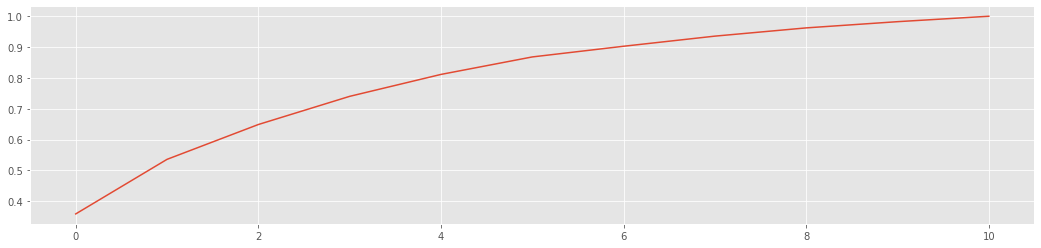

In [169]:
pcastd=decomposition.PCA()
pcastd.fit(X_e_std)
expl=pcastd.explained_variance_ratio_
cdf=[sum(expl[:i+1]) for i in range(len(expl))]
plt.figure(figsize=(18,4))
plt.plot(range(len(expl)), cdf);
for i in range(11):
    print('PC-%i explains: %.5f of the variance' % (i, cdf[i]))

PC-0 to PC-6 is explaining 90% of the variance, hence these are applied. To illustrate the three first PCs are used for a 3D plot below.

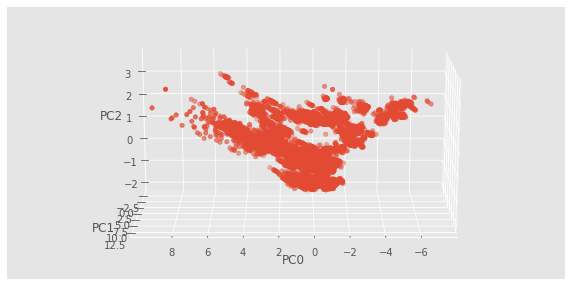

In [170]:
from mpl_toolkits.mplot3d import Axes3D
X_pcastd=pcastd.transform(X_e_std)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_pcastd[:, 0],X_pcastd[:,1],X_pcastd[:,2]);
ax.set_xlabel('PC0')
ax.set_ylabel('PC1')
ax.set_zlabel('PC2')
ax.view_init(15, 90)

plt.show()

In [171]:
Sum_of_squared_distances_pcastd = []
K = range(1,15)
for k in K:
    km_pcastd = KMeans(n_clusters=k)
    km_pcastd = km_pcastd.fit(X_pcastd[:,0:7]) #PC-0 to PC-6
    Sum_of_squared_distances_pcastd.append(km_pcastd.inertia_)

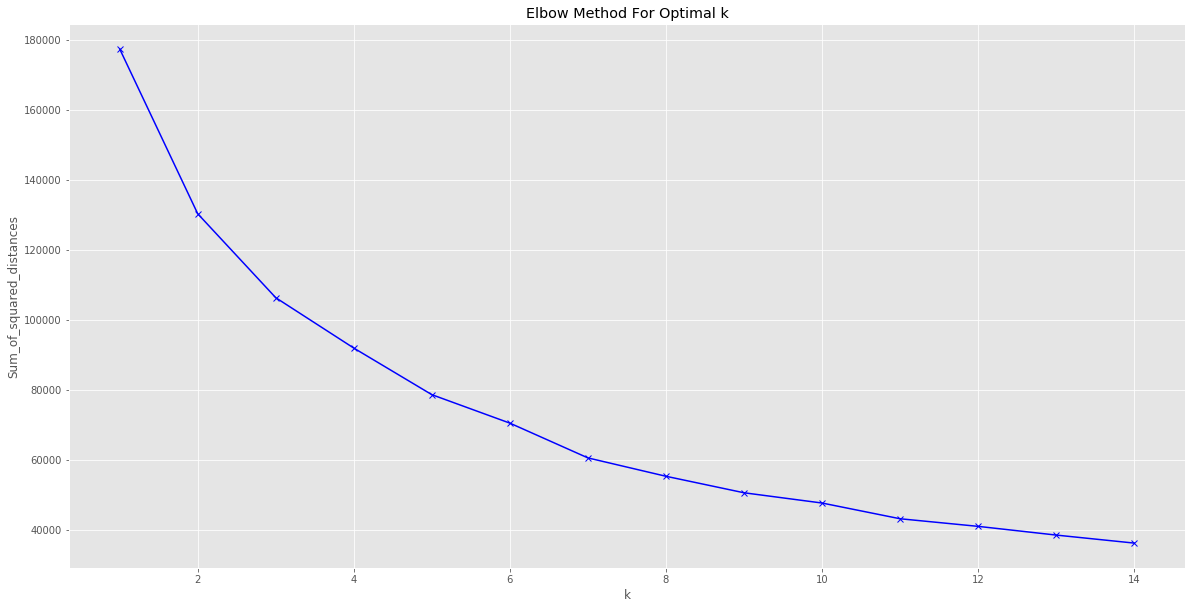

In [172]:
plt.figure(figsize=(20,10))
plt.plot(K, Sum_of_squared_distances_pcastd, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

There is no clear elbow to select the optimal k, but after k=3 the curve flattens somewhat hence k=3 is selected.

In [173]:
k=3
km_pcastd=KMeans(k,random_state=42)
km_pcastd.fit(X_pcastd)
df['cluster_pcastd']=km_pcastd.fit_predict(X_pcastd)

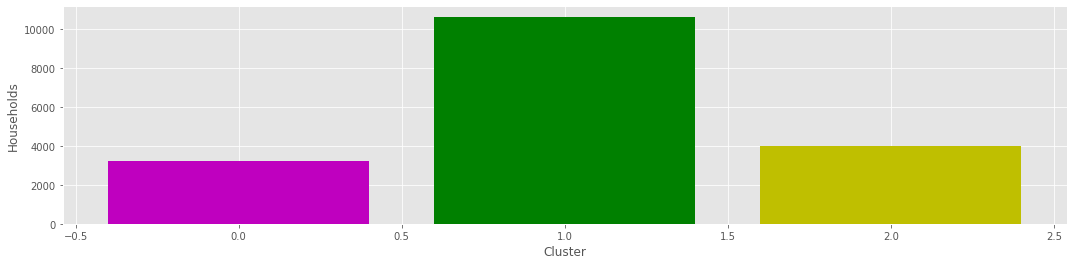

In [174]:
plt.figure(figsize=(18,4))
plt.bar(np.arange(k), df.groupby(['cluster_pcastd']).count()['CLASE'].values,color=colors)
plt.xlabel('Cluster')
plt.ylabel('Households')
plt.show()

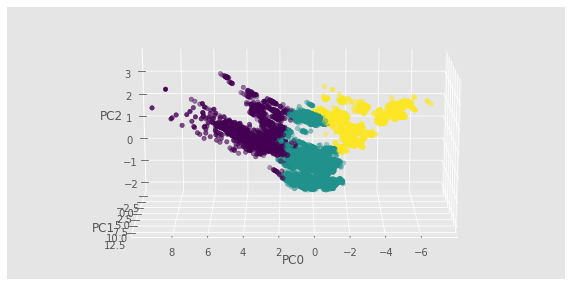

In [175]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_pcastd[:, 0],X_pcastd[:,1],X_pcastd[:,2],c=df.cluster_pcastd);
ax.set_xlabel('PC0')
ax.set_ylabel('PC1')
ax.set_zlabel('PC2')
ax.view_init(15, 90)
plt.show()

The clusters seem to be well seperated by the first three PCs. The geographic link is illustrated below:

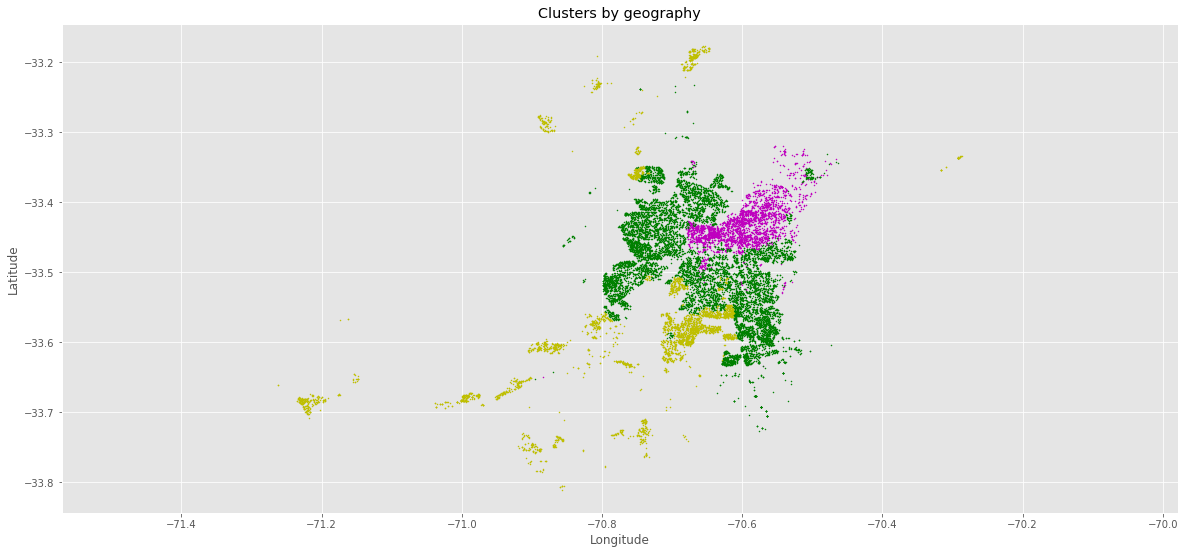

In [176]:
fig, ax = plt.subplots(figsize=(20,9))
for cluster in range(k):
    ax.scatter(df[df.cluster_pcastd==cluster].Longitude,df[df.cluster_pcastd==cluster].Latitude, s=1, c=colors[cluster]);
ax.set_title('Clusters by geography')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('equal');

Geographically the clusters are very will divided ass well. Lastly the clusters are mathced to CLASE.

In [177]:
clust_clase_pcastd = np.zeros((3,k))
for i in range(3):
    for j in range(k):
        clust_clase_pcastd[i,j] = len(df[(df.CLASE==i+1) & (df.cluster_pcastd==j)])
clust_clase_pcastd = clust_clase_pcastd.T
clust_clase_pcastd_r = clust_clase_pcastd/clust_clase_pcastd.sum(axis=1)[:,None]

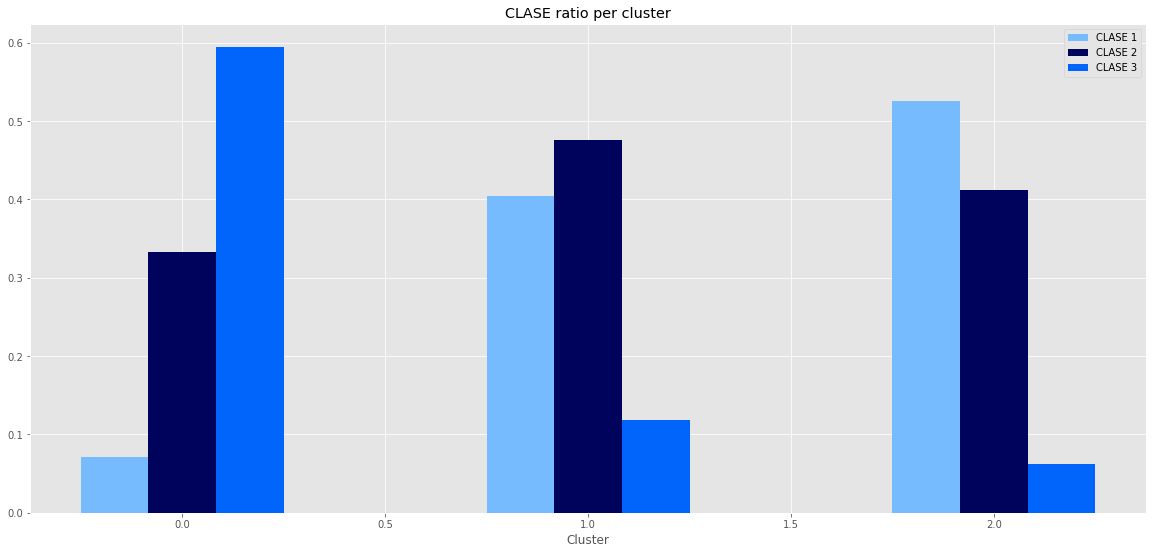

In [178]:
x_pcastd = np.arange(clust_clase_pcastd.shape[0])
dx_pcastd = (np.arange(clust_clase_pcastd.shape[1])-clust_clase_pcastd.shape[1]/3.)/(clust_clase_pcastd.shape[1]+3.)
d_pcastd = 1./(clust_clase_pcastd.shape[1]+3.)

fig, ax = plt.subplots(figsize=(20,9))
for i in range(clust_clase_pcastd.shape[1]):
    ax.bar(x_pcastd+dx_pcastd[i],clust_clase_pcastd_r[:,i], width=d_pcastd, color= ['xkcd:sky blue','xkcd:dark blue','xkcd:bright blue'][i], label="{}".format(['CLASE 1','CLASE 2','CLASE 3'][i]))
plt.title('CLASE ratio per cluster')
plt.xlabel('Cluster')
plt.legend(framealpha=1)
plt.show()

The combination of standardisation and PCA tranformation yields clusters that divides household types well too. In order to confirm the hypthosesis of this clustering being better, the last part of this analysis will compare the three methods on purity with regards to CLASE. 

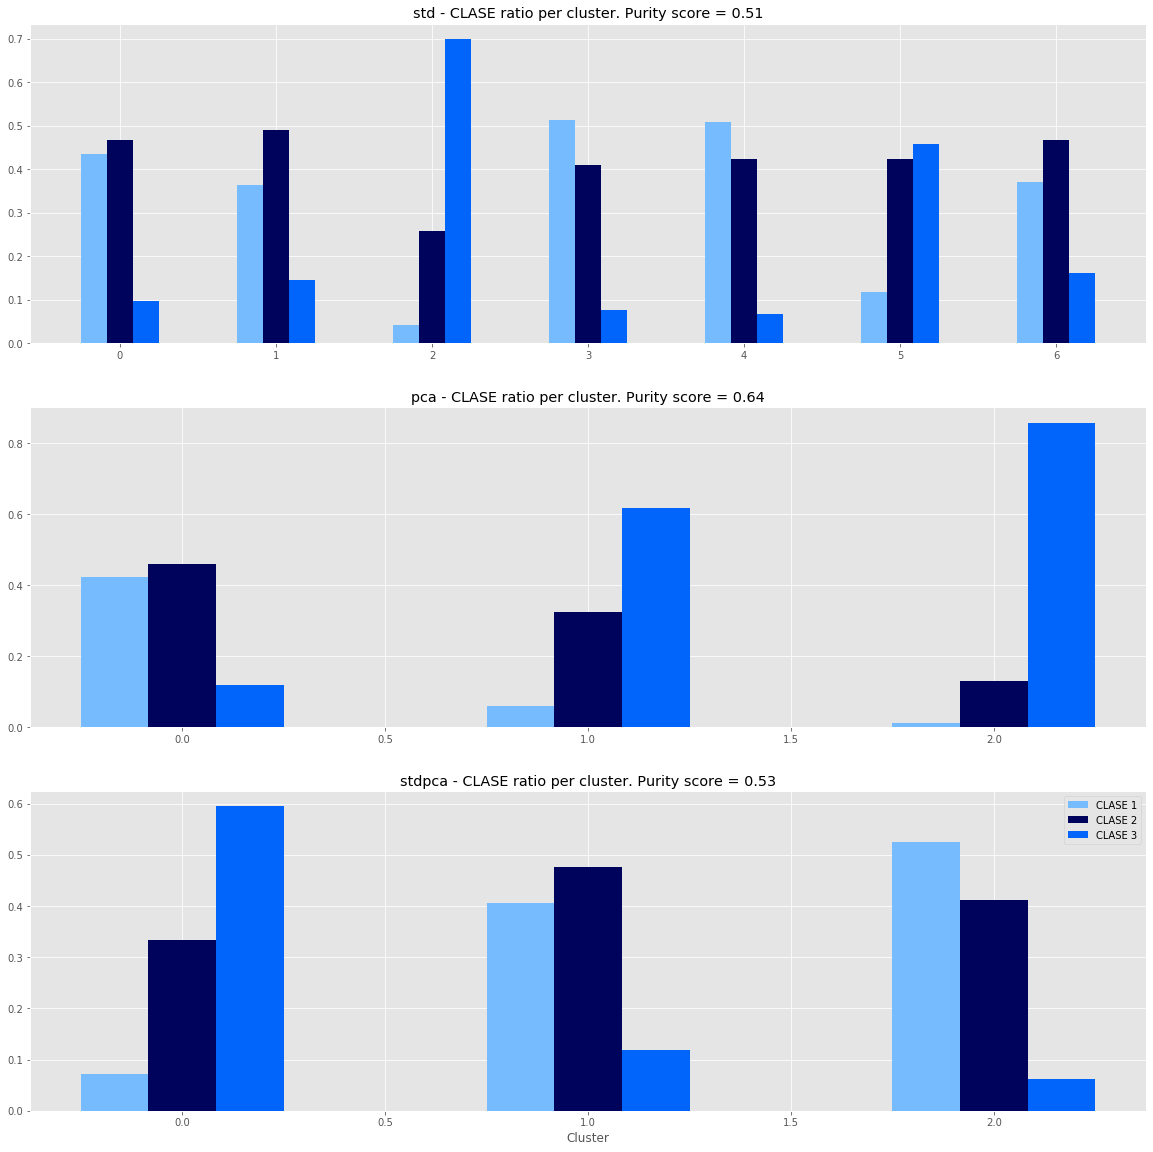

In [179]:
fig, ax = plt.subplots(3, 1,figsize=(20,20))

for i in range(clust_clase_std.shape[1]):
    ax[0].bar(x_std+dx_std[i],clust_clase_std_r[:,i], width=d_std, color= ['xkcd:sky blue','xkcd:dark blue','xkcd:bright blue'][i], label="{}".format(['CLASE 1','CLASE 2','CLASE 3'][i]))
ax[0].set_title('std - CLASE ratio per cluster. Purity score = %.2f' %(sum(np.max(clust_clase_std_r,1))/sum(sum(clust_clase_std_r))))

for i in range(clust_clase_pca.shape[1]):
    ax[1].bar(x_pca+dx_pca[i],clust_clase_pca_r[:,i], width=d_pca, color= ['xkcd:sky blue','xkcd:dark blue','xkcd:bright blue'][i], label="{}".format(['CLASE 1','CLASE 2','CLASE 3'][i]))
ax[1].set_title('pca - CLASE ratio per cluster. Purity score = %.2f' %(sum(np.max(clust_clase_pca_r,1))/sum(sum(clust_clase_pca_r))))

for i in range(clust_clase_pcastd.shape[1]):
    ax[2].bar(x_pcastd+dx_pcastd[i],clust_clase_pcastd_r[:,i], width=d_pcastd, color= ['xkcd:sky blue','xkcd:dark blue','xkcd:bright blue'][i], label="{}".format(['CLASE 1','CLASE 2','CLASE 3'][i]))
ax[2].set_title('stdpca - CLASE ratio per cluster. Purity score = %.2f' %(sum(np.max(clust_clase_pcastd_r,1))/sum(sum(clust_clase_pcastd_r))))
plt.xlabel('Cluster')
plt.legend(framealpha=1)
plt.show()

According to this result, PCA without standardisation yielded highest purity. For the standardisation only model, it was also deemed reasonable to apply k=3. This will be done to have a more fair comparison.

In [180]:
k=3
km_std3=KMeans(k,random_state=42)
km_std3.fit(X_e_std)
df['cluster_std3']=km_std3.fit_predict(X_e_std)
#matrix
clust_clase_std3 = np.zeros((3,k))
for i in range(3):
    for j in range(k):
        clust_clase_std3[i,j] = len(df[(df.CLASE==i+1) & (df.cluster_std3==j)])
clust_clase_std3 = clust_clase_std3.T
clust_clase_std3_r = clust_clase_std3/clust_clase_std3.sum(axis=1)[:,None]

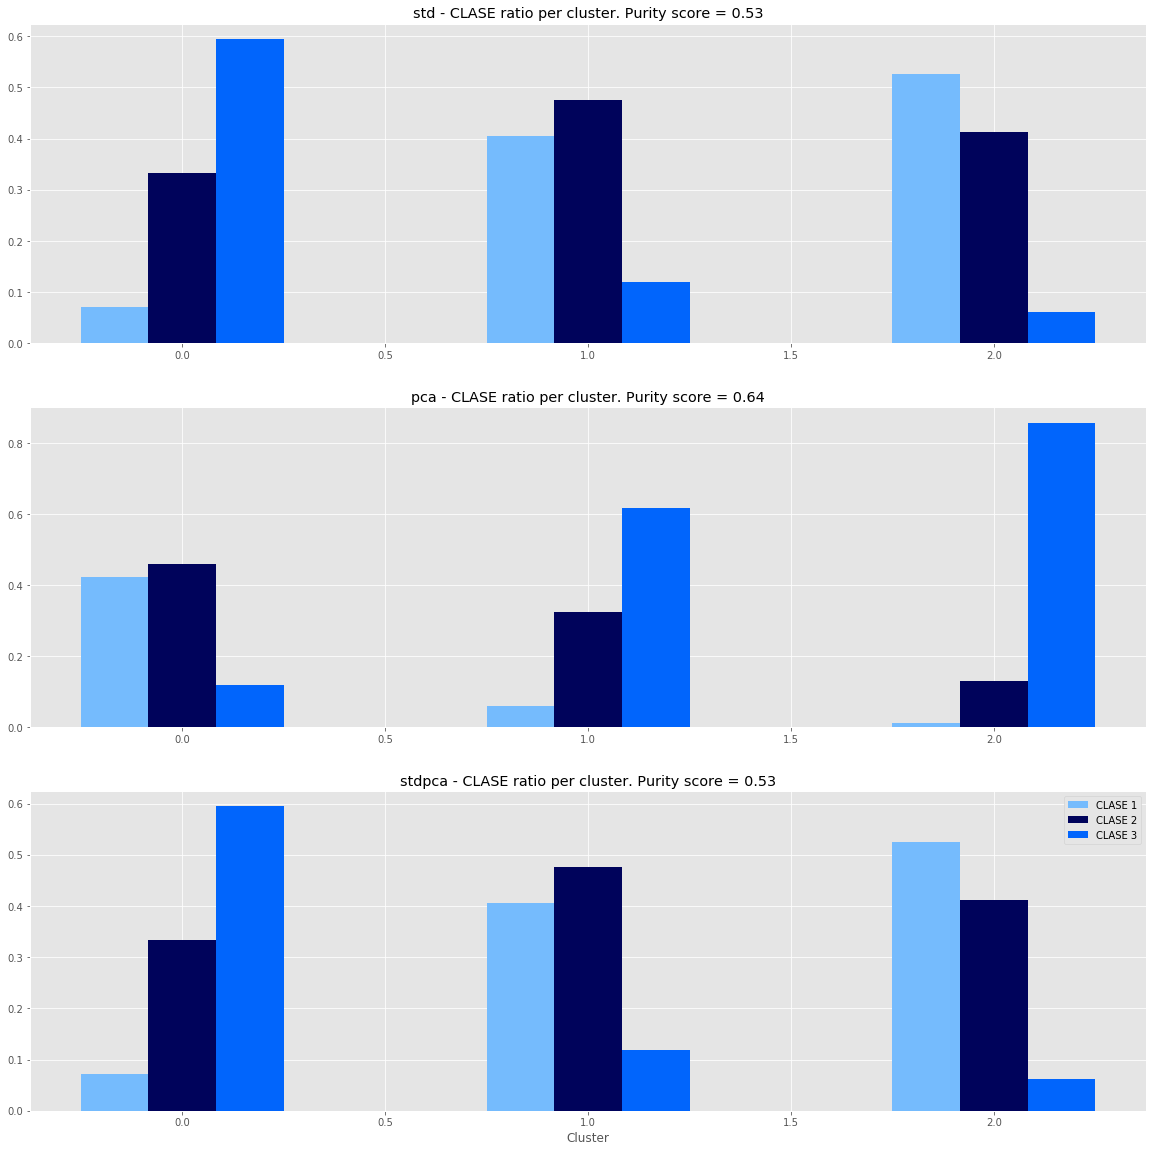

In [181]:
fig, ax = plt.subplots(3, 1,figsize=(20,20))

for i in range(clust_clase_std3.shape[1]): #Obs x_pca, dx_pca and d_pca have the right dims here
    ax[0].bar(x_pca+dx_pca[i],clust_clase_std3_r[:,i], width=d_pca, color= ['xkcd:sky blue','xkcd:dark blue','xkcd:bright blue'][i], label="{}".format(['CLASE 1','CLASE 2','CLASE 3'][i]))
ax[0].set_title('std - CLASE ratio per cluster. Purity score = %.2f' %(sum(np.max(clust_clase_std3_r,1))/sum(sum(clust_clase_std3_r))))

for i in range(clust_clase_pca.shape[1]):
    ax[1].bar(x_pca+dx_pca[i],clust_clase_pca_r[:,i], width=d_pca, color= ['xkcd:sky blue','xkcd:dark blue','xkcd:bright blue'][i], label="{}".format(['CLASE 1','CLASE 2','CLASE 3'][i]))
ax[1].set_title('pca - CLASE ratio per cluster. Purity score = %.2f' %(sum(np.max(clust_clase_pca_r,1))/sum(sum(clust_clase_pca_r))))

for i in range(clust_clase_pcastd.shape[1]):
    ax[2].bar(x_pcastd+dx_pcastd[i],clust_clase_pcastd_r[:,i], width=d_pcastd, color= ['xkcd:sky blue','xkcd:dark blue','xkcd:bright blue'][i], label="{}".format(['CLASE 1','CLASE 2','CLASE 3'][i]))
ax[2].set_title('stdpca - CLASE ratio per cluster. Purity score = %.2f' %(sum(np.max(clust_clase_pcastd_r,1))/sum(sum(clust_clase_pcastd_r))))
plt.xlabel('Cluster')
plt.legend(framealpha=1)
plt.show()

With this change the Kmean(3) on standardised data and the Kmean(3) on standardised and PCA transformed data clusters equally. The Kmean(3) on non standardised data but PCA transformed yield the best purity by being significantly better at clustering CLASE 3 by itself. This can be a result of the very high value for neighbourhood income and rent having higher influence whitout standardisation, and these features are primarliy the drivers for CLASE 3. However the standardised models yields clusters that are dominated by each CLASE which might be more valuable for the real estate agency.

The three key take-aways from this analysis are:<br>
1) Different segmentations the market are established for the real estate agency to target the right buyers. <br>
2) The PCA clustering without standardisation is better at segmenting CLASE 3. <br>
3) The standardised clusterings are better at segmenting with a segment dominated by each house hold type.

Since this clustering is based on the entire data of the city it will not be used to predict in the next section. The model could be trained for the prediction challenge to, but other machine learning methods are applied there to widen the toolbox.

# Prediction challenge

The objective is to predict the type of household that will buy a real estate on basis of its area characteristics. This prediction can help real estate companies to target their advertising to the segment with highest potential.

To evaluate models, they are build as multicategorical calssifications, predicting the most likely category of household type to buy a real estate. However, the real estate agencies might be interested in the second and third most likely household types as well, if the probability of these are high. Therefore the output of the final model will be in the format of:

House X is relevant for households:<br>
Type 1 - y%<br>
Type 2 - z%<br>
Type 3 - w%

## Data split <a id = "datasplit"><a>

The model will be trained on data outside the center of Santiago, and tested on the center of Santiago. The center is defined as the area within the coordinates 70.7E, 33.4S to 70.6E, 33.5S. The categorical feature *Sector* is one-hot encoded. To illustrate the train and test split the geometry is merged back to the data set. The dataframe used here is the `df_all` dataframe as it has all features and has been cleaned.

In [182]:
df_all = df_all.reset_index()
df_all = df_all.merge(coords_and_geom[['Hogar','geometry']], how='left',on='Hogar')
df_all = df_all.set_index('Hogar')
df_all = pd.get_dummies(df_all, columns = ['Sector'])
df_all.head()

MontoArr  IngresoHogar CLASE  Sup_Prom_Constr_Hab_EOD  \
Hogar                                                           
100010    100000        450845     1                     53.8   
100020    120000       1019369     1                     59.6   
100030     70000         80000     1                     59.5   
100041     80000        559259     2                     59.5   
100052    117771        710309     2                     43.6   

        Calid_EOD_norm_inv  DensConstr_EOD  Dist_est_Metro_MC_KM  \
Hogar                                                              
100010                0.98           0.059             23.051711   
100020                0.98           0.033             21.080177   
100030                0.98           0.004             34.147894   
100041                0.98           0.004             34.147817   
100052                0.98           0.086             19.908792   

        Dist_salida_Autop_MC_KM  Tiempo_Com_Stgo  Ingreso_Promedio_Zona_MM  \
Hogar                                                                        
100010                 4.345179               69                  0.519765   
100020                 1.381521               84                  0.678317   
100030                11.993389               83                  0.408158   
100041                11.993268               83                  0.408158   
100052                 1.363177               94                  0.498140   

        ...  comunas_id        crimes                         geometry  \
Hogar   ...                                                              
100010  ...         786  30562.039642  POINT (335180.8019 6266420.975)   
100020  ...         785  30562.039642  POINT (338410.2114 6265607.141)   
100030  ...         791  30562.039642  POINT (327863.8248 6257800.086)   
100041  ...         791  30562.039642           POINT (327864 6257800)   
100052  ...         783  30562.039642  POINT (338480.8152 6267296.941)   

        Sector_1  Sector_2  Sector_3  Sector_4  Sector_5  Sector_6  Sector_7  
Hogar                                                                         
100010         0         0         0         0         0         0         1  
100020         0         0         0         0         0         0         1  
100030         0         0         0         0         0         0         1  
100041         0         0         0         0         0         0         1  
100052         0         0         0         0         0         0         1  

[5 rows x 32 columns]

For predicting the target feature, 'CLASE', three different set of features will be made. 

1) Test and train data where the 'acc' features found in the correlation matrix are removed.<br>
2) Test and train data where the 'acc' features are represented by PCA vectores.<br>
3) Test and train data where all features are presented by PCA vectors.<br>

Before the data is split the PCA vectores are made and added to the dataframe. First the PCA vectors for the 'acc' features are made.

In [183]:
# Acc feature names
acc_feature_names = ['Acc_Comercio_tpte_pub','Acc_Educacion_tpte_pub', 'Acc_Habitacion_tpte_pub',
       'Acc_Industria_tpte_pub', 'Acc_Servicios_tpte_pub', 'Acc_Comercio_auto',
       'Acc_Educacion_auto', 'Acc_Habitacion_auto', 'Acc_Industria_auto','Acc_Servicios_auto',]

# New data frame only with the acc features
acc_features = df_all[acc_feature_names]
# Standardize the data
acc_features_std = StandardScaler().fit_transform(acc_features)

PC-1 explains: 0.85836 of the variance
PC-2 explains: 0.95267 of the variance
PC-3 explains: 0.97822 of the variance
PC-4 explains: 0.99594 of the variance
PC-5 explains: 0.99789 of the variance
PC-6 explains: 0.99901 of the variance


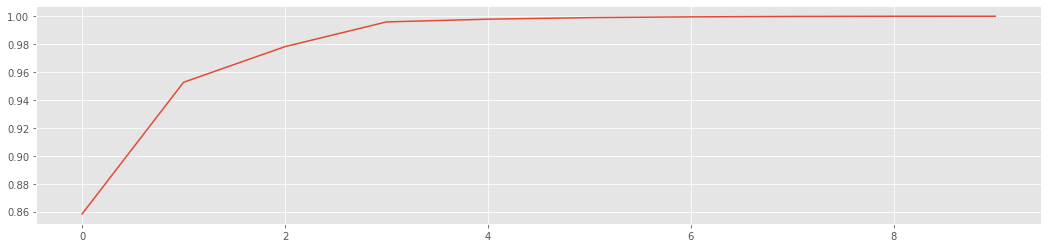

In [184]:
# Perform PCA:
pca = decomposition.PCA()
pca.fit(acc_features_std)
expl=pca.explained_variance_ratio_
cdf=[sum(expl[:i+1]) for i in range(len(expl))]
plt.figure(figsize=(18,4))
plt.plot(range(len(expl)), cdf);
for i in range(6):
    print('PC-%i explains: %.5f of the variance' % (i+1, cdf[i]))

The first 4 principal components are capable of explaining 99.6% of the variance of the 'acc' features. These 4 vectors are therefor used to explain the 'acc' features.

In [185]:
acc_pca = pca.transform(acc_features_std)

df_all['PCA1_acc'] = acc_pca[:,0]
df_all['PCA2_acc'] = acc_pca[:,1]
df_all['PCA3_acc'] = acc_pca[:,3]
df_all['PCA4_acc'] = acc_pca[:,4]

A PCA for all the features in the set is now made.

In [186]:
# Feature names to use for PCA
features = ['Sup_Prom_Constr_Hab_EOD','MontoArr',
       'Calid_EOD_norm_inv', 'DensConstr_EOD', 'Dist_est_Metro_MC_KM',
       'Dist_salida_Autop_MC_KM', 'Tiempo_Com_Stgo',
       'Ingreso_Promedio_Zona_MM', 'Acc_Comercio_tpte_pub',
       'Acc_Educacion_tpte_pub', 'Acc_Habitacion_tpte_pub',
       'Acc_Industria_tpte_pub', 'Acc_Servicios_tpte_pub', 'Acc_Comercio_auto',
       'Acc_Educacion_auto', 'Acc_Habitacion_auto', 'Acc_Industria_auto',
       'Acc_Servicios_auto', 'Latitude', 'Longitude', 'crimes',
       'Sector_1', 'Sector_2', 'Sector_3', 'Sector_4', 'Sector_5',
       'Sector_6', 'Sector_7']

# New data frame only with the features choosen above
df_features = df_all[features]
# Standardize the data
df_features_std = StandardScaler().fit_transform(df_features)

PC-8 explains: 0.90726 of the variance
PC-9 explains: 0.92631 of the variance
PC-10 explains: 0.94173 of the variance
PC-11 explains: 0.95391 of the variance
PC-12 explains: 0.96488 of the variance
PC-13 explains: 0.97532 of the variance
PC-14 explains: 0.98395 of the variance
PC-15 explains: 0.99030 of the variance


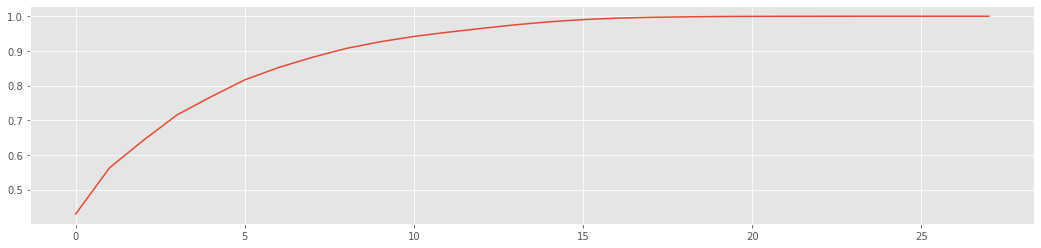

In [187]:
# Perform PCA:
pca = decomposition.PCA()
pca.fit(df_features_std)
expl=pca.explained_variance_ratio_
cdf=[sum(expl[:i+1]) for i in range(len(expl))]
plt.figure(figsize=(18,4))
plt.plot(range(len(expl)), cdf);
for i in range(8,16):
    print('PC-%i explains: %.5f of the variance' % (i, cdf[i]))

We see that more than 95% of the variance is explained by the first 11 PCA components. These features are also saved to the dataframe.

In [188]:
all_pca = pca.transform(df_features_std)

# Define alle PCA's
for i in range(0,11):
    df_all['PCA-%i' % (i+1)] = all_pca[:,i]

In [189]:
df_all.head()

MontoArr  IngresoHogar CLASE  Sup_Prom_Constr_Hab_EOD  \
Hogar                                                           
100010    100000        450845     1                     53.8   
100020    120000       1019369     1                     59.6   
100030     70000         80000     1                     59.5   
100041     80000        559259     2                     59.5   
100052    117771        710309     2                     43.6   

        Calid_EOD_norm_inv  DensConstr_EOD  Dist_est_Metro_MC_KM  \
Hogar                                                              
100010                0.98           0.059             23.051711   
100020                0.98           0.033             21.080177   
100030                0.98           0.004             34.147894   
100041                0.98           0.004             34.147817   
100052                0.98           0.086             19.908792   

        Dist_salida_Autop_MC_KM  Tiempo_Com_Stgo  Ingreso_Promedio_Zona_MM  \
Hogar                                                                        
100010                 4.345179               69                  0.519765   
100020                 1.381521               84                  0.678317   
100030                11.993389               83                  0.408158   
100041                11.993268               83                  0.408158   
100052                 1.363177               94                  0.498140   

        ...     PCA-2     PCA-3     PCA-4     PCA-5     PCA-6     PCA-7  \
Hogar   ...                                                               
100010  ...  0.335693  1.262365  2.237934  0.718190 -0.046787 -0.041143   
100020  ...  0.447701  1.175615  1.948159  0.952800  0.101646 -0.048087   
100030  ...  0.728602  1.281680  3.162592  0.741310 -0.527908  0.034921   
100041  ...  0.750780  1.291857  3.158461  0.753782 -0.528749  0.031690   
100052  ...  0.059834  1.053018  2.031554  0.768922  0.105796 -0.021224   

           PCA-8     PCA-9    PCA-10    PCA-11  
Hogar                                           
100010 -0.702170  0.469428  0.532037 -1.833611  
100020 -1.692876 -0.560478  0.862189 -1.790269  
100030  1.052539  3.026399  0.028340 -1.677860  
100041  1.051094  3.024634  0.061008 -1.641118  
100052 -1.663238 -0.695949  0.402978 -1.167222  

[5 rows x 47 columns]

With all PCA vectors in the dataframe the data can now be divided into train and test data. It should be noted that 'IngresoHogar'is removed since it is a household characteristic which is not a real estate characteristic.

In [190]:
#Defining independent variables X, and dependent variables y. (Longitude and Latitude are temporarily kept to map below)
X_att = ['Sup_Prom_Constr_Hab_EOD','MontoArr',
       'Calid_EOD_norm_inv', 'DensConstr_EOD', 'Dist_est_Metro_MC_KM',
       'Dist_salida_Autop_MC_KM', 'Tiempo_Com_Stgo',
       'Ingreso_Promedio_Zona_MM', 'Acc_Comercio_tpte_pub',
       'Acc_Educacion_tpte_pub', 'Acc_Habitacion_tpte_pub',
       'Acc_Industria_tpte_pub', 'Acc_Servicios_tpte_pub', 'Acc_Comercio_auto',
       'Acc_Educacion_auto', 'Acc_Habitacion_auto', 'Acc_Industria_auto',
       'Acc_Servicios_auto', 'Latitude', 'Longitude', 'crimes','geometry',
       'Sector_1', 'Sector_2', 'Sector_3', 'Sector_4', 'Sector_5',
       'Sector_6', 'Sector_7', 'PCA1_acc','PCA2_acc','PCA3_acc','PCA4_acc',
        'PCA-1','PCA-2','PCA-3','PCA-4','PCA-5','PCA-6','PCA-7','PCA-8','PCA-9','PCA-10','PCA-11']

y_att = ['CLASE','Longitude','Latitude']

# ------- Train and Test split ----------- #
#Define borders
TestLongMin = -70.7 
TestLongMax = -70.6 
TestLatMin = -33.5 
TestLatMax = -33.4 

# Split sets
X_train = df_all[(df_all.Longitude < TestLongMin) | (TestLongMax < df_all.Longitude) | (df_all.Latitude < TestLatMin) | (TestLatMax < df_all.Latitude)][X_att]
X_test  = df_all[(df_all.Longitude >= TestLongMin) & (TestLongMax >= df_all.Longitude) & (df_all.Latitude >= TestLatMin) & (TestLatMax >= df_all.Latitude)][X_att]
y_train = df_all[(df_all.Longitude < TestLongMin) | (TestLongMax < df_all.Longitude) | (df_all.Latitude < TestLatMin) | (TestLatMax < df_all.Latitude)][y_att]
y_test  = df_all[(df_all.Longitude >= TestLongMin) & (TestLongMax >= df_all.Longitude) & (df_all.Latitude >= TestLatMin) & (TestLatMax >= df_all.Latitude)][y_att]

#Shapes of train and test sets

print('X_train shape:',X_train.shape)
print('X_test shape:',X_test.shape)
print('y_train shape:',y_train.shape)
print('y_test shape:',y_test.shape)
print('%.1f of the data is train data.' %(X_train.shape[0]/(X_train.shape[0]+X_test.shape[0])*100))

X_train shape: (14947, 44)
X_test shape: (2929, 44)
y_train shape: (14947, 3)
y_test shape: (2929, 3)
83.6 of the data is train data.


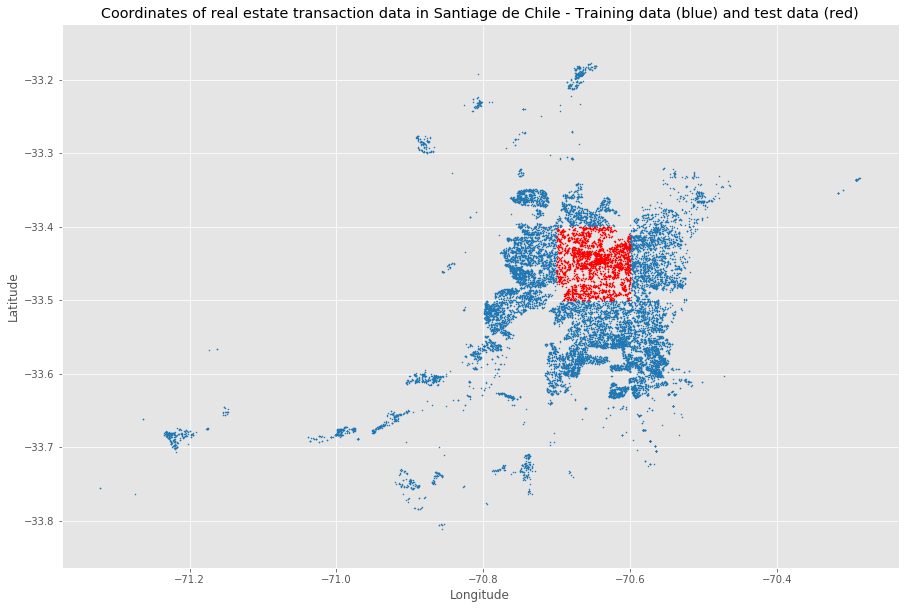

In [191]:
#Define geodataframe and plot
df_geo = gdp.GeoDataFrame(df_all, crs = utm, geometry = df_all.geometry)
plt.figure(figsize=(15,10));
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('equal')
plt.scatter(X_train.Longitude,y_train.Latitude, s=1, c='tab:blue')
plt.scatter(X_test.Longitude,y_test.Latitude, s=1, c='red')
plt.title('Coordinates of real estate transaction data in Santiage de Chile - Training data (blue) and test data (red)');
plt.show()
#<W ^N E> 

The latitude, longitude and geometry columns are removed from the *y* as we only want CLASE. Furthermore the longitude and latitude for the test set is saved for later use.

In [192]:
test_coor = y_test.loc[:,'Longitude':'Latitude']
y_train = y_train.drop(['Longitude','Latitude'],1) 
y_test = y_test.drop(['Longitude','Latitude'],1) 

As stated in the initial data analysis, the target feature was imbalanced. Here the distribution is checked for both the training and test set.

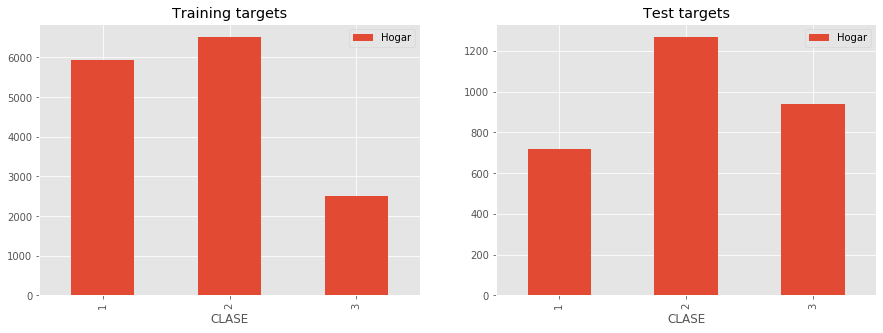

In [205]:
p1 = y_train.reset_index()
p2 = y_test.reset_index()
## Set subplot
fig, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].set_title('Training targets')
p1.groupby('CLASE').count().plot(kind='bar',ax=axes[0])
axes[1].set_title('Test targets')
p2.groupby('CLASE').count().plot(kind='bar',ax=axes[1])
plt.show()

The training data is highly based on CLASE 1 and 2, whereas the test data balanced towards CLASE 2 and 3. The train and test set are fixed so the distribution cannot be changed. This can potentially cause problems as our model will be trained on one distribution of the data but it will be evaluated on a different distribution. During the prediction the scoring metric for the models will be changed to take this into account.
<br>
<br>
<br>The 3 described set of features are now defined.<br>

**1) Test and train data where the 'acc' features found in the correlation matrix are removed.**

In [206]:
X1_features = ['Sup_Prom_Constr_Hab_EOD', 'Calid_EOD_norm_inv', 'DensConstr_EOD',
       'Dist_est_Metro_MC_KM', 'Dist_salida_Autop_MC_KM', 'Tiempo_Com_Stgo',
       'Ingreso_Promedio_Zona_MM', 'Acc_Servicios_tpte_pub',
       'Acc_Servicios_auto', 'crimes', 'Sector_1', 'Sector_2', 'Sector_3',
       'Sector_5', 'Sector_6', 'Sector_7','MontoArr']

X1_train = X_train[X1_features]
X1_test = X_test[X1_features]
print(X1_train.shape)
print(X1_test.shape)

(14941, 17)
(2929, 17)


The X1 test and train set thus has 17 features.

**2) Test and train data where the 'acc' features are represented by PCA vectores.**

In [207]:
X2_features = ['Sup_Prom_Constr_Hab_EOD', 'Calid_EOD_norm_inv', 'DensConstr_EOD',
       'Dist_est_Metro_MC_KM', 'Dist_salida_Autop_MC_KM', 'Tiempo_Com_Stgo',
       'Ingreso_Promedio_Zona_MM','crimes', 'Sector_1', 'Sector_2', 'Sector_3',
       'Sector_5', 'Sector_6', 'Sector_7', 'PCA1_acc', 'PCA2_acc', 'PCA3_acc',
       'PCA4_acc','MontoArr']

X2_train = X_train[X2_features]
X2_test = X_test[X2_features]
print(X2_train.shape)
print(X2_test.shape)

(14941, 19)
(2929, 19)


The X2 test and train set thus has 19 features.

**3) Test and train data where all features are presented by PCA vectors.**

In [208]:
X3_features = ['PCA-1', 'PCA-2', 'PCA-3', 'PCA-4', 'PCA-5', 
               'PCA-6', 'PCA-7', 'PCA-8', 'PCA-9', 'PCA-10','PCA-11']

X3_train = X_train[X3_features]
X3_test = X_test[X3_features]
print(X3_train.shape)
print(X3_test.shape)

(14941, 11)
(2929, 11)


This leaves 11 features in the X3 train and test set.

The data is standardized before used for modelling. This is done to ensure that we are able to compare features with different units. For X1 all the data is standardized, for X2 all features but the PCA features are standardized and for X3 no features are standardized as this has all ready been done.

In [209]:
# Standardize X1
X1_mean = X1_train.mean(axis=0)
X1_std = X1_train.std(axis=0)

X1_train = (X1_train - X1_mean) / X1_std
X1_test = (X1_test - X1_mean) / X1_std

In [210]:
# Standardize X2
X2_mean = X2_train.iloc[:,0:14].mean(axis=0)
X2_std = X2_train.iloc[:,0:14].std(axis=0)

X2_train.iloc[:,0:14] = (X1_train - X1_mean) / X1_std
X2_test.iloc[:,0:14] = (X1_test - X1_mean) / X1_std

c:\users\rp_ri\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


The training data is ready for modelling of classifiers and the test data is ready for evaluation of the classifiers. The two evaluation functions below are used.

The original function originates from the lectures, but is tailored to this project and split in two defintion. `confusion_mat` plot a confusion matrix while the definition `evaluate_scores` gives the accuracy, precision, recall and f1 score.

In [211]:
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score,classification_report
from exercise_utils import plot_confusion_matrix 

# function to evaluate predictions
def confusion_ma(y_true, y_pred):
    # calculate and display confusion matrix
    labels = np.unique(y_true)
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    plot_confusion_matrix(y_true, y_pred,classes=labels,normalize=True)
    return plt.show()

In [212]:
# function to evaluate only accuracy, precision, recall and f1 score
def evaluate_scores(y_true, y_pred):
    # calculate confusion matrix
    labels = np.unique(y_true)
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    # calculate precision, recall, and F1 score
    accuracy = float(np.trace(cm)) / np.sum(cm)
    precision = precision_score(y_true, y_pred, average=None, labels=labels)[1]
    recall = recall_score(y_true, y_pred, average=None, labels=labels)[1]
    f1 = 2 * precision * recall / (precision + recall)
    print("accuracy:", accuracy)
    print("precision:", precision)
    print("recall:", recall)
    print("f1 score:", f1)
    return accuracy, precision, recall, f1

## Parameter tuning and cross validation <a id = "paramandcross"><a>

3 classificaiton models will be evaluated:

- Logistics Regression <br>
- K-Nearest Neighbours<br>
- Random Forest <br>

10-fold cross validation (CV) is applied to select the best model. 10-fold CV yields 14941 observations for training and 2929 observations for validation. 10-fold CV is selected as a trade off between the precise but computational heavy Leave-One-Out method and the less precise but computational light Hold-Out method.

Each model will undergo parameter tuning to achieve the best possible version of the model. The parameter ranges are selected by the authors, and will be changed if the best setting is at the edge of the range. The parameter tunning is perfomed using grid search, entailing that all parameter combinations are tested. This appraoch is also called exhaustive parameter tuning.

*f1_micro* is selected as the scoring metric for the parameter tuning. It gives each sample-class pair an equal contribution to the overall metric. This way it is considered equally important to classify each type of houshold, even though some types are dominating. According to sckikit-learn: *Micro-averaging may be preferred in multilabel settings, including multiclass classification where a majority class is to be ignored.*. No classes will be ignored with the scoring, but the performance for the largest category CLASE 2, won't count more than the performance of the other categories.

GridSearchCV from sklearn combine the crossvalidation and parameter tunning. 

In [213]:
#GridSearch
from sklearn.model_selection import GridSearchCV

#10-fold CV
kf = 10

#Scoring - https://scikit-learn.org/stable/modules/model_evaluation.html
scor = 'f1_micro'

Inspiration for the GridSearchCV and the scoring is obtained here:<br>
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html <br>
https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter <br>
Scoring types<br>
https://datascience.stackexchange.com/questions/15989/micro-average-vs-macro-average-performance-in-a-multiclass-classification-settin <br>

### Baseline - Dummy Classifier <a id = "baseline"><a>

The sklearn dummy classifier is used as baseline for the model selection process. In the classifier the `strategy ='most_frequent'` is set as the model then will predict everything as the most frequent label in the training set. It therefor does not matter which X is given as the results only depend on the the y.

C:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


accuracy: 0.4335950836462957
precision: 0.4335950836462957
recall: 1.0
f1 score: 0.6049059299833294
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       718
           2       0.43      1.00      0.60      1270
           3       0.00      0.00      0.00       941

    accuracy                           0.43      2929
   macro avg       0.14      0.33      0.20      2929
weighted avg       0.19      0.43      0.26      2929



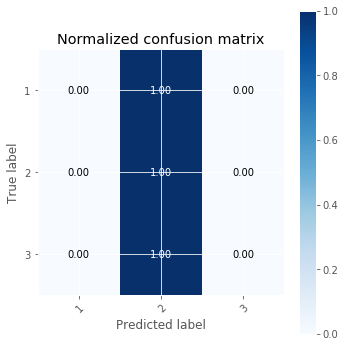

In [625]:
from sklearn.dummy import DummyClassifier

#Estimator
dummy_clf = DummyClassifier(strategy = 'most_frequent')

dummy_clf.fit(X1_train,y_train)

#Results
y_pred =  dummy_clf.predict(X1_test)
evaluate_scores(y_test,y_pred)
print(classification_report(y_test, y_pred))
confusion_ma(y_test,y_pred)

The model, as it was told, classifies everything as being CLASE = 2 which gives a f1 score of 0.60 which we later will see is quit high. However, if we think from the companys point of view, the f1 score is not nessasary a very good way to score the models. The precision and accuracy for the different classes might be more important. This is especially important for the customers in the CLASE = 3, as these customers, as shown, are customers with high wages and thereby higher income for the company. We therefor want the accuracy to be as high for this class as possible. 

With this in mind the DummyClassifier does very badly as it does not classify any of the CLASE = 3 correctly. Neither does it predict any of the CLASE = 1 correctly. If we went ahead with this model we would there for send a lot of wrong porposals out to the CLASE's.

### Logistic Regression <a id = "logistic"><a>

The parameters which are choosen for tuning in the LogisticRegression are: penalty, C and fit_intercept. The penalty specifies which regularization to use. The model is given the l1 and l2 to choose between. The C values specifies the inverse of the regularization strength, lower values of C constraint the model more. Finally the fit_intercept specifies whether or not a constant should be added to the function. 

In the logistic regression the following things are further specified:
- `multi_class = 'ovr'` - is specified to avoid error messages. `'ovr'` is the default setting.
- `solver = 'liblinear'` - is specified to avoid error messages. `'liblinear'` is the default setting.
- `random_state = 42` - is specified to make sure the same result is achieved every time.
- `class_weight = 'balanced'` - is specified to acommodate the imbalance in the training set. 

A logistic regression is now fitted for `X1_train`.

In [215]:
from sklearn.linear_model import LogisticRegression

#Estimator
logreg = LogisticRegression(multi_class = 'ovr',solver = 'liblinear', class_weight = 'balanced', random_state = 42)

#Parameters for the tuning
logreg_pars = {'penalty': ['l1','l2'],'C' : [0.0009,0.001,0.002], 'fit_intercept': ['True','False']}

#GridSearchCV
logreg_clf1 = GridSearchCV(logreg, logreg_pars, cv=kf, scoring=scor)
logreg_clf1.fit(X1_train,np.ravel(y_train))

#Results
print('Best parameters:',logreg_clf1.best_params_)
print('Best score:',logreg_clf1.best_score_)

Best parameters: {'C': 0.001, 'fit_intercept': 'True', 'penalty': 'l1'}
Best score: 0.5566561809785155


A logistic regression is now fitted for `X2_train`.

In [148]:
#Parameters for the tuning
logreg_pars = {'penalty': ['l1','l2'],'C' : [0.0009,0.001,0.0015], 'fit_intercept': ['True','False']}

#GridSearchCV
logreg_clf2 = GridSearchCV(logreg, logreg_pars, cv=kf, scoring=scor)
logreg_clf2.fit(X2_train,np.ravel(y_train))

#Results
print('Best parameters:',logreg_clf2.best_params_)
print('Best score:',logreg_clf2.best_score_)

Best parameters: {'C': 0.001, 'fit_intercept': 'True', 'penalty': 'l1'}
Best score: 0.5620105749280503


Finally a logistic regression is fitted for `X3_train`.

In [216]:
#Parameters for the tuning
logreg_pars = {'penalty': ['l1','l2'],'C' : [0.027,0.028,0.029], 'fit_intercept': ['True','False']}

#GridSearchCV
logreg_clf3 = GridSearchCV(logreg, logreg_pars, cv=kf, scoring=scor)
logreg_clf3.fit(X3_train,np.ravel(y_train))

#Results
print('Best parameters:',logreg_clf3.best_params_)
print('Best score:',logreg_clf3.best_score_)

Best parameters: {'C': 0.028, 'fit_intercept': 'True', 'penalty': 'l1'}
Best score: 0.5203801619704169


From the results of the models all three models choose the to have a constant added to the decision function and that the penalty should be *l1*. The regularization strength for the three models is different as the two first models choose a much lower *C* value and thereby a stronger regularization. 

With the trained three logistic regressions it is now time to evaluate their performance. We will start of by looking at the models scores.

In [629]:
y_pred1 =  logreg_clf1.predict(X1_test)
print('---------- X1 -----------')
logreg_eval1 = evaluate_scores(y_test,y_pred1)
print(classification_report(y_test, y_pred1))

y_pred2 =  logreg_clf2.predict(X2_test)
print('\n---------- X2 -----------')
logreg_eval2 = evaluate_scores(y_test,y_pred2)
print(classification_report(y_test, y_pred2))

y_pred3 =  logreg_clf3.predict(X3_test)
print('\n---------- X3 -----------')
logreg_eval3 = evaluate_scores(y_test,y_pred3)
print(classification_report(y_test, y_pred3))

---------- X1 -----------
accuracy: 0.5124615909866849
precision: 0.47641509433962265
recall: 0.47716535433070867
f1 score: 0.4767899291896145
              precision    recall  f1-score   support

           1       0.47      0.66      0.55       718
           2       0.48      0.48      0.48      1270
           3       0.65      0.45      0.53       941

    accuracy                           0.51      2929
   macro avg       0.53      0.53      0.52      2929
weighted avg       0.53      0.51      0.51      2929


---------- X2 -----------
accuracy: 0.5462615227039945
precision: 0.5212418300653595
recall: 0.5023622047244094
f1 score: 0.5116279069767442
              precision    recall  f1-score   support

           1       0.51      0.44      0.47       718
           2       0.52      0.50      0.51      1270
           3       0.59      0.68      0.64       941

    accuracy                           0.55      2929
   macro avg       0.54      0.54      0.54      2929
weighted

From the scores presented above we see that all models have worse f1 score than the dummy classifier. However, all models have a higher overall accuracy and higher overall precision and for each CLASE. Therefor any of these logisticregression models would be much more desirable than the DummyClassifier. We futher see that the model trained on X1 has the highest precision for CLASE = 3 but also that it has the lowest overall accuracy and precision and a low accuracy for CLASE = 3. To be able to decide which model and thereby which dataset is gives the best results with the logisticregression we also need to inspect the confusion matrices. 

---------- X1 -----------


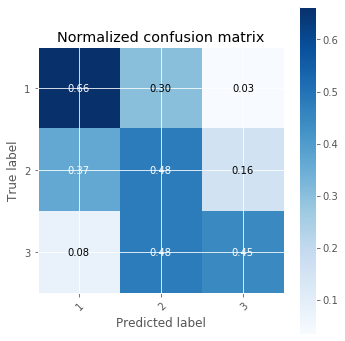

---------- X2 -----------


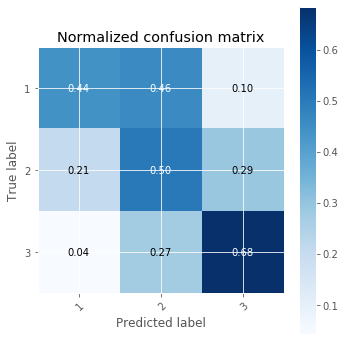

---------- X3 -----------


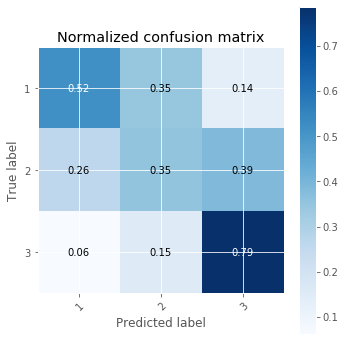

In [630]:
# Confusion matrix
print('---------- X1 -----------')
confusion_ma(y_test,y_pred1)
print('---------- X2 -----------')
confusion_ma(y_test,y_pred2)
print('---------- X3 -----------')
confusion_ma(y_test,y_pred3)

By inspecting the confusion matrix for X1 we see that eventhough CLASE = 3 had the highest precision this is because it generally just predicts much fewer observations as CLASE = 3 and also has the lowest amount of true positives for this CLASE. The data for X1 is therefor not choosen for the logistic regression. By in comparing the f1 score for CLASE = 3 for the different models the model trained on X1 also has the lowest score.

With regards to the models trained on X2 and X3 the overall accuracy and precision were very similar. By inspecting the two confusion matrices this is verified. We further see that the model trained on X2 only predicts 68% of CLASE = 3 correctly while the model trained on X3 predicts 79% correctly. However the model trained on X2 is very good at not predicting many households which are of CLASE = 1 as CLASE = 3 (only 10%) and the same with households which are CLASE = 3 as CLASE = 1 (4%). This is very important as the people who will buy a household of the type CLASE = 3 might also buy a house of type CLASE = 2, but they are not likely to want a house of type CLASE = 1. For the people who will buy a household of type CLASE = 1 it is the other way around. As for the people who will will buy a household of CLASE = 2 it is more likely that they might buy a household of any of the categories and it is there for okay that larger shares for this CLASE are predicted falsly.

The model which is trained on the X3 data (the data where all vectors are transformed into PCA vectors) is choosen as the best data for the logistic regression. The model has a *l1* penalty of 0.028 and uses a constant in the decision function. It predicts the largest share of CLASE = 3 corretly while still predicting a large share of the CLASE = 1 truly. It further has a low level CLASE = 3 which are predicted as CLASE = 1 and CLASE = 1 which are predicted as CLASE = 3. The models also has the highest f1 score for CLASE = 3. 

### K-Nearest Neighbours <a>
    
In this section we will look at the K-Nearest Neighbour classifier. For parameter tuning the amount of neighbors and the weights are specified. For the weights the model can choose between *uniform* which is where points are weighted equally and *distance* where closer neighbors will have a bigger influence than neighbors which are further away.

For deciding on the amount of neighbors the models are initially trained with 1, 10, 100 and 1000 neighbors to get an idea of what amount of neighbors are needed. With this result a more precise parameter tuning is done after. 

A KNN is fitted for `X1_train`.

In [631]:
from sklearn.neighbors import KNeighborsClassifier

#Estimator
KNclas = KNeighborsClassifier()

#Parameters for the tuning
#KNclas_pars = {'n_neighbors' : [1,10,100,1000], 'weights': ['uniform','distance']}
KNclas_pars = {'n_neighbors' : [1050,1100,1150], 'weights': ['uniform','distance']}


#GridSearchCV
KNclas_clf1 = GridSearchCV(KNclas, KNclas_pars, cv=kf, scoring=scor)
KNclas_clf1.fit(X1_train,np.ravel(y_train))

#Results
print('Best parameters:',KNclas_clf1.best_params_)
print('Best score:',KNclas_clf1.best_score_)

Best parameters: {'n_neighbors': 1100, 'weights': 'uniform'}
Best score: 0.49782477745800147


A KNN is now fitted for `X2_train`

In [632]:
#Parameters for the tuning

#KNclas_pars = {'n_neighbors' : [1,10,100,1000], 'weights': ['uniform']}
KNclas_pars = {'n_neighbors' : [1450,1500,1550], 'weights': ['uniform']}

#GridSearchCV
KNclas_clf2= GridSearchCV(KNclas, KNclas_pars, cv=kf, scoring=scor)
KNclas_clf2.fit(X2_train,np.ravel(y_train))

#Results
print('Best parameters:',KNclas_clf2.best_params_)
print('Best score:',KNclas_clf2.best_score_)

Best parameters: {'n_neighbors': 1500, 'weights': 'uniform'}
Best score: 0.5609396961381433


Finally a KNN is fitted for `X3_train`.

In [633]:
#Parameters for the tuning
#KNclas_pars = {'n_neighbors' : [1,10,100,1000], 'weights': ['uniform','distance']}
KNclas_pars = {'n_neighbors' : [1150,1200,1250], 'weights': ['uniform']}

#GridSearchCV
KNclas_clf3 = GridSearchCV(KNclas, KNclas_pars, cv=kf, scoring=scor)
KNclas_clf3.fit(X3_train,np.ravel(y_train))

#Results
print('Best parameters:',KNclas_clf3.best_params_)
print('Best score:',KNclas_clf3.best_score_)

Best parameters: {'n_neighbors': 1200, 'weights': 'uniform'}
Best score: 0.47399772438257143


The three models choose different amount of neighbors as the optimal, however they all choose above 1000 neighbors, all three models also thoose the weights to be uniform. 

With the three different KNN fitted it is time to evaluate their performance. We will start by inspecting the model scores.

In [634]:
y_pred1 =  KNclas_clf1.predict(X1_test)
print('---------- X1 -----------')
knn_eval1 = evaluate_scores(y_test,y_pred1)
print(classification_report(y_test, y_pred1))

y_pred2 =  KNclas_clf2.predict(X2_test)
print('\n---------- X2 -----------')
knn_eval1 = evaluate_scores(y_test,y_pred2)
print(classification_report(y_test, y_pred2))

y_pred3 =  KNclas_clf3.predict(X3_test)
print('\n---------- X3 -----------')
knn_eval1 = evaluate_scores(y_test,y_pred3)
print(classification_report(y_test, y_pred3))

---------- X1 -----------
accuracy: 0.4769545920109252
precision: 0.4564593301435407
recall: 0.37559055118110235
f1 score: 0.4120950323974082
              precision    recall  f1-score   support

           1       0.37      0.40      0.38       718
           2       0.46      0.38      0.41      1270
           3       0.57      0.67      0.62       941

    accuracy                           0.48      2929
   macro avg       0.47      0.48      0.47      2929
weighted avg       0.47      0.48      0.47      2929


---------- X2 -----------
accuracy: 0.49743939911232504
precision: 0.46240409207161126
recall: 0.7118110236220473
f1 score: 0.5606201550387597
              precision    recall  f1-score   support

           1       0.50      0.44      0.47       718
           2       0.46      0.71      0.56      1270
           3       0.69      0.25      0.37       941

    accuracy                           0.50      2929
   macro avg       0.55      0.47      0.47      2929
weighte

Again all three models have a worse f1 score than the dummy, the model trained on X2 is however close as it achieves the highest f1 score so far of 0.56. All three model outperformes the DummyClassifier on the overall accuracy and precision but the model trained on X2 again performes best. Any of these models are therefor more usable than the DummyClassifier. By further inspecting the precision for each category the precision of CLASE = 3 is relatively high for all models, but again the model trained on X2 does best. However this model also has a very low recall and f1 score for CLASE = 3. To further decide which model to choose we look at the confusion matrices.

---------- X1 -----------


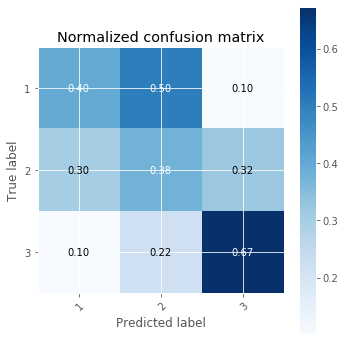

---------- X2 -----------


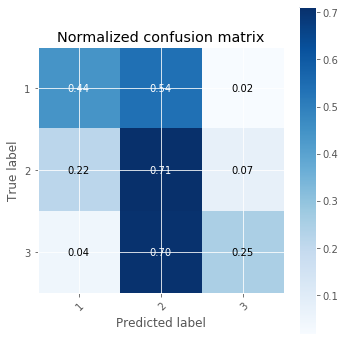

---------- X3 -----------


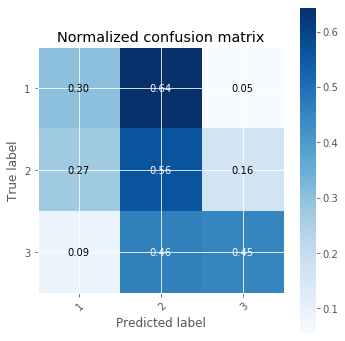

In [635]:
# Confusion matrix
print('---------- X1 -----------')
confusion_ma(y_test,y_pred1)
print('---------- X2 -----------')
confusion_ma(y_test,y_pred2)
print('---------- X3 -----------')
confusion_ma(y_test,y_pred3)

By inspecting the confusion matrices we see that the model trained on X2 predicts the least amount amount of CLASE = 3 which is related to the low recall and thereby also f1 score for the CLASE. This model is therefor not choosen.

Of the two remaning models the KNN trained on X1 performes best. It by far predicts the highest amount of CLASE = 3 truly while only predicting 10% as CLASE = 1. The model also manages to predict CLASE = 1 better which can be seen on the f1 score and the confusion matrices. It is however out performed when looking at CLASE = 2, but, as described earlier, it is better to do worse in this class than the others. The best performing KNN is thus trained on the data set X1 where all relevant features are given with 1100 neighbors and uniform weights.

### Random Forest <a id = "rand"><a>
The random forrest classification is the last model which will be used for predicting. For the random forrest the following things are specified.
- `class_weight = 'balanced'` - Adjusts class weights proportional to class frequencies.
- `random_state = 42` - To ensure same results every time the model is trained.
- `n_estimators` - For parameter for tuning. Is the number for trees in the forest
- `max_depth` - For parameter tuning. Is the maximum depth of the tree.
    
A random forrest is fitted for `X1_train`.

In [636]:
from sklearn.ensemble import RandomForestClassifier

#Estimator
rfc = RandomForestClassifier(class_weight = 'balanced', random_state = 42)

#Parameters for the tuning
rfc_pars = {'n_estimators' : [9,11,13], 'max_depth' : [2,3,4]}

#GridSearchCV
rfc_clf1 = GridSearchCV(rfc, rfc_pars, cv=kf, scoring=scor)
rfc_clf1.fit(X1_train,np.ravel(np.ravel(y_train)))

#Results
print('Best parameters:',rfc_clf1.best_params_)
print('Best score:',rfc_clf1.best_score_)

Best parameters: {'max_depth': 3, 'n_estimators': 11}
Best score: 0.521116391138478


A random forrest for `X2_train` is now fitted.


In [637]:
# #Parameters for the tuning
rfc_pars = {'n_estimators' : [8,9,10], 'max_depth' : [1,2,3]}

#GridSearchCV
rfc_clf2 = GridSearchCV(rfc, rfc_pars, cv=kf, scoring=scor)
rfc_clf2.fit(X2_train,np.ravel(np.ravel(y_train)))

#Results
print('Best parameters:',rfc_clf2.best_params_)
print('Best score:',rfc_clf2.best_score_)

Best parameters: {'max_depth': 2, 'n_estimators': 9}
Best score: 0.5231912187939227


Finally a random forrest for X3_train is fitted.

In [638]:
# #Parameters for the tuning
rfc_pars = {'n_estimators' : [13,14,15], 'max_depth' : [2,3,4]}


#GridSearchCV
rfc_clf3 = GridSearchCV(rfc, rfc_pars, cv=kf, scoring=scor)
rfc_clf3.fit(X3_train,np.ravel(np.ravel(y_train)))

#Results
print('Best parameters:',rfc_clf3.best_params_)
print('Best score:',rfc_clf3.best_score_)

Best parameters: {'max_depth': 3, 'n_estimators': 14}
Best score: 0.470584298239743


We see that the models chooses different depths and amount of trees. With the fitted models we will look at the scores.

In [639]:
y_pred1 =  rfc_clf1.predict(X1_test)
print('---------- X1 -----------')
rfc_eval1 = evaluate_scores(y_test,y_pred1)
print(classification_report(y_test, y_pred1))

y_pred2 =  rfc_clf2.predict(X2_test)
print('\n---------- X2 -----------')
rfc_eval2 = evaluate_scores(y_test,y_pred2)
print(classification_report(y_test, y_pred2))

y_pred3 =  rfc_clf3.predict(X3_test)
print('\n---------- X3 -----------')
rfc_eval3 = evaluate_scores(y_test,y_pred3)
print(classification_report(y_test, y_pred3))

---------- X1 -----------
accuracy: 0.5165585524069648
precision: 0.527086383601757
recall: 0.28346456692913385
f1 score: 0.3686635944700461
              precision    recall  f1-score   support

           1       0.46      0.64      0.54       718
           2       0.53      0.28      0.37      1270
           3       0.55      0.74      0.63       941

    accuracy                           0.52      2929
   macro avg       0.51      0.55      0.51      2929
weighted avg       0.52      0.52      0.49      2929


---------- X2 -----------
accuracy: 0.5046090815978149
precision: 0.5529715762273901
recall: 0.16850393700787403
f1 score: 0.2582981291490646
              precision    recall  f1-score   support

           1       0.48      0.65      0.55       718
           2       0.55      0.17      0.26      1270
           3       0.51      0.84      0.64       941

    accuracy                           0.50      2929
   macro avg       0.51      0.56      0.48      2929
weighted 

The results reveal that all models do worse than the DummyClassifier on the overall f1 score, and also much worse compared to the logistic regression and KNN. However the overall accuracy and precision is much better than the DummyClassifier, and similar to the two other prediction methods. All three of these models are therefor better than the DummyClassifier. By inspecting the individual scores for each category all three random forrest models have similar f1 score for CLASE = 3 and that the recall equally is high. It is however noticable that the recall for CLASE = 2 is small for all three models. To decide which model performs best the confusion matrices are also inspected.

---------- X1 -----------


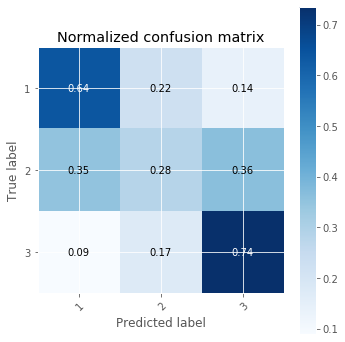

---------- X2 -----------


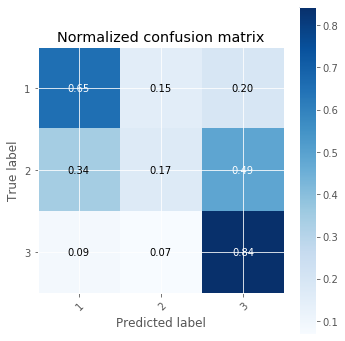

---------- X3 -----------


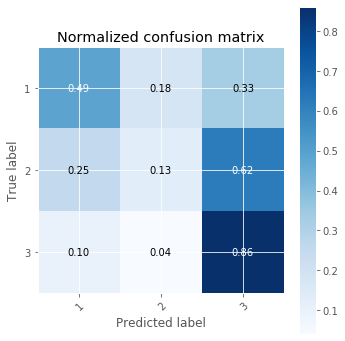

In [640]:
# Confusion matrix
print('---------- X1 -----------')
confusion_ma(y_test,y_pred1)
print('---------- X2 -----------')
confusion_ma(y_test,y_pred2)
print('---------- X3 -----------')
confusion_ma(y_test,y_pred3)

By inspecting the three confusion matrices it can be seen that the model trained on X3 manages to predict the largest share of CLASE = 3 correctly (86%). The model does however also predict 62% of CLASE = 2 and 33% of CLASE = 1 to be a CLASE = 3, this model is therefor not choosen. 

Of the two remaning models the random forrest trained on X1 is choosen. This model is choosen as it only predicts 14% of CLASE = 1 to be CLASE = 3 where the model trained on X2 predict 20%. Furthermore the recall on CLASE = 2 is very low for the model trained on X2 which means that it only predicts 17% of CLASE = 2 correctly. Therefor the best random forrest is the model trained on X1 which is the data set with all relevant features. This model uses 11 trees and a maximum depth of 3.

## Classifier selection <a id = "classel"><a>

With the best model for each of the classifiers selected the best model of these three is decided upon. To do this the scores and confusion matr

In [641]:
# Logistic regression
y_pred_logreg =  logreg_clf3.predict(X3_test)
print('\n---------- Logistic regression, trained and tested on X3 -----------\n')
logreg_eval3 = evaluate_scores(y_test,y_pred_logreg)
print(classification_report(y_test, y_pred_logreg))
#confusion_ma(y_test,y_pred_logreg)

# KNN
y_pred_knn =  KNclas_clf1.predict(X1_test)
print('\n---------- KNN, trained and tested on X1 -----------\n')
knn_eval1 = evaluate_scores(y_test,y_pred_knn)
print(classification_report(y_test, y_pred_knn))
#confusion_ma(y_test,y_pred_knn)


# Random forrest
y_pred_rfc =  rfc_clf1.predict(X1_test)
print('\n---------- Random forrest, trained and tested on X1 -----------\n')
rfc_eval1 = evaluate_scores(y_test,y_pred_rfc)
print(classification_report(y_test, y_pred_rfc))
#confusion_ma(y_test,y_pred_rfc)


---------- Logistic regression, trained and tested on X3 -----------

accuracy: 0.5326049846363947
precision: 0.5340501792114696
recall: 0.35196850393700785
f1 score: 0.4242999525391552
              precision    recall  f1-score   support

           1       0.49      0.52      0.50       718
           2       0.53      0.35      0.42      1270
           3       0.56      0.79      0.65       941

    accuracy                           0.53      2929
   macro avg       0.53      0.55      0.53      2929
weighted avg       0.53      0.53      0.52      2929


---------- KNN, trained and tested on X1 -----------

accuracy: 0.4769545920109252
precision: 0.4564593301435407
recall: 0.37559055118110235
f1 score: 0.4120950323974082
              precision    recall  f1-score   support

           1       0.37      0.40      0.38       718
           2       0.46      0.38      0.41      1270
           3       0.57      0.67      0.62       941

    accuracy                           0.48

By comparing the scores for the three different classifiers we see that the logistic regression has the highest overall accuracy, precision and f1 score. The overall recall score is the second highest and is only 0.024 worse. For the individual scores for the different categories the f1 score for CLASE = 3 in the logistic regression is also best. 

On the background of these observations the logistic regression which is trained on the dataset where all relevant features have been transformed using PCA (X3) is selected as the best predictor. 


---------- Logistic regression, trained and tested on X3 -----------



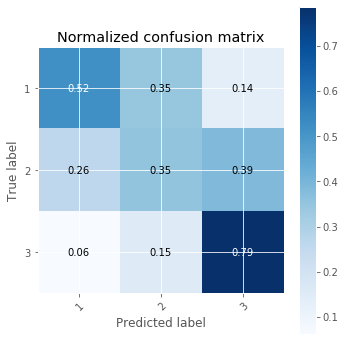


---------- KNN, trained and tested on X1 -----------



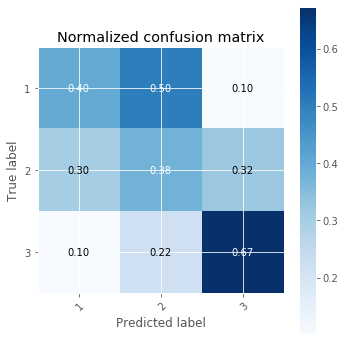


---------- Random forrest, trained and tested on X1 -----------



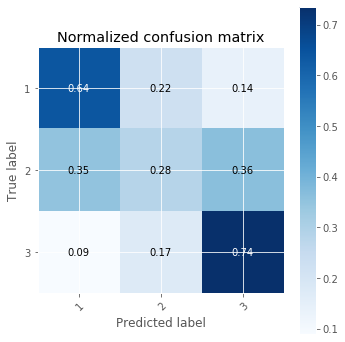

In [642]:
print('\n---------- Logistic regression, trained and tested on X3 -----------\n')
confusion_ma(y_test,y_pred_logreg)
print('\n---------- KNN, trained and tested on X1 -----------\n')
confusion_ma(y_test,y_pred_knn)
print('\n---------- Random forrest, trained and tested on X1 -----------\n')
confusion_ma(y_test,y_pred_rfc)

## Prediction results

With a selected model the predicted results will now be plotted. Therefor a new dataframe containing the observed and predicted labels as well as the coordinates is defined. For the coordinates the earlier defined dataframe `test_coor` is used.

In [218]:
print(y_test.shape[0])
print(len(y_pred_logreg))

2929
2929


In [219]:
# Merge results and observed labels into a dataframe.
results = y_test
results['Predicted'] = y_pred_logreg
results = results.rename(columns={'CLASE':'True'})
# Merge the latitude and longitude
results['Longitude'] = test_coor['Longitude']
results['Latitude'] = test_coor['Latitude']
results.head()

True  Predicted  Longitude   Latitude
Hogar                                       
103550    2          1 -70.693375 -33.481193
103561    2          1 -70.693413 -33.481243
104481    2          2 -70.691208 -33.478279
104841    1          1 -70.687317 -33.481479
113281    2          2 -70.679299 -33.400009

The predicted labels are plotted together with the true labels.

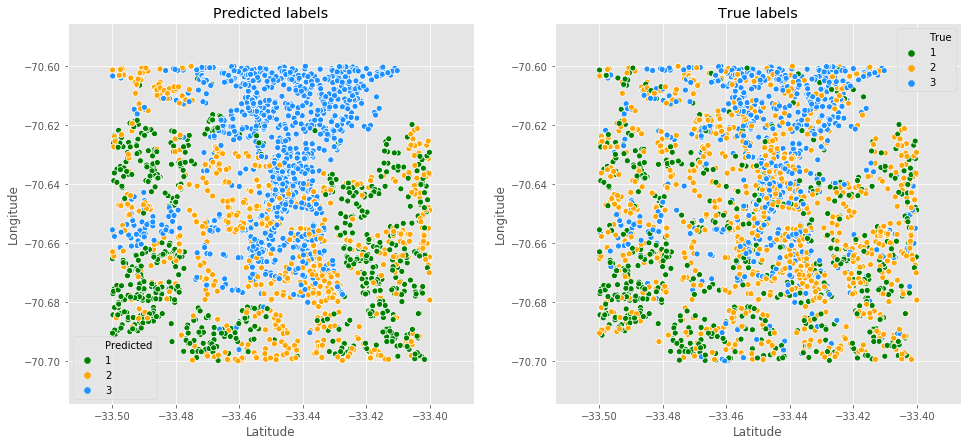

In [220]:
colors = ['green', 'orange','dodgerblue']

fig, (ax1,ax2) = plt.subplots(1,2, figsize = (16,7))

# Scatter plot predicted
sns.scatterplot(x='Latitude', y='Longitude', hue='Predicted', 
                data=results, palette = colors, legend = 'full', ax = ax1)
ax1.set_title("Predicted labels")

# Scatter plot observed
sns.scatterplot(x='Latitude', y='Longitude', hue='True', 
                data=results, palette = colors, legend = 'full', ax = ax2)
ax2.set_title("True labels")

plt.show()

From the plots we see that there are too many households which are predicted as CLASE = 3 compared to the true labels and that most of these are gathered together in a cluster. This is as expected as we during the selection of the models put a high emphasis on that this CLASE was particularly important due to this being the most wealthy CLASE.

A figure showing the true and false labeled observations is also plotted.

In [221]:
results['Correctly_predicted'] = (results['Predicted'] == results['True'])
results.head()

True  Predicted  Longitude   Latitude  Correctly_predicted
Hogar                                                            
103550    2          1 -70.693375 -33.481193                False
103561    2          1 -70.693413 -33.481243                False
104481    2          2 -70.691208 -33.478279                 True
104841    1          1 -70.687317 -33.481479                 True
113281    2          2 -70.679299 -33.400009                 True

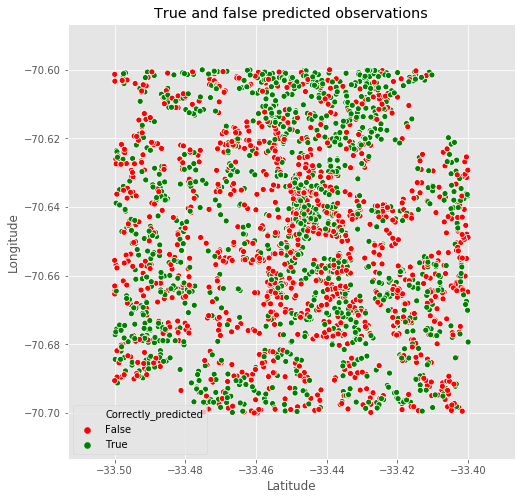

In [222]:
colors = ['red','green']

plt.figure(figsize = (8,8))
sns.scatterplot(x='Latitude', y='Longitude', hue='Correctly_predicted', 
                data=results, palette = colors, legend = 'full')
plt.title("True and false predicted observations")
plt.show()

A area in the top of the figure is mostly dominated by true predicted observations. This is also the area as seen in the plot before where there was a large amount of true CLASE = 3.

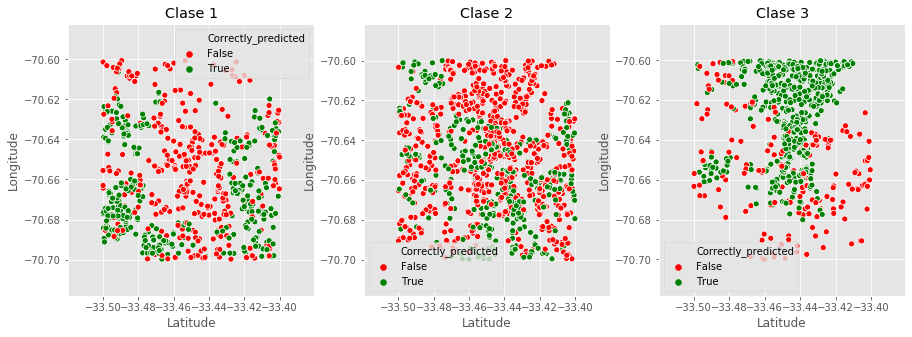

In [236]:
fig,ax = plt.subplots(figsize=(15,5))

colors = ['red','green']

#ax = plt.subplot(1,2,2)
#sns.scatterplot(x="total_bill", y="tip", data=tips, ax= ax);

for i in range(1,4):
    ax = plt.subplot(1,3,i)
    sns.scatterplot(x='Latitude', y='Longitude', hue='Correctly_predicted', 
                data=results[results['True']==i], palette = colors, legend = 'full',ax=ax)
    ax.set_title("Clase %i" %i)

The model is predicting CLASE 3 particularly good and does overall well. Clase 2 is not predicted very well. Maybe other household features than education would be better for prediciting.

However, to optimise the value for the real estate agency, the prediction should be presented by probability:

In [192]:
print(np.max(all_probs,0)) #Max probabilty
print(np.argmax(all_probs,0)) #Index for max probabilty

[0.64132042 0.48990662 0.84363203]
[ 474 2226 1279]


As an example the real estate agent sets real estate 11 for sale, the he gets the following decission support on who to target his advertisement:

In [201]:
print('This real estate has %.0f %% match with house hold type 1' %(logreg_clf3.predict_proba(X3_test[10:13])[0][0]*100))
print('This real estate has %.0f %% match with house hold type 2' %(logreg_clf3.predict_proba(X3_test[10:13])[0][1]*100))
print('This real estate has %.0f %% match with house hold type 3' %(logreg_clf3.predict_proba(X3_test[10:13])[0][2]*100))

This real estate has 53 % match with house hold type 1
This real estate has 39 % match with house hold type 2
This real estate has 8 % match with house hold type 3


In this case the real estate agent might benefit from mainly target advertising to type 1 but also target type 2.

Another example:

In [203]:
print('This real estate has %.0f %% match with house hold type 1' %(logreg_clf3.predict_proba(X3_test[1279:1280])[0][0]*100))
print('This real estate has %.0f %% match with house hold type 2' %(logreg_clf3.predict_proba(X3_test[1279:1280])[0][1]*100))
print('This real estate has %.0f %% match with house hold type 3' %(logreg_clf3.predict_proba(X3_test[1279:1280])[0][2]*100))

This real estate has 0 % match with house hold type 1
This real estate has 16 % match with house hold type 2
This real estate has 84 % match with house hold type 3


In this case the real estate agent can focus all the advertising efforts on type 3. 

# Conclusion

This report provides valuable insights for real estate agencies in Santiago de Chile. The models and insights derived in this report enable focused targeting of households based on eduction when advertising real estates. Predictions of the household type buying real estate in the city shows good results for predicting wealthy house holds with long education. These households are the ones that real estate agencies can earn most money on hence the most important. For the middle educated household the model is poor performing, potentially other household attributes than education would be better to classify here. For use in the business, the model can predict the probability of a real estate matching each of 3 house hold types. This allows the agencies to target relevant groups only. Additionally the market has been segmented with a fair match of household types. Together with a throughout exploratory analysis this report reveals key insights to understand the drivers for households to select real estate.

# Contributions

Both members of the group have contributed equally and both members vouch for every section of the report. The construction of each section have been carried out as group work, both members have thereby contributed equally.